[참고캐글커널](https://www.kaggle.com/davids1992/speech-representation-and-data-exploration)

In [17]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa
from sklearn.decomposition import PCA

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

압축 해제([참고](https://qlsenddl-lab.tistory.com/29))

In [3]:
!tar zxvf ./speech_commands_v0.01.tar.gz

x ./
x ./eight/
x ./eight/1b88bf70_nohash_0.wav
x ./eight/798f702a_nohash_2.wav
x ./eight/b12bef84_nohash_1.wav
x ./eight/05b2db80_nohash_1.wav
x ./eight/750e3e75_nohash_0.wav
x ./eight/3852fca2_nohash_0.wav
x ./eight/5ac04a92_nohash_0.wav
x ./eight/778a4a01_nohash_0.wav
x ./eight/61e50f62_nohash_0.wav
x ./eight/17c94b23_nohash_0.wav
x ./eight/037c445a_nohash_1.wav
x ./eight/11321027_nohash_0.wav
x ./eight/b97c9f77_nohash_1.wav
x ./eight/10467b06_nohash_1.wav
x ./eight/baf01c1f_nohash_0.wav
x ./eight/48bdc11c_nohash_0.wav
x ./eight/cb2929ce_nohash_4.wav
x ./eight/a6285644_nohash_2.wav
x ./eight/01b4757a_nohash_0.wav
x ./eight/ea1f888c_nohash_0.wav
x ./eight/a6285644_nohash_1.wav
x ./eight/88120683_nohash_0.wav
x ./eight/f44f440f_nohash_2.wav
x ./eight/1ecfb537_nohash_2.wav
x ./eight/7ff4fc72_nohash_0.wav
x ./eight/57b68383_nohash_2.wav
x ./eight/f0edc767_nohash_0.wav
x ./eight/50f55535_nohash_0.wav
x ./eight/cd7f8c1b_nohash_2.wav
x ./eight/98582fee_nohash_1.wav
x ./eight/b8872c20_nohas

x ./eight/eb3f7d82_nohash_4.wav
x ./eight/ceaadb24_nohash_0.wav
x ./eight/c9b653a0_nohash_0.wav
x ./eight/f4cae173_nohash_1.wav
x ./eight/d952a17e_nohash_0.wav
x ./eight/2d82a556_nohash_2.wav
x ./eight/837f7378_nohash_0.wav
x ./eight/6a700f9d_nohash_1.wav
x ./eight/c9b653a0_nohash_4.wav
x ./eight/2f666bb2_nohash_0.wav
x ./eight/964e8cfd_nohash_0.wav
x ./eight/0b09edd3_nohash_1.wav
x ./eight/d90b4138_nohash_1.wav
x ./eight/c1d39ce8_nohash_6.wav
x ./eight/64220627_nohash_3.wav
x ./eight/70a00e98_nohash_2.wav
x ./eight/7c75a504_nohash_1.wav
x ./eight/29fb33da_nohash_0.wav
x ./eight/3bfd30e6_nohash_3.wav
x ./eight/b8c48ffb_nohash_0.wav
x ./eight/5e3dde6b_nohash_0.wav
x ./eight/df1d5024_nohash_0.wav
x ./eight/e20be42a_nohash_0.wav
x ./eight/fb7c9b3b_nohash_0.wav
x ./eight/50ed8a7b_nohash_1.wav
x ./eight/888a0c49_nohash_4.wav
x ./eight/91cdef62_nohash_1.wav
x ./eight/88f8a99c_nohash_0.wav
x ./eight/a4ca3afe_nohash_3.wav
x ./eight/c22d3f18_nohash_0.wav
x ./eight/2fa39636_nohash_0.wav
x ./eigh

x ./eight/e07dd7d4_nohash_0.wav
x ./eight/bab36420_nohash_1.wav
x ./eight/3f2b358d_nohash_1.wav
x ./eight/e7ebf59c_nohash_0.wav
x ./eight/7c1d8533_nohash_0.wav
x ./eight/d90b4138_nohash_2.wav
x ./eight/27b9a84f_nohash_1.wav
x ./eight/439c84f4_nohash_2.wav
x ./eight/15d83b54_nohash_0.wav
x ./eight/a4e8a997_nohash_1.wav
x ./eight/efa16ffd_nohash_0.wav
x ./eight/cd68e997_nohash_0.wav
x ./eight/7fd25f7c_nohash_4.wav
x ./eight/5b26c81b_nohash_0.wav
x ./eight/2039b9c1_nohash_0.wav
x ./eight/a13e0a74_nohash_1.wav
x ./eight/aa48c94a_nohash_1.wav
x ./eight/551e42e8_nohash_0.wav
x ./eight/bfaf2000_nohash_2.wav
x ./eight/a1c63f25_nohash_0.wav
x ./eight/d85270c1_nohash_0.wav
x ./eight/37bd115d_nohash_0.wav
x ./eight/e7ea8b76_nohash_0.wav
x ./eight/eee5e541_nohash_0.wav
x ./eight/471a0925_nohash_3.wav
x ./eight/884ae8e1_nohash_1.wav
x ./eight/815f0f03_nohash_0.wav
x ./eight/fd395b74_nohash_1.wav
x ./eight/0e17f595_nohash_0.wav
x ./eight/36050ef3_nohash_3.wav
x ./eight/df038de4_nohash_0.wav
x ./eigh

x ./eight/db9cd41d_nohash_0.wav
x ./eight/96ab6565_nohash_0.wav
x ./eight/3f339c33_nohash_0.wav
x ./eight/638548d5_nohash_0.wav
x ./eight/6c0f6493_nohash_3.wav
x ./eight/ac7840d8_nohash_0.wav
x ./eight/042ea76c_nohash_0.wav
x ./eight/96ab6565_nohash_2.wav
x ./eight/c0445658_nohash_1.wav
x ./eight/7c1d8533_nohash_4.wav
x ./eight/7b301939_nohash_0.wav
x ./eight/14df1e28_nohash_0.wav
x ./eight/bdee441c_nohash_0.wav
x ./eight/571c044e_nohash_0.wav
x ./eight/57b68383_nohash_1.wav
x ./eight/ab3f0c1b_nohash_1.wav
x ./eight/c120e80e_nohash_7.wav
x ./eight/7ea032f3_nohash_0.wav
x ./eight/28ce0c58_nohash_2.wav
x ./eight/a7dd45cf_nohash_0.wav
x ./eight/2250f5f2_nohash_0.wav
x ./eight/1b4c9b89_nohash_1.wav
x ./eight/238c112c_nohash_0.wav
x ./eight/37dca74f_nohash_2.wav
x ./eight/2c6d3924_nohash_0.wav
x ./eight/39c13eed_nohash_0.wav
x ./eight/f0ac2522_nohash_0.wav
x ./eight/f638a812_nohash_1.wav
x ./eight/439c84f4_nohash_3.wav
x ./eight/6c6aa323_nohash_2.wav
x ./eight/0132a06d_nohash_4.wav
x ./eigh

x ./eight/d430b3cc_nohash_1.wav
x ./eight/0b09edd3_nohash_2.wav
x ./eight/aa48c94a_nohash_0.wav
x ./eight/712e4d58_nohash_2.wav
x ./eight/28460a60_nohash_1.wav
x ./eight/7211390b_nohash_0.wav
x ./eight/c099668c_nohash_1.wav
x ./eight/cd85758f_nohash_4.wav
x ./eight/ab76ac76_nohash_0.wav
x ./eight/794cdfc5_nohash_0.wav
x ./eight/efbc3952_nohash_2.wav
x ./eight/8281a2a8_nohash_0.wav
x ./eight/be91a00a_nohash_0.wav
x ./eight/7c9b43f0_nohash_0.wav
x ./eight/f5496439_nohash_0.wav
x ./eight/53eb0a88_nohash_1.wav
x ./eight/b6ebe225_nohash_2.wav
x ./eight/ab00c4b2_nohash_0.wav
x ./eight/15574821_nohash_0.wav
x ./eight/7846fd85_nohash_0.wav
x ./eight/042186b8_nohash_0.wav
x ./eight/5b09db89_nohash_1.wav
x ./eight/5a9f7324_nohash_0.wav
x ./eight/2e30f9a5_nohash_2.wav
x ./eight/90b0b91a_nohash_0.wav
x ./eight/5c8af87a_nohash_3.wav
x ./eight/97f4c236_nohash_1.wav
x ./eight/1aed7c6d_nohash_1.wav
x ./eight/a7545b9f_nohash_0.wav
x ./eight/b9515bf3_nohash_4.wav
x ./eight/763188c4_nohash_4.wav
x ./eigh

x ./eight/dd6c6806_nohash_0.wav
x ./eight/b959cd0c_nohash_1.wav
x ./eight/5744b6a7_nohash_2.wav
x ./eight/9080f6d3_nohash_0.wav
x ./eight/49af4432_nohash_4.wav
x ./eight/5fadb538_nohash_0.wav
x ./eight/3d53244b_nohash_2.wav
x ./eight/e6db3894_nohash_0.wav
x ./eight/baeac2ba_nohash_1.wav
x ./eight/28e47b1a_nohash_2.wav
x ./eight/b21f0fa4_nohash_0.wav
x ./eight/b43de700_nohash_0.wav
x ./eight/01bcfc0c_nohash_0.wav
x ./eight/459345ea_nohash_0.wav
x ./eight/7061c7d1_nohash_1.wav
x ./eight/ab3f0c1b_nohash_0.wav
x ./eight/179a61b7_nohash_3.wav
x ./eight/14872d06_nohash_0.wav
x ./eight/83f9c4ab_nohash_0.wav
x ./eight/106a6183_nohash_1.wav
x ./eight/742d6431_nohash_5.wav
x ./eight/a6285644_nohash_3.wav
x ./eight/953fe1ad_nohash_0.wav
x ./eight/8a325749_nohash_0.wav
x ./eight/acfd3bc3_nohash_0.wav
x ./eight/92037d73_nohash_0.wav
x ./eight/b5d1e505_nohash_2.wav
x ./eight/0a9f9af7_nohash_0.wav
x ./eight/0397ecda_nohash_0.wav
x ./eight/46a153d8_nohash_2.wav
x ./eight/c2e08f08_nohash_0.wav
x ./eigh

x ./eight/3df9a3d4_nohash_0.wav
x ./eight/21cbe292_nohash_0.wav
x ./eight/b52bd596_nohash_0.wav
x ./eight/31267b59_nohash_1.wav
x ./eight/aff582a1_nohash_0.wav
x ./eight/21832144_nohash_4.wav
x ./eight/ad6a46f1_nohash_1.wav
x ./eight/fe5c4a7a_nohash_0.wav
x ./eight/126403d4_nohash_0.wav
x ./eight/c120e80e_nohash_1.wav
x ./eight/179a61b7_nohash_2.wav
x ./eight/c1d39ce8_nohash_4.wav
x ./eight/6a700f9d_nohash_0.wav
x ./eight/01bb6a2a_nohash_4.wav
x ./eight/ab76ac76_nohash_1.wav
x ./eight/4d9e07cf_nohash_0.wav
x ./eight/726382d6_nohash_1.wav
x ./eight/be7a5b2d_nohash_1.wav
x ./eight/49af4432_nohash_2.wav
x ./eight/10c6d873_nohash_0.wav
x ./eight/6a861f21_nohash_0.wav
x ./eight/c37a72d3_nohash_0.wav
x ./eight/61a0d340_nohash_2.wav
x ./eight/98582fee_nohash_0.wav
x ./eight/38c388bc_nohash_0.wav
x ./eight/953fe1ad_nohash_1.wav
x ./eight/529eda42_nohash_0.wav
x ./eight/62581901_nohash_0.wav
x ./eight/b1426003_nohash_0.wav
x ./eight/c22d3f18_nohash_2.wav
x ./eight/c08585c1_nohash_2.wav
x ./eigh

x ./eight/25132942_nohash_0.wav
x ./eight/d5ca80c6_nohash_0.wav
x ./eight/cc6ee39b_nohash_2.wav
x ./eight/f8ad3941_nohash_0.wav
x ./eight/25040e85_nohash_0.wav
x ./eight/da76aa58_nohash_2.wav
x ./eight/01d22d03_nohash_0.wav
x ./README.md
x ./sheila/
x ./sheila/1b88bf70_nohash_0.wav
x ./sheila/a3255f5c_nohash_2.wav
x ./sheila/05b2db80_nohash_1.wav
x ./sheila/0b40aa8e_nohash_1.wav
x ./sheila/1a6eca98_nohash_0.wav
x ./sheila/750e3e75_nohash_0.wav
x ./sheila/3852fca2_nohash_0.wav
x ./sheila/5ac04a92_nohash_0.wav
x ./sheila/778a4a01_nohash_0.wav
x ./sheila/b00dff7e_nohash_0.wav
x ./sheila/61e50f62_nohash_0.wav
x ./sheila/17c94b23_nohash_0.wav
x ./sheila/037c445a_nohash_1.wav
x ./sheila/11321027_nohash_0.wav
x ./sheila/10467b06_nohash_1.wav
x ./sheila/1942abd7_nohash_0.wav
x ./sheila/baf01c1f_nohash_0.wav
x ./sheila/48bdc11c_nohash_0.wav
x ./sheila/5b26c81b_nohash_3.wav
x ./sheila/01b4757a_nohash_0.wav
x ./sheila/f9ebdba0_nohash_0.wav
x ./sheila/a3255f5c_nohash_3.wav
x ./sheila/6a27a9bf_noha

x ./sheila/e0322f2c_nohash_1.wav
x ./sheila/6e8b9b7b_nohash_0.wav
x ./sheila/b6ebe225_nohash_1.wav
x ./sheila/1cc80e39_nohash_0.wav
x ./sheila/c44d2a58_nohash_1.wav
x ./sheila/b7a6f709_nohash_0.wav
x ./sheila/b19f7f5f_nohash_0.wav
x ./sheila/53578f4e_nohash_2.wav
x ./sheila/857366dd_nohash_0.wav
x ./sheila/25c14394_nohash_0.wav
x ./sheila/e53139ad_nohash_0.wav
x ./sheila/798f702a_nohash_0.wav
x ./sheila/bbaa7946_nohash_1.wav
x ./sheila/4407ba92_nohash_3.wav
x ./sheila/74551073_nohash_0.wav
x ./sheila/6982fc2a_nohash_0.wav
x ./sheila/dc2222d7_nohash_0.wav
x ./sheila/f550b7dc_nohash_0.wav
x ./sheila/adec6a94_nohash_0.wav
x ./sheila/b83c1acf_nohash_0.wav
x ./sheila/a9f38bae_nohash_0.wav
x ./sheila/e72aa705_nohash_1.wav
x ./sheila/97f4c236_nohash_0.wav
x ./sheila/21307344_nohash_1.wav
x ./sheila/2197f41c_nohash_1.wav
x ./sheila/82305c3a_nohash_2.wav
x ./sheila/d33df435_nohash_1.wav
x ./sheila/560c5be4_nohash_0.wav
x ./sheila/56cd307a_nohash_1.wav
x ./sheila/a16b3102_nohash_0.wav
x ./sheila

x ./sheila/28ed6bc9_nohash_0.wav
x ./sheila/7de97453_nohash_1.wav
x ./sheila/712e4d58_nohash_0.wav
x ./sheila/75b631ff_nohash_0.wav
x ./sheila/857366dd_nohash_1.wav
x ./sheila/6ef76186_nohash_0.wav
x ./sheila/90804775_nohash_2.wav
x ./sheila/e2286c18_nohash_1.wav
x ./sheila/96a48d28_nohash_0.wav
x ./sheila/0fa1e7a9_nohash_0.wav
x ./sheila/41285056_nohash_0.wav
x ./sheila/becd5a53_nohash_0.wav
x ./sheila/bcdaa7a9_nohash_0.wav
x ./sheila/4c13fe25_nohash_0.wav
x ./sheila/9beccfc8_nohash_2.wav
x ./sheila/caf9fceb_nohash_2.wav
x ./sheila/b6ebe225_nohash_0.wav
x ./sheila/380abbad_nohash_0.wav
x ./sheila/3bc21161_nohash_0.wav
x ./sheila/da76aa58_nohash_0.wav
x ./sheila/cdbd6969_nohash_0.wav
x ./sheila/2cec1d47_nohash_0.wav
x ./sheila/161fcca8_nohash_0.wav
x ./sheila/f104f742_nohash_0.wav
x ./sheila/fffcabd1_nohash_1.wav
x ./sheila/ec201020_nohash_0.wav
x ./sheila/b1df80c0_nohash_0.wav
x ./sheila/9785931e_nohash_0.wav
x ./sheila/34805883_nohash_0.wav
x ./sheila/72be9202_nohash_2.wav
x ./sheila

x ./sheila/39025b21_nohash_0.wav
x ./sheila/e63b69c5_nohash_0.wav
x ./sheila/28497c5b_nohash_0.wav
x ./sheila/ffbb695d_nohash_1.wav
x ./sheila/f63a6479_nohash_0.wav
x ./sheila/77655bdf_nohash_0.wav
x ./sheila/ece1a95a_nohash_2.wav
x ./sheila/9b6c08ba_nohash_1.wav
x ./sheila/d9d6559e_nohash_0.wav
x ./sheila/53fd1780_nohash_1.wav
x ./sheila/10467b06_nohash_0.wav
x ./sheila/173e6bbf_nohash_0.wav
x ./sheila/f42e234b_nohash_0.wav
x ./sheila/035de8fe_nohash_0.wav
x ./sheila/6f1ffef6_nohash_0.wav
x ./sheila/c8771f88_nohash_0.wav
x ./sheila/c137814b_nohash_0.wav
x ./sheila/ccf418a5_nohash_3.wav
x ./sheila/b7a0754f_nohash_0.wav
x ./sheila/a2473d62_nohash_0.wav
x ./sheila/e57abea3_nohash_1.wav
x ./sheila/ec7d1151_nohash_0.wav
x ./sheila/cc3d1613_nohash_0.wav
x ./sheila/b8897f1c_nohash_1.wav
x ./sheila/73f0c1f7_nohash_1.wav
x ./sheila/30802c5d_nohash_1.wav
x ./sheila/0137b3f4_nohash_0.wav
x ./sheila/9db2bfe9_nohash_0.wav
x ./sheila/4f2be90f_nohash_1.wav
x ./sheila/a8ee11c7_nohash_1.wav
x ./sheila

x ./sheila/1f3bece8_nohash_0.wav
x ./sheila/89f680f3_nohash_0.wav
x ./sheila/881583a6_nohash_3.wav
x ./sheila/763188c4_nohash_0.wav
x ./sheila/479e64cc_nohash_0.wav
x ./sheila/e41e41f7_nohash_0.wav
x ./sheila/67c7fecb_nohash_0.wav
x ./sheila/10c6d873_nohash_1.wav
x ./sheila/47565088_nohash_0.wav
x ./sheila/dce5041a_nohash_0.wav
x ./sheila/0f250098_nohash_0.wav
x ./sheila/6414258b_nohash_1.wav
x ./sheila/aeb99b1c_nohash_0.wav
x ./sheila/77655bdf_nohash_2.wav
x ./sheila/1ed557b9_nohash_0.wav
x ./sheila/093f65a1_nohash_0.wav
x ./sheila/587f3271_nohash_0.wav
x ./sheila/2aec99ec_nohash_0.wav
x ./sheila/9d050657_nohash_0.wav
x ./sheila/cd3331a6_nohash_1.wav
x ./sheila/8b775397_nohash_0.wav
x ./sheila/b575b5fb_nohash_1.wav
x ./sheila/2bdbe5f7_nohash_0.wav
x ./sheila/6940f7f3_nohash_0.wav
x ./sheila/179a61b7_nohash_0.wav
x ./sheila/32efce64_nohash_0.wav
x ./sheila/e7334395_nohash_2.wav
x ./sheila/924c1a04_nohash_1.wav
x ./sheila/258f4559_nohash_1.wav
x ./sheila/cd7f8c1b_nohash_0.wav
x ./sheila

x ./sheila/402e2977_nohash_2.wav
x ./sheila/aac5b7c1_nohash_0.wav
x ./sheila/de6eb27c_nohash_1.wav
x ./sheila/6889b21f_nohash_1.wav
x ./sheila/4a1e736b_nohash_0.wav
x ./sheila/37e8db82_nohash_0.wav
x ./sheila/070b49af_nohash_0.wav
x ./sheila/f2b8fc18_nohash_2.wav
x ./sheila/ac899eb7_nohash_1.wav
x ./sheila/5e033479_nohash_0.wav
x ./sheila/9beccfc8_nohash_3.wav
x ./sheila/840eab5a_nohash_0.wav
x ./sheila/cd8b1781_nohash_0.wav
x ./sheila/0616de09_nohash_0.wav
x ./sheila/28497c5b_nohash_1.wav
x ./sheila/d197e3ae_nohash_0.wav
x ./sheila/cdfbbe75_nohash_0.wav
x ./sheila/fbdc07bb_nohash_0.wav
x ./sheila/782c1305_nohash_0.wav
x ./sheila/ac4b3fc3_nohash_1.wav
x ./sheila/20d3f11f_nohash_0.wav
x ./sheila/5de3f6cc_nohash_1.wav
x ./sheila/31583d30_nohash_0.wav
x ./sheila/a108341b_nohash_1.wav
x ./sheila/f192e6b4_nohash_0.wav
x ./sheila/fb7cfe0e_nohash_0.wav
x ./sheila/ba770f9b_nohash_0.wav
x ./sheila/75915c90_nohash_1.wav
x ./sheila/cc71bada_nohash_0.wav
x ./sheila/5705a0f9_nohash_0.wav
x ./sheila

x ./nine/fd395b74_nohash_0.wav
x ./nine/863880b7_nohash_0.wav
x ./nine/b9db6e42_nohash_1.wav
x ./nine/bab36420_nohash_0.wav
x ./nine/92a9c5e6_nohash_1.wav
x ./nine/61d3e51e_nohash_0.wav
x ./nine/789e4ee7_nohash_0.wav
x ./nine/418e7158_nohash_0.wav
x ./nine/e1469561_nohash_1.wav
x ./nine/b55a09be_nohash_1.wav
x ./nine/09ddc105_nohash_0.wav
x ./nine/38d78313_nohash_1.wav
x ./nine/da584bc0_nohash_4.wav
x ./nine/953fe1ad_nohash_3.wav
x ./nine/ec201020_nohash_3.wav
x ./nine/da584bc0_nohash_0.wav
x ./nine/8e05039f_nohash_0.wav
x ./nine/c256377f_nohash_0.wav
x ./nine/cc6ee39b_nohash_0.wav
x ./nine/2cec1d47_nohash_1.wav
x ./nine/e48a80ed_nohash_0.wav
x ./nine/5fc3ed24_nohash_3.wav
x ./nine/7d5f87c8_nohash_0.wav
x ./nine/3efa7ec4_nohash_0.wav
x ./nine/7e556a2c_nohash_0.wav
x ./nine/6c429c7b_nohash_2.wav
x ./nine/7c75a504_nohash_0.wav
x ./nine/bbd0bbd0_nohash_1.wav
x ./nine/716757ce_nohash_1.wav
x ./nine/7ea032f3_nohash_3.wav
x ./nine/49f30eed_nohash_0.wav
x ./nine/023a61ad_nohash_0.wav
x ./nine

x ./nine/bb31b82b_nohash_1.wav
x ./nine/2bdbe5f7_nohash_2.wav
x ./nine/71bf8f48_nohash_0.wav
x ./nine/bdb90d38_nohash_0.wav
x ./nine/095847e4_nohash_2.wav
x ./nine/b5552931_nohash_4.wav
x ./nine/1816b768_nohash_1.wav
x ./nine/47d01978_nohash_1.wav
x ./nine/37d38e44_nohash_0.wav
x ./nine/97e0c576_nohash_0.wav
x ./nine/0132a06d_nohash_2.wav
x ./nine/1bc45db9_nohash_0.wav
x ./nine/bf5d409d_nohash_0.wav
x ./nine/4e8c5516_nohash_0.wav
x ./nine/6cb6eee7_nohash_0.wav
x ./nine/06076b6b_nohash_0.wav
x ./nine/f5733968_nohash_2.wav
x ./nine/258f4559_nohash_2.wav
x ./nine/6205088b_nohash_0.wav
x ./nine/4cb874bb_nohash_1.wav
x ./nine/888a0c49_nohash_3.wav
x ./nine/19f9c115_nohash_1.wav
x ./nine/cd7f8c1b_nohash_1.wav
x ./nine/96a48d28_nohash_4.wav
x ./nine/f192e6b4_nohash_2.wav
x ./nine/21e8c417_nohash_0.wav
x ./nine/d3f22f0e_nohash_1.wav
x ./nine/dbb40d24_nohash_3.wav
x ./nine/b49caed3_nohash_1.wav
x ./nine/8601f33b_nohash_1.wav
x ./nine/dfb6450b_nohash_1.wav
x ./nine/d2f4f431_nohash_2.wav
x ./nine

x ./nine/0ea0e2f4_nohash_0.wav
x ./nine/f816db77_nohash_0.wav
x ./nine/9ff1b8b6_nohash_1.wav
x ./nine/8012c69d_nohash_2.wav
x ./nine/72be9202_nohash_0.wav
x ./nine/2b3f509b_nohash_1.wav
x ./nine/6c968bd9_nohash_4.wav
x ./nine/83c9e7e6_nohash_0.wav
x ./nine/4c841771_nohash_0.wav
x ./nine/c79159aa_nohash_4.wav
x ./nine/a591c2ea_nohash_1.wav
x ./nine/3b853f44_nohash_0.wav
x ./nine/c0445658_nohash_2.wav
x ./nine/28ed6bc9_nohash_0.wav
x ./nine/2ce7534c_nohash_1.wav
x ./nine/fd395b74_nohash_2.wav
x ./nine/c33682f0_nohash_1.wav
x ./nine/712e4d58_nohash_0.wav
x ./nine/857366dd_nohash_1.wav
x ./nine/6ef76186_nohash_0.wav
x ./nine/ec201020_nohash_4.wav
x ./nine/96a48d28_nohash_0.wav
x ./nine/ab5d7179_nohash_0.wav
x ./nine/b1f8326d_nohash_1.wav
x ./nine/0fa1e7a9_nohash_0.wav
x ./nine/41285056_nohash_0.wav
x ./nine/9db2bfe9_nohash_3.wav
x ./nine/becd5a53_nohash_0.wav
x ./nine/01bb6a2a_nohash_1.wav
x ./nine/bcdaa7a9_nohash_0.wav
x ./nine/1a892463_nohash_1.wav
x ./nine/4c13fe25_nohash_0.wav
x ./nine

x ./nine/4fd4d073_nohash_1.wav
x ./nine/e20be42a_nohash_1.wav
x ./nine/eb609143_nohash_1.wav
x ./nine/b4aa9fef_nohash_2.wav
x ./nine/76424fa5_nohash_0.wav
x ./nine/73af0c50_nohash_0.wav
x ./nine/28497c5b_nohash_0.wav
x ./nine/3da7f617_nohash_0.wav
x ./nine/29fb33da_nohash_3.wav
x ./nine/ffbb695d_nohash_1.wav
x ./nine/8e05039f_nohash_2.wav
x ./nine/9c06a3f3_nohash_1.wav
x ./nine/77655bdf_nohash_0.wav
x ./nine/ece1a95a_nohash_2.wav
x ./nine/adc216c5_nohash_0.wav
x ./nine/e53139ad_nohash_3.wav
x ./nine/3c6d55b3_nohash_0.wav
x ./nine/2589f361_nohash_0.wav
x ./nine/d9d6559e_nohash_0.wav
x ./nine/173e6bbf_nohash_0.wav
x ./nine/eb0676ec_nohash_2.wav
x ./nine/099d52ad_nohash_4.wav
x ./nine/f19c1390_nohash_2.wav
x ./nine/d197e3ae_nohash_4.wav
x ./nine/a2fefcb4_nohash_0.wav
x ./nine/f42e234b_nohash_0.wav
x ./nine/0f7205ef_nohash_1.wav
x ./nine/cf87b736_nohash_0.wav
x ./nine/c9b653a0_nohash_3.wav
x ./nine/035de8fe_nohash_0.wav
x ./nine/f17be97f_nohash_4.wav
x ./nine/6f1ffef6_nohash_0.wav
x ./nine

x ./nine/9f22307d_nohash_0.wav
x ./nine/e4200516_nohash_1.wav
x ./nine/7081436f_nohash_0.wav
x ./nine/834f03fe_nohash_1.wav
x ./nine/fa446c16_nohash_0.wav
x ./nine/122c5aa7_nohash_2.wav
x ./nine/1625acd8_nohash_1.wav
x ./nine/48a9f771_nohash_0.wav
x ./nine/1a673010_nohash_0.wav
x ./nine/49f30eed_nohash_2.wav
x ./nine/37dca74f_nohash_0.wav
x ./nine/29fb33da_nohash_1.wav
x ./nine/1ecfb537_nohash_0.wav
x ./nine/692a88e6_nohash_4.wav
x ./nine/e7d0eb3f_nohash_1.wav
x ./nine/2c6446f7_nohash_0.wav
x ./nine/c634a189_nohash_0.wav
x ./nine/c4533c47_nohash_0.wav
x ./nine/e5d2e09d_nohash_0.wav
x ./nine/9f869f70_nohash_1.wav
x ./nine/1b63157b_nohash_0.wav
x ./nine/611d2b50_nohash_3.wav
x ./nine/b9515bf3_nohash_3.wav
x ./nine/b11a05d2_nohash_0.wav
x ./nine/28612180_nohash_1.wav
x ./nine/617de221_nohash_4.wav
x ./nine/611d2b50_nohash_0.wav
x ./nine/13d7b8c9_nohash_2.wav
x ./nine/c1e0e8e3_nohash_2.wav
x ./nine/7ab5b8f7_nohash_0.wav
x ./nine/3ffa3457_nohash_1.wav
x ./nine/106a6183_nohash_2.wav
x ./nine

x ./nine/f4504600_nohash_2.wav
x ./nine/70a00e98_nohash_1.wav
x ./nine/3ff840aa_nohash_0.wav
x ./nine/ffd2ba2f_nohash_0.wav
x ./nine/6cc28ce5_nohash_1.wav
x ./nine/28e47b1a_nohash_1.wav
x ./nine/8f0d3c27_nohash_0.wav
x ./nine/cc2f1a85_nohash_0.wav
x ./nine/d3a18257_nohash_0.wav
x ./nine/8aa35b0c_nohash_0.wav
x ./nine/c44d2a58_nohash_0.wav
x ./nine/130d9a87_nohash_1.wav
x ./nine/7318280c_nohash_0.wav
x ./nine/82b99576_nohash_2.wav
x ./nine/8281a2a8_nohash_3.wav
x ./nine/ea356919_nohash_1.wav
x ./nine/b4aa9fef_nohash_0.wav
x ./nine/9ff2d2f4_nohash_2.wav
x ./nine/65f2531f_nohash_0.wav
x ./nine/bdee441c_nohash_4.wav
x ./nine/4290ca61_nohash_0.wav
x ./nine/833a0279_nohash_0.wav
x ./nine/46a153d8_nohash_4.wav
x ./nine/d486fb84_nohash_0.wav
x ./nine/211ccd2e_nohash_1.wav
x ./nine/6a861f21_nohash_3.wav
x ./nine/f839238a_nohash_0.wav
x ./nine/6a2fb9a5_nohash_0.wav
x ./nine/6c429c7b_nohash_3.wav
x ./nine/3bc21161_nohash_3.wav
x ./nine/f59d0771_nohash_0.wav
x ./nine/e98cb283_nohash_0.wav
x ./nine

x ./nine/bca56796_nohash_0.wav
x ./nine/d8ee4734_nohash_0.wav
x ./nine/1ffd513b_nohash_0.wav
x ./nine/80fe1dc7_nohash_0.wav
x ./nine/d0426d63_nohash_0.wav
x ./nine/1887fe04_nohash_0.wav
x ./nine/b5552931_nohash_1.wav
x ./nine/facd97c0_nohash_0.wav
x ./nine/c6a23ff5_nohash_0.wav
x ./nine/f810e799_nohash_1.wav
x ./nine/eb76bc68_nohash_1.wav
x ./nine/11a022ba_nohash_0.wav
x ./nine/adb45ef2_nohash_1.wav
x ./nine/cc6ee39b_nohash_1.wav
x ./nine/d7ca14ef_nohash_0.wav
x ./nine/22aa3665_nohash_0.wav
x ./nine/66041c69_nohash_1.wav
x ./nine/e3411931_nohash_0.wav
x ./nine/f3210686_nohash_1.wav
x ./nine/dd086776_nohash_0.wav
x ./nine/422d3197_nohash_1.wav
x ./nine/3bfd30e6_nohash_2.wav
x ./nine/f9f9751d_nohash_0.wav
x ./nine/c205e625_nohash_0.wav
x ./nine/84999496_nohash_1.wav
x ./nine/f864cd4a_nohash_0.wav
x ./nine/f4c77b26_nohash_0.wav
x ./nine/bd061bef_nohash_0.wav
x ./nine/dca2797e_nohash_2.wav
x ./nine/10ace7eb_nohash_2.wav
x ./nine/ece1a95a_nohash_0.wav
x ./nine/82b99576_nohash_0.wav
x ./nine

x ./yes/bed06fac_nohash_0.wav
x ./yes/2dcb6848_nohash_0.wav
x ./yes/b46e8153_nohash_0.wav
x ./yes/8ff44869_nohash_0.wav
x ./yes/fd395b74_nohash_0.wav
x ./yes/863880b7_nohash_0.wav
x ./yes/234ab0fb_nohash_2.wav
x ./yes/b9db6e42_nohash_1.wav
x ./yes/bab36420_nohash_0.wav
x ./yes/92a9c5e6_nohash_1.wav
x ./yes/6e41a77e_nohash_0.wav
x ./yes/61d3e51e_nohash_0.wav
x ./yes/00f0204f_nohash_1.wav
x ./yes/748cb308_nohash_2.wav
x ./yes/e1469561_nohash_1.wav
x ./yes/80c17118_nohash_1.wav
x ./yes/09ddc105_nohash_0.wav
x ./yes/38d78313_nohash_1.wav
x ./yes/ccf418a5_nohash_0.wav
x ./yes/da584bc0_nohash_4.wav
x ./yes/953fe1ad_nohash_3.wav
x ./yes/ec201020_nohash_3.wav
x ./yes/ee483d85_nohash_2.wav
x ./yes/da584bc0_nohash_0.wav
x ./yes/8e05039f_nohash_0.wav
x ./yes/c256377f_nohash_0.wav
x ./yes/cc6ee39b_nohash_0.wav
x ./yes/2cec1d47_nohash_1.wav
x ./yes/e48a80ed_nohash_0.wav
x ./yes/7d5f87c8_nohash_0.wav
x ./yes/3efa7ec4_nohash_0.wav
x ./yes/7e556a2c_nohash_0.wav
x ./yes/6c429c7b_nohash_2.wav
x ./yes/a5

x ./yes/97f4c236_nohash_0.wav
x ./yes/d90b4138_nohash_4.wav
x ./yes/2197f41c_nohash_1.wav
x ./yes/df1d5024_nohash_3.wav
x ./yes/56cd307a_nohash_1.wav
x ./yes/baf01c1f_nohash_1.wav
x ./yes/94de6a6a_nohash_4.wav
x ./yes/4beff0c5_nohash_0.wav
x ./yes/06a79a03_nohash_2.wav
x ./yes/25132942_nohash_1.wav
x ./yes/f06190c1_nohash_1.wav
x ./yes/97ae8b25_nohash_0.wav
x ./yes/a16b3102_nohash_0.wav
x ./yes/936de313_nohash_0.wav
x ./yes/324210dd_nohash_4.wav
x ./yes/14775481_nohash_2.wav
x ./yes/e0322f2c_nohash_0.wav
x ./yes/cc6ee39b_nohash_4.wav
x ./yes/8d9cc260_nohash_1.wav
x ./yes/e7d0eb3f_nohash_0.wav
x ./yes/7cbf645a_nohash_1.wav
x ./yes/afabfa0e_nohash_0.wav
x ./yes/d37e4bf1_nohash_0.wav
x ./yes/c4cfbe43_nohash_0.wav
x ./yes/c8db14a8_nohash_1.wav
x ./yes/54d9ccb5_nohash_2.wav
x ./yes/d78858d9_nohash_0.wav
x ./yes/b4bef564_nohash_0.wav
x ./yes/377e916b_nohash_0.wav
x ./yes/eb0676ec_nohash_3.wav
x ./yes/8ea22de7_nohash_0.wav
x ./yes/8f4c551f_nohash_2.wav
x ./yes/563aa4e6_nohash_3.wav
x ./yes/93

x ./yes/a4e8a997_nohash_0.wav
x ./yes/e71b4ce6_nohash_0.wav
x ./yes/5fe4a278_nohash_1.wav
x ./yes/471a0925_nohash_0.wav
x ./yes/a5d485dc_nohash_2.wav
x ./yes/92037d73_nohash_1.wav
x ./yes/6adb8ad9_nohash_0.wav
x ./yes/f2b8fc18_nohash_0.wav
x ./yes/5fadb538_nohash_1.wav
x ./yes/cf68fad2_nohash_1.wav
x ./yes/f9273a21_nohash_1.wav
x ./yes/62641b88_nohash_0.wav
x ./yes/1b88bf70_nohash_1.wav
x ./yes/826268f8_nohash_0.wav
x ./yes/b7a0754f_nohash_4.wav
x ./yes/9ff2d2f4_nohash_4.wav
x ./yes/0f3f64d5_nohash_0.wav
x ./yes/a84dee7b_nohash_1.wav
x ./yes/b575b5fb_nohash_0.wav
x ./yes/86f12ac0_nohash_0.wav
x ./yes/4beff0c5_nohash_2.wav
x ./yes/07c5129e_nohash_0.wav
x ./yes/1eddce1d_nohash_1.wav
x ./yes/b9f46737_nohash_0.wav
x ./yes/5eb5fc74_nohash_1.wav
x ./yes/f9bdf10e_nohash_0.wav
x ./yes/692a88e6_nohash_2.wav
x ./yes/51055bda_nohash_1.wav
x ./yes/39a12648_nohash_3.wav
x ./yes/7fc74fbe_nohash_0.wav
x ./yes/b00c4c53_nohash_0.wav
x ./yes/6f2f57c1_nohash_0.wav
x ./yes/171b56dc_nohash_0.wav
x ./yes/af

x ./yes/e41a903b_nohash_2.wav
x ./yes/4254621e_nohash_0.wav
x ./yes/49af4432_nohash_1.wav
x ./yes/e8e960fd_nohash_0.wav
x ./yes/4abb2400_nohash_0.wav
x ./yes/8eb4a1bf_nohash_2.wav
x ./yes/106a6183_nohash_4.wav
x ./yes/9d171fee_nohash_0.wav
x ./yes/742d6431_nohash_1.wav
x ./yes/cf68fad2_nohash_0.wav
x ./yes/0b40aa8e_nohash_0.wav
x ./yes/563aa4e6_nohash_0.wav
x ./yes/a4c938ce_nohash_2.wav
x ./yes/dca2797e_nohash_3.wav
x ./yes/39a12648_nohash_0.wav
x ./yes/90b94017_nohash_1.wav
x ./yes/30137d34_nohash_0.wav
x ./yes/824e8ce5_nohash_0.wav
x ./yes/24694eb6_nohash_1.wav
x ./yes/cd85758f_nohash_2.wav
x ./yes/bab36420_nohash_3.wav
x ./yes/9db2bfe9_nohash_2.wav
x ./yes/d8a5ace5_nohash_1.wav
x ./yes/d4d898d7_nohash_0.wav
x ./yes/53d5b86f_nohash_1.wav
x ./yes/b0bad4a9_nohash_0.wav
x ./yes/ece1a95a_nohash_1.wav
x ./yes/9c06a3f3_nohash_2.wav
x ./yes/4b25f620_nohash_0.wav
x ./yes/f44f440f_nohash_0.wav
x ./yes/327289eb_nohash_0.wav
x ./yes/39543cfd_nohash_0.wav
x ./yes/4634529e_nohash_0.wav
x ./yes/d0

x ./yes/26e573a9_nohash_0.wav
x ./yes/f174517e_nohash_0.wav
x ./yes/23059a35_nohash_0.wav
x ./yes/997867e7_nohash_0.wav
x ./yes/8134f43f_nohash_0.wav
x ./yes/8134f43f_nohash_4.wav
x ./yes/7f74626f_nohash_2.wav
x ./yes/ce49cb60_nohash_1.wav
x ./yes/4620dc14_nohash_0.wav
x ./yes/7f74626f_nohash_4.wav
x ./yes/413997c1_nohash_1.wav
x ./yes/6aafb34f_nohash_0.wav
x ./yes/8931f494_nohash_0.wav
x ./yes/9ff2d2f4_nohash_0.wav
x ./yes/7eee5973_nohash_0.wav
x ./yes/dcc012ec_nohash_0.wav
x ./yes/dca2797e_nohash_1.wav
x ./yes/f5496439_nohash_1.wav
x ./yes/146d97db_nohash_0.wav
x ./yes/f92e49f3_nohash_2.wav
x ./yes/b83c1acf_nohash_2.wav
x ./yes/35d1b6ee_nohash_3.wav
x ./yes/f264e0df_nohash_2.wav
x ./yes/5fadb538_nohash_2.wav
x ./yes/28e47b1a_nohash_4.wav
x ./yes/5c8af87a_nohash_1.wav
x ./yes/bf4af1af_nohash_1.wav
x ./yes/7799c9cd_nohash_0.wav
x ./yes/3d3ddaf8_nohash_0.wav
x ./yes/5f47fdf9_nohash_0.wav
x ./yes/129c7d8d_nohash_1.wav
x ./yes/d430b3cc_nohash_1.wav
x ./yes/7e843da8_nohash_1.wav
x ./yes/aa

x ./yes/fce96bac_nohash_0.wav
x ./yes/caa7feaf_nohash_0.wav
x ./yes/66aa0f29_nohash_0.wav
x ./yes/8ea22de7_nohash_1.wav
x ./yes/3402e488_nohash_1.wav
x ./yes/fc94edb0_nohash_1.wav
x ./yes/708b8d51_nohash_0.wav
x ./yes/c1e0e8e3_nohash_0.wav
x ./yes/060cd039_nohash_0.wav
x ./yes/460f2bad_nohash_0.wav
x ./yes/a6285644_nohash_0.wav
x ./yes/4ca37738_nohash_0.wav
x ./yes/90b94017_nohash_0.wav
x ./yes/f264e0df_nohash_0.wav
x ./yes/bfdb9801_nohash_0.wav
x ./yes/4a0e2c16_nohash_0.wav
x ./yes/98447c43_nohash_1.wav
x ./yes/f6617a86_nohash_0.wav
x ./yes/9c59dd28_nohash_0.wav
x ./yes/c0445658_nohash_4.wav
x ./yes/686d030b_nohash_1.wav
x ./yes/5fb88f4c_nohash_0.wav
x ./yes/327289eb_nohash_1.wav
x ./yes/7ff085e1_nohash_0.wav
x ./yes/96a48d28_nohash_1.wav
x ./yes/dd6c6806_nohash_0.wav
x ./yes/b959cd0c_nohash_1.wav
x ./yes/9080f6d3_nohash_0.wav
x ./yes/49af4432_nohash_4.wav
x ./yes/5fadb538_nohash_0.wav
x ./yes/3d53244b_nohash_2.wav
x ./yes/e6db3894_nohash_0.wav
x ./yes/baeac2ba_nohash_1.wav
x ./yes/28

x ./yes/29fb33da_nohash_2.wav
x ./yes/4a1e736b_nohash_0.wav
x ./yes/96ab6565_nohash_4.wav
x ./yes/cd7f8c1b_nohash_4.wav
x ./yes/5e033479_nohash_0.wav
x ./yes/d8ed3745_nohash_1.wav
x ./yes/c1e0e8e3_nohash_1.wav
x ./yes/840eab5a_nohash_0.wav
x ./yes/bdb90d38_nohash_1.wav
x ./yes/7c2a3fa4_nohash_0.wav
x ./yes/a5d485dc_nohash_1.wav
x ./yes/2cf28b70_nohash_0.wav
x ./yes/8830e17f_nohash_2.wav
x ./yes/41285056_nohash_2.wav
x ./yes/d197e3ae_nohash_0.wav
x ./yes/cc6ee39b_nohash_3.wav
x ./yes/179a61b7_nohash_4.wav
x ./yes/cdfbbe75_nohash_0.wav
x ./yes/fbdc07bb_nohash_0.wav
x ./yes/b0bad4a9_nohash_1.wav
x ./yes/ac4b3fc3_nohash_1.wav
x ./yes/3ae5c04f_nohash_1.wav
x ./yes/553f1a79_nohash_1.wav
x ./yes/20d3f11f_nohash_0.wav
x ./yes/da2c5f1b_nohash_2.wav
x ./yes/fb7cfe0e_nohash_0.wav
x ./yes/637c702a_nohash_1.wav
x ./yes/ba770f9b_nohash_0.wav
x ./yes/9a69672b_nohash_4.wav
x ./yes/cc71bada_nohash_0.wav
x ./yes/5705a0f9_nohash_0.wav
x ./yes/5f814c23_nohash_0.wav
x ./yes/0c2d2ffa_nohash_0.wav
x ./yes/90

x ./one/099d52ad_nohash_2.wav
x ./one/e1aa22e4_nohash_0.wav
x ./one/e7ea8b76_nohash_3.wav
x ./one/b8897f1c_nohash_0.wav
x ./one/ead2934a_nohash_3.wav
x ./one/333784b7_nohash_1.wav
x ./one/5e3dde6b_nohash_4.wav
x ./one/a1cff772_nohash_2.wav
x ./one/9a4d12fd_nohash_0.wav
x ./one/d0faf7e4_nohash_0.wav
x ./one/8eb4a1bf_nohash_3.wav
x ./one/7846fd85_nohash_4.wav
x ./one/51055bda_nohash_2.wav
x ./one/6166ae21_nohash_0.wav
x ./one/3a789a0d_nohash_1.wav
x ./one/fb7c9b3b_nohash_1.wav
x ./one/59fe87e6_nohash_0.wav
x ./one/8f4c551f_nohash_0.wav
x ./one/b9cccd01_nohash_0.wav
x ./one/ced835d3_nohash_2.wav
x ./one/dc269564_nohash_0.wav
x ./one/9aa21fa9_nohash_4.wav
x ./one/9735764a_nohash_1.wav
x ./one/437455be_nohash_0.wav
x ./one/bed06fac_nohash_0.wav
x ./one/2dcb6848_nohash_0.wav
x ./one/8ff44869_nohash_0.wav
x ./one/fd395b74_nohash_0.wav
x ./one/863880b7_nohash_0.wav
x ./one/bab36420_nohash_0.wav
x ./one/92a9c5e6_nohash_1.wav
x ./one/4c77947d_nohash_0.wav
x ./one/418e7158_nohash_0.wav
x ./one/e1

x ./one/300384f0_nohash_0.wav
x ./one/9190045a_nohash_1.wav
x ./one/b9db6e42_nohash_0.wav
x ./one/72198b96_nohash_0.wav
x ./one/459345ea_nohash_2.wav
x ./one/2bdbe5f7_nohash_2.wav
x ./one/71bf8f48_nohash_0.wav
x ./one/772db621_nohash_0.wav
x ./one/6a27a9bf_nohash_1.wav
x ./one/bdb90d38_nohash_0.wav
x ./one/b5552931_nohash_4.wav
x ./one/8d5d076d_nohash_2.wav
x ./one/cb164eea_nohash_1.wav
x ./one/bc196f81_nohash_0.wav
x ./one/97e0c576_nohash_0.wav
x ./one/0132a06d_nohash_2.wav
x ./one/f6581345_nohash_0.wav
x ./one/bf5d409d_nohash_0.wav
x ./one/6cb6eee7_nohash_0.wav
x ./one/f5733968_nohash_2.wav
x ./one/aba19127_nohash_0.wav
x ./one/6205088b_nohash_0.wav
x ./one/4cb874bb_nohash_1.wav
x ./one/888a0c49_nohash_3.wav
x ./one/a1dd919f_nohash_0.wav
x ./one/cd7f8c1b_nohash_1.wav
x ./one/96a48d28_nohash_4.wav
x ./one/88f3719f_nohash_2.wav
x ./one/d3f22f0e_nohash_1.wav
x ./one/dbb40d24_nohash_3.wav
x ./one/b49caed3_nohash_1.wav
x ./one/c1d39ce8_nohash_9.wav
x ./one/ad63d93c_nohash_2.wav
x ./one/d9

x ./one/b959cd0c_nohash_0.wav
x ./one/15574821_nohash_1.wav
x ./one/122c5aa7_nohash_3.wav
x ./one/ad63d93c_nohash_4.wav
x ./one/686d030b_nohash_4.wav
x ./one/735845ab_nohash_4.wav
x ./one/da7689f1_nohash_1.wav
x ./one/3f339c33_nohash_1.wav
x ./one/7fd25f7c_nohash_3.wav
x ./one/0ff728b5_nohash_1.wav
x ./one/e269bac0_nohash_0.wav
x ./one/54412eae_nohash_0.wav
x ./one/5e3b7a84_nohash_0.wav
x ./one/2bfe70ef_nohash_0.wav
x ./one/b6091c84_nohash_0.wav
x ./one/9e46cfa1_nohash_3.wav
x ./one/708a9569_nohash_0.wav
x ./one/46114b4e_nohash_0.wav
x ./one/b87bdb22_nohash_1.wav
x ./one/d90b4138_nohash_3.wav
x ./one/f618568f_nohash_0.wav
x ./one/8d5d076d_nohash_0.wav
x ./one/d84829e0_nohash_0.wav
x ./one/0ea0e2f4_nohash_0.wav
x ./one/9ff1b8b6_nohash_1.wav
x ./one/8012c69d_nohash_2.wav
x ./one/00f0204f_nohash_0.wav
x ./one/2b3f509b_nohash_1.wav
x ./one/6c968bd9_nohash_4.wav
x ./one/17f0e206_nohash_1.wav
x ./one/4c841771_nohash_0.wav
x ./one/c79159aa_nohash_4.wav
x ./one/c842b5e4_nohash_1.wav
x ./one/32

x ./one/3411cf4b_nohash_0.wav
x ./one/1d1fe0a0_nohash_0.wav
x ./one/7cf14c54_nohash_1.wav
x ./one/b63fea9e_nohash_0.wav
x ./one/30f31e42_nohash_0.wav
x ./one/aa233654_nohash_0.wav
x ./one/b4aa9fef_nohash_2.wav
x ./one/76424fa5_nohash_0.wav
x ./one/6add0595_nohash_1.wav
x ./one/73af0c50_nohash_0.wav
x ./one/e63b69c5_nohash_0.wav
x ./one/28497c5b_nohash_0.wav
x ./one/3da7f617_nohash_0.wav
x ./one/29fb33da_nohash_3.wav
x ./one/ffbb695d_nohash_1.wav
x ./one/f63a6479_nohash_0.wav
x ./one/8e05039f_nohash_2.wav
x ./one/9c06a3f3_nohash_1.wav
x ./one/77655bdf_nohash_0.wav
x ./one/ece1a95a_nohash_2.wav
x ./one/e53139ad_nohash_3.wav
x ./one/3c6d55b3_nohash_0.wav
x ./one/2589f361_nohash_0.wav
x ./one/173e6bbf_nohash_0.wav
x ./one/eb0676ec_nohash_2.wav
x ./one/fda46b78_nohash_3.wav
x ./one/1626bc5a_nohash_2.wav
x ./one/099d52ad_nohash_4.wav
x ./one/f19c1390_nohash_2.wav
x ./one/c08585c1_nohash_0.wav
x ./one/d197e3ae_nohash_4.wav
x ./one/f864cd4a_nohash_3.wav
x ./one/0487ba9b_nohash_1.wav
x ./one/f4

x ./one/10c6d873_nohash_1.wav
x ./one/dce5041a_nohash_0.wav
x ./one/24632875_nohash_2.wav
x ./one/0f250098_nohash_0.wav
x ./one/c93d5e22_nohash_1.wav
x ./one/aeb99b1c_nohash_0.wav
x ./one/471a0925_nohash_2.wav
x ./one/1ed557b9_nohash_0.wav
x ./one/1626bc5a_nohash_0.wav
x ./one/b575b5fb_nohash_2.wav
x ./one/6c968bd9_nohash_3.wav
x ./one/989a2213_nohash_0.wav
x ./one/257e17e0_nohash_0.wav
x ./one/dea820ce_nohash_1.wav
x ./one/37dca74f_nohash_3.wav
x ./one/9d050657_nohash_0.wav
x ./one/8b775397_nohash_0.wav
x ./one/b575b5fb_nohash_1.wav
x ./one/2bdbe5f7_nohash_0.wav
x ./one/6940f7f3_nohash_0.wav
x ./one/179a61b7_nohash_0.wav
x ./one/30065f33_nohash_1.wav
x ./one/20d779bf_nohash_0.wav
x ./one/cd7f8c1b_nohash_0.wav
x ./one/5c237956_nohash_0.wav
x ./one/ec5ab5d5_nohash_0.wav
x ./one/dc269564_nohash_1.wav
x ./one/24ed94ab_nohash_0.wav
x ./one/1afd49bf_nohash_0.wav
x ./one/b43c8f2f_nohash_1.wav
x ./one/da8fa823_nohash_1.wav
x ./one/12529547_nohash_1.wav
x ./one/6846af18_nohash_0.wav
x ./one/a1

x ./one/96a48d28_nohash_2.wav
x ./one/b487da60_nohash_0.wav
x ./one/69953f48_nohash_0.wav
x ./one/126a31d2_nohash_0.wav
x ./one/f33660af_nohash_1.wav
x ./one/815f0f03_nohash_1.wav
x ./one/d33df435_nohash_0.wav
x ./one/6c0f6493_nohash_2.wav
x ./one/c0fb6812_nohash_0.wav
x ./one/a6d586b7_nohash_1.wav
x ./one/f0ebef1b_nohash_0.wav
x ./one/794cdfc5_nohash_2.wav
x ./one/ced835d3_nohash_1.wav
x ./one/27b03931_nohash_1.wav
x ./one/65d81c54_nohash_0.wav
x ./one/422f8cf1_nohash_0.wav
x ./one/2aa787cf_nohash_0.wav
x ./one/692a88e6_nohash_3.wav
x ./one/9f63152b_nohash_1.wav
x ./one/659b7fae_nohash_0.wav
x ./one/7799c9cd_nohash_1.wav
x ./one/8134f43f_nohash_2.wav
x ./one/f3cee168_nohash_1.wav
x ./one/079d1020_nohash_0.wav
x ./one/ad6a46f1_nohash_0.wav
x ./one/0a7c2a8d_nohash_0.wav
x ./one/aa109cfb_nohash_1.wav
x ./one/8a56f36e_nohash_0.wav
x ./one/caedb73a_nohash_1.wav
x ./one/e6be0830_nohash_0.wav
x ./one/7e2d5caf_nohash_0.wav
x ./one/24befdb3_nohash_2.wav
x ./one/72ca6a6d_nohash_0.wav
x ./one/f9

x ./no/e55a2b20_nohash_0.wav
x ./no/712e4d58_nohash_4.wav
x ./no/17c94b23_nohash_1.wav
x ./no/ffa76c4a_nohash_0.wav
x ./no/56eb74ae_nohash_0.wav
x ./no/b9f46737_nohash_4.wav
x ./no/229978fd_nohash_1.wav
x ./no/43691f67_nohash_0.wav
x ./no/dbb40d24_nohash_1.wav
x ./no/c103a2d5_nohash_0.wav
x ./no/6ac35824_nohash_1.wav
x ./no/1b4c9b89_nohash_0.wav
x ./no/5efb758c_nohash_1.wav
x ./no/ec74a8a5_nohash_0.wav
x ./no/7195ffa6_nohash_0.wav
x ./no/31d68957_nohash_0.wav
x ./no/5ba724a7_nohash_0.wav
x ./no/f804cbb3_nohash_1.wav
x ./no/c6ee87a7_nohash_3.wav
x ./no/28e47b1a_nohash_3.wav
x ./no/ff21fb59_nohash_0.wav
x ./no/b87bdb22_nohash_0.wav
x ./no/a9b574b3_nohash_0.wav
x ./no/aeb99b1c_nohash_2.wav
x ./no/106a6183_nohash_0.wav
x ./no/86f12ac0_nohash_1.wav
x ./no/e269bac0_nohash_1.wav
x ./no/ee4a907f_nohash_0.wav
x ./no/7117fb6d_nohash_1.wav
x ./no/9a7c1f83_nohash_2.wav
x ./no/6d1dcca6_nohash_0.wav
x ./no/28ce0c58_nohash_1.wav
x ./no/15c563d7_nohash_2.wav
x ./no/8a5acefd_nohash_0.wav
x ./no/b555293

x ./no/063d48cf_nohash_0.wav
x ./no/9f869f70_nohash_0.wav
x ./no/de4f7798_nohash_1.wav
x ./no/533c6564_nohash_0.wav
x ./no/cab100c9_nohash_1.wav
x ./no/cb8f8307_nohash_5.wav
x ./no/baeac2ba_nohash_0.wav
x ./no/c25a032b_nohash_1.wav
x ./no/3fb8c268_nohash_0.wav
x ./no/51055bda_nohash_0.wav
x ./no/fcb25a78_nohash_0.wav
x ./no/f17be97f_nohash_0.wav
x ./no/7bf801d1_nohash_0.wav
x ./no/9a69672b_nohash_3.wav
x ./no/6c0f6493_nohash_4.wav
x ./no/1678e6f1_nohash_0.wav
x ./no/cb802c63_nohash_0.wav
x ./no/e41a903b_nohash_1.wav
x ./no/9ff2d2f4_nohash_1.wav
x ./no/283d7a53_nohash_1.wav
x ./no/15c563d7_nohash_3.wav
x ./no/1cc80e39_nohash_0.wav
x ./no/6366f61a_nohash_2.wav
x ./no/b7a6f709_nohash_0.wav
x ./no/b19f7f5f_nohash_0.wav
x ./no/6f5eea74_nohash_0.wav
x ./no/01648c51_nohash_1.wav
x ./no/0b77ee66_nohash_0.wav
x ./no/96ab6565_nohash_1.wav
x ./no/28ef2a01_nohash_1.wav
x ./no/1b4c9b89_nohash_2.wav
x ./no/2335770e_nohash_0.wav
x ./no/9f6fbdb4_nohash_1.wav
x ./no/fbf3dd31_nohash_1.wav
x ./no/8134f43

x ./no/d6360b32_nohash_0.wav
x ./no/765ffccb_nohash_0.wav
x ./no/9cde5de8_nohash_0.wav
x ./no/e4b02540_nohash_0.wav
x ./no/6d818f6c_nohash_0.wav
x ./no/cc71bada_nohash_2.wav
x ./no/73cccfaf_nohash_0.wav
x ./no/0819edb0_nohash_0.wav
x ./no/6d818f6c_nohash_1.wav
x ./no/1bb6ed89_nohash_2.wav
x ./no/2510c044_nohash_1.wav
x ./no/18a1aab9_nohash_1.wav
x ./no/f4cae173_nohash_0.wav
x ./no/38c30a4a_nohash_0.wav
x ./no/c0e8f5a1_nohash_0.wav
x ./no/9a3f97f8_nohash_1.wav
x ./no/c93d5e22_nohash_4.wav
x ./no/35d1b6ee_nohash_4.wav
x ./no/264f471d_nohash_1.wav
x ./no/8ec6dab6_nohash_2.wav
x ./no/cb2929ce_nohash_1.wav
x ./no/36050ef3_nohash_4.wav
x ./no/47d01978_nohash_0.wav
x ./no/8e05039f_nohash_4.wav
x ./no/c90c0105_nohash_0.wav
x ./no/03cf93b1_nohash_1.wav
x ./no/8ec6dab6_nohash_1.wav
x ./no/71aa5b54_nohash_2.wav
x ./no/caf1803e_nohash_0.wav
x ./no/2b42e7a2_nohash_0.wav
x ./no/8dc26a15_nohash_0.wav
x ./no/b26343e9_nohash_1.wav
x ./no/97f4c236_nohash_4.wav
x ./no/46a153d8_nohash_3.wav
x ./no/d6b155a

x ./no/9886d8bf_nohash_0.wav
x ./no/6f5b4d3d_nohash_0.wav
x ./no/4bb1244f_nohash_0.wav
x ./no/c0445658_nohash_3.wav
x ./no/0cd323ec_nohash_1.wav
x ./no/f0ae7203_nohash_0.wav
x ./no/6940f7f3_nohash_1.wav
x ./no/888a0c49_nohash_1.wav
x ./no/e3e49931_nohash_0.wav
x ./no/1bb574f9_nohash_0.wav
x ./no/11b1df78_nohash_0.wav
x ./no/9b3ea809_nohash_0.wav
x ./no/988e2f9a_nohash_2.wav
x ./no/21307344_nohash_0.wav
x ./no/c661be6e_nohash_2.wav
x ./no/29fb33da_nohash_4.wav
x ./no/b83c1acf_nohash_4.wav
x ./no/b83c1acf_nohash_1.wav
x ./no/f8f60f59_nohash_1.wav
x ./no/9637f43f_nohash_0.wav
x ./no/96ab6565_nohash_0.wav
x ./no/3f339c33_nohash_0.wav
x ./no/6c0f6493_nohash_3.wav
x ./no/ac7840d8_nohash_0.wav
x ./no/042ea76c_nohash_0.wav
x ./no/89f3ab7d_nohash_1.wav
x ./no/96ab6565_nohash_2.wav
x ./no/c0445658_nohash_1.wav
x ./no/7c1d8533_nohash_4.wav
x ./no/7b301939_nohash_0.wav
x ./no/19e246ad_nohash_0.wav
x ./no/14df1e28_nohash_0.wav
x ./no/bdee441c_nohash_0.wav
x ./no/571c044e_nohash_0.wav
x ./no/6d1dcca

x ./no/c6ee87a7_nohash_0.wav
x ./no/7257420c_nohash_0.wav
x ./no/46a153d8_nohash_1.wav
x ./no/c2d15ea5_nohash_1.wav
x ./no/bf90a57a_nohash_0.wav
x ./no/413997c1_nohash_0.wav
x ./no/4a294341_nohash_0.wav
x ./no/56eb74ae_nohash_1.wav
x ./no/8f4c551f_nohash_4.wav
x ./no/b49caed3_nohash_4.wav
x ./no/f9318c93_nohash_0.wav
x ./no/9dcfba4b_nohash_0.wav
x ./no/aa109cfb_nohash_0.wav
x ./no/0f7dc557_nohash_0.wav
x ./no/24befdb3_nohash_4.wav
x ./no/ab5b211a_nohash_1.wav
x ./no/3c257192_nohash_2.wav
x ./no/60472d26_nohash_1.wav
x ./no/9190045a_nohash_0.wav
x ./no/f174517e_nohash_0.wav
x ./no/23059a35_nohash_0.wav
x ./no/997867e7_nohash_0.wav
x ./no/8134f43f_nohash_0.wav
x ./no/8134f43f_nohash_4.wav
x ./no/7f74626f_nohash_2.wav
x ./no/a4ca3afe_nohash_0.wav
x ./no/c4a7a867_nohash_0.wav
x ./no/7f74626f_nohash_4.wav
x ./no/6aafb34f_nohash_0.wav
x ./no/8931f494_nohash_0.wav
x ./no/876c84d6_nohash_2.wav
x ./no/9ff2d2f4_nohash_0.wav
x ./no/7eee5973_nohash_0.wav
x ./no/dca2797e_nohash_1.wav
x ./no/146d97d

x ./no/ab71c9a7_nohash_0.wav
x ./no/cab100c9_nohash_0.wav
x ./no/d750966e_nohash_0.wav
x ./no/c2df23b2_nohash_0.wav
x ./no/c6389ab0_nohash_0.wav
x ./no/28e47b1a_nohash_0.wav
x ./no/ea7ca285_nohash_0.wav
x ./no/0137b3f4_nohash_3.wav
x ./no/3ca784ec_nohash_0.wav
x ./no/bd11a2e7_nohash_0.wav
x ./no/b433332a_nohash_0.wav
x ./no/f8f60f59_nohash_0.wav
x ./no/2a89ad5c_nohash_0.wav
x ./no/9a3f97f8_nohash_0.wav
x ./no/6c429c7b_nohash_0.wav
x ./no/b4aa9fef_nohash_3.wav
x ./no/1bb6ed89_nohash_0.wav
x ./no/24632875_nohash_0.wav
x ./no/db8a3397_nohash_0.wav
x ./no/a4baac4e_nohash_0.wav
x ./no/b843de62_nohash_2.wav
x ./no/834f03fe_nohash_4.wav
x ./no/a50a98d2_nohash_0.wav
x ./no/5fadb538_nohash_4.wav
x ./no/caa7feaf_nohash_0.wav
x ./no/66aa0f29_nohash_0.wav
x ./no/3402e488_nohash_1.wav
x ./no/981e2a16_nohash_1.wav
x ./no/10f2bb12_nohash_0.wav
x ./no/708b8d51_nohash_0.wav
x ./no/c1e0e8e3_nohash_0.wav
x ./no/fffcabd1_nohash_0.wav
x ./no/060cd039_nohash_0.wav
x ./no/17cc40ee_nohash_0.wav
x ./no/a628564

x ./no/840eab5a_nohash_0.wav
x ./no/cd8b1781_nohash_0.wav
x ./no/e7ea8b76_nohash_5.wav
x ./no/589bce2c_nohash_2.wav
x ./no/ab5b211a_nohash_0.wav
x ./no/28497c5b_nohash_1.wav
x ./no/8830e17f_nohash_2.wav
x ./no/d197e3ae_nohash_0.wav
x ./no/cc6ee39b_nohash_3.wav
x ./no/2fa39636_nohash_1.wav
x ./no/179a61b7_nohash_4.wav
x ./no/cdfbbe75_nohash_0.wav
x ./no/531a5b8a_nohash_0.wav
x ./no/bfa63751_nohash_1.wav
x ./no/238c112c_nohash_2.wav
x ./no/782c1305_nohash_0.wav
x ./no/20d3f11f_nohash_0.wav
x ./no/31583d30_nohash_0.wav
x ./no/f192e6b4_nohash_0.wav
x ./no/fb7cfe0e_nohash_0.wav
x ./no/ba770f9b_nohash_0.wav
x ./no/6f1ffef6_nohash_1.wav
x ./no/9a69672b_nohash_4.wav
x ./no/75915c90_nohash_1.wav
x ./no/cc71bada_nohash_0.wav
x ./no/ecef25ba_nohash_0.wav
x ./no/5f814c23_nohash_0.wav
x ./no/da15e796_nohash_1.wav
x ./no/0c2d2ffa_nohash_0.wav
x ./no/90804775_nohash_0.wav
x ./no/1a892463_nohash_0.wav
x ./no/0362539c_nohash_2.wav
x ./no/099d52ad_nohash_1.wav
x ./no/37dca74f_nohash_4.wav
x ./no/c634a18

x ./left/b9cccd01_nohash_0.wav
x ./left/ced835d3_nohash_2.wav
x ./left/9aa21fa9_nohash_4.wav
x ./left/9735764a_nohash_1.wav
x ./left/437455be_nohash_0.wav
x ./left/bed06fac_nohash_0.wav
x ./left/2dcb6848_nohash_0.wav
x ./left/b46e8153_nohash_0.wav
x ./left/fd395b74_nohash_0.wav
x ./left/863880b7_nohash_0.wav
x ./left/bab36420_nohash_0.wav
x ./left/92a9c5e6_nohash_1.wav
x ./left/2b42e7a2_nohash_1.wav
x ./left/6e41a77e_nohash_0.wav
x ./left/61d3e51e_nohash_0.wav
x ./left/e1469561_nohash_1.wav
x ./left/80c17118_nohash_1.wav
x ./left/38d78313_nohash_1.wav
x ./left/ccf418a5_nohash_0.wav
x ./left/da584bc0_nohash_4.wav
x ./left/953fe1ad_nohash_3.wav
x ./left/ec201020_nohash_3.wav
x ./left/73dda36a_nohash_1.wav
x ./left/da584bc0_nohash_0.wav
x ./left/8e05039f_nohash_0.wav
x ./left/c256377f_nohash_0.wav
x ./left/cc6ee39b_nohash_0.wav
x ./left/8335f893_nohash_1.wav
x ./left/962f27eb_nohash_0.wav
x ./left/7e556a2c_nohash_1.wav
x ./left/3efa7ec4_nohash_0.wav
x ./left/7e556a2c_nohash_0.wav
x ./left

x ./left/f7b43563_nohash_0.wav
x ./left/ad63d93c_nohash_3.wav
x ./left/da5dadb9_nohash_0.wav
x ./left/7c1d8533_nohash_2.wav
x ./left/b5552931_nohash_2.wav
x ./left/5c39594f_nohash_3.wav
x ./left/28ce0c58_nohash_0.wav
x ./left/45adf84a_nohash_2.wav
x ./left/9a7c1f83_nohash_1.wav
x ./left/7ea032f3_nohash_4.wav
x ./left/a709ddd3_nohash_0.wav
x ./left/9a8d8d34_nohash_1.wav
x ./left/f19c1390_nohash_1.wav
x ./left/be7a5b2d_nohash_0.wav
x ./left/9f7079fe_nohash_0.wav
x ./left/bb31b82b_nohash_1.wav
x ./left/72198b96_nohash_0.wav
x ./left/2bdbe5f7_nohash_2.wav
x ./left/71bf8f48_nohash_0.wav
x ./left/772db621_nohash_0.wav
x ./left/9637f43f_nohash_2.wav
x ./left/0397ecda_nohash_2.wav
x ./left/3824c00e_nohash_0.wav
x ./left/bdb90d38_nohash_0.wav
x ./left/b5552931_nohash_4.wav
x ./left/7ca023e2_nohash_1.wav
x ./left/fac74f6a_nohash_1.wav
x ./left/bc196f81_nohash_0.wav
x ./left/97e0c576_nohash_0.wav
x ./left/0132a06d_nohash_2.wav
x ./left/f6581345_nohash_0.wav
x ./left/bf5d409d_nohash_0.wav
x ./left

x ./left/563aa4e6_nohash_4.wav
x ./left/b959cd0c_nohash_0.wav
x ./left/1cbcc7a7_nohash_1.wav
x ./left/122c5aa7_nohash_3.wav
x ./left/ad63d93c_nohash_4.wav
x ./left/686d030b_nohash_4.wav
x ./left/735845ab_nohash_4.wav
x ./left/b3bb4dd6_nohash_0.wav
x ./left/7fd25f7c_nohash_3.wav
x ./left/0ff728b5_nohash_1.wav
x ./left/e269bac0_nohash_0.wav
x ./left/54412eae_nohash_0.wav
x ./left/5e3b7a84_nohash_0.wav
x ./left/9db2bfe9_nohash_4.wav
x ./left/2bfe70ef_nohash_0.wav
x ./left/b6091c84_nohash_0.wav
x ./left/9e46cfa1_nohash_3.wav
x ./left/46114b4e_nohash_0.wav
x ./left/b87bdb22_nohash_1.wav
x ./left/f84762e5_nohash_0.wav
x ./left/d90b4138_nohash_3.wav
x ./left/6f2c6f7e_nohash_0.wav
x ./left/d84829e0_nohash_0.wav
x ./left/6846af18_nohash_1.wav
x ./left/9c59dd28_nohash_1.wav
x ./left/0ea0e2f4_nohash_0.wav
x ./left/f816db77_nohash_0.wav
x ./left/8012c69d_nohash_2.wav
x ./left/00f0204f_nohash_0.wav
x ./left/2b3f509b_nohash_1.wav
x ./left/462e1919_nohash_0.wav
x ./left/64da5281_nohash_1.wav
x ./left

x ./left/e41a903b_nohash_3.wav
x ./left/b9515bf3_nohash_0.wav
x ./left/3411cf4b_nohash_0.wav
x ./left/1d1fe0a0_nohash_0.wav
x ./left/7cf14c54_nohash_1.wav
x ./left/30f31e42_nohash_0.wav
x ./left/aa233654_nohash_0.wav
x ./left/c885a039_nohash_1.wav
x ./left/c37a72d3_nohash_2.wav
x ./left/b4aa9fef_nohash_2.wav
x ./left/73af0c50_nohash_0.wav
x ./left/e63b69c5_nohash_0.wav
x ./left/28497c5b_nohash_0.wav
x ./left/29fb33da_nohash_3.wav
x ./left/f63a6479_nohash_0.wav
x ./left/8e05039f_nohash_2.wav
x ./left/77655bdf_nohash_0.wav
x ./left/adc216c5_nohash_0.wav
x ./left/e53139ad_nohash_3.wav
x ./left/cf87b736_nohash_1.wav
x ./left/2589f361_nohash_0.wav
x ./left/d9d6559e_nohash_0.wav
x ./left/53fd1780_nohash_1.wav
x ./left/10467b06_nohash_0.wav
x ./left/173e6bbf_nohash_0.wav
x ./left/eb0676ec_nohash_2.wav
x ./left/57b38f48_nohash_2.wav
x ./left/e41e41f7_nohash_2.wav
x ./left/099d52ad_nohash_4.wav
x ./left/f19c1390_nohash_2.wav
x ./left/65040d9b_nohash_2.wav
x ./left/c08585c1_nohash_0.wav
x ./left

x ./left/f3d06008_nohash_2.wav
x ./left/264f471d_nohash_0.wav
x ./left/f06190c1_nohash_0.wav
x ./left/409c962a_nohash_0.wav
x ./left/2b3f509b_nohash_0.wav
x ./left/f953e1af_nohash_0.wav
x ./left/bd2db1a5_nohash_0.wav
x ./left/1f3bece8_nohash_0.wav
x ./left/b87bdb22_nohash_2.wav
x ./left/89f680f3_nohash_0.wav
x ./left/27c30960_nohash_1.wav
x ./left/e0344f60_nohash_1.wav
x ./left/b9515bf3_nohash_1.wav
x ./left/f92e49f3_nohash_3.wav
x ./left/763188c4_nohash_0.wav
x ./left/ca58a8c6_nohash_0.wav
x ./left/479e64cc_nohash_0.wav
x ./left/c6ee87a7_nohash_4.wav
x ./left/e41e41f7_nohash_0.wav
x ./left/67c7fecb_nohash_0.wav
x ./left/e41e41f7_nohash_1.wav
x ./left/6c968bd9_nohash_2.wav
x ./left/47565088_nohash_0.wav
x ./left/dce5041a_nohash_0.wav
x ./left/d5356b9a_nohash_1.wav
x ./left/c93d5e22_nohash_1.wav
x ./left/aeb99b1c_nohash_0.wav
x ./left/471a0925_nohash_2.wav
x ./left/1ed557b9_nohash_0.wav
x ./left/093f65a1_nohash_0.wav
x ./left/6c968bd9_nohash_3.wav
x ./left/989a2213_nohash_0.wav
x ./left

x ./left/39a12648_nohash_2.wav
x ./left/7f74626f_nohash_1.wav
x ./left/bbd0bbd0_nohash_4.wav
x ./left/918a2473_nohash_2.wav
x ./left/c1eebc0b_nohash_1.wav
x ./left/dbb7723a_nohash_0.wav
x ./left/7e783e3f_nohash_0.wav
x ./left/9ab86dd0_nohash_1.wav
x ./left/063d48cf_nohash_1.wav
x ./left/fde2dee7_nohash_1.wav
x ./left/de040337_nohash_0.wav
x ./left/964e8cfd_nohash_2.wav
x ./left/bdee441c_nohash_5.wav
x ./left/d0ce2418_nohash_0.wav
x ./left/69f609ec_nohash_0.wav
x ./left/2da58b32_nohash_4.wav
x ./left/1995cf9e_nohash_1.wav
x ./left/ad5aeec2_nohash_0.wav
x ./left/f21893dc_nohash_0.wav
x ./left/fd395b74_nohash_3.wav
x ./left/c71e3acc_nohash_0.wav
x ./left/3cdecb0b_nohash_1.wav
x ./left/24befdb3_nohash_3.wav
x ./left/cce17a61_nohash_0.wav
x ./left/de040337_nohash_1.wav
x ./left/96a48d28_nohash_2.wav
x ./left/c948d727_nohash_4.wav
x ./left/67961766_nohash_2.wav
x ./left/3e3fa7fd_nohash_1.wav
x ./left/126a31d2_nohash_0.wav
x ./left/f33660af_nohash_1.wav
x ./left/fde2dee7_nohash_0.wav
x ./left

x ./tree/4c77947d_nohash_1.wav
x ./tree/e91d173e_nohash_1.wav
x ./tree/2ce7534c_nohash_3.wav
x ./tree/3a789a0d_nohash_0.wav
x ./tree/3389305e_nohash_1.wav
x ./tree/81a345a3_nohash_0.wav
x ./tree/f00180d0_nohash_1.wav
x ./tree/3565ca83_nohash_2.wav
x ./tree/f104f742_nohash_1.wav
x ./tree/ad1429cf_nohash_0.wav
x ./tree/1fe4c891_nohash_1.wav
x ./tree/605ed0ff_nohash_1.wav
x ./tree/da8fa823_nohash_0.wav
x ./tree/56eb74ae_nohash_0.wav
x ./tree/d7ca14ef_nohash_2.wav
x ./tree/31e686d2_nohash_0.wav
x ./tree/1f3bece8_nohash_1.wav
x ./tree/3824c00e_nohash_2.wav
x ./tree/c103a2d5_nohash_0.wav
x ./tree/1b4c9b89_nohash_0.wav
x ./tree/d84829e0_nohash_1.wav
x ./tree/5efb758c_nohash_1.wav
x ./tree/23059a35_nohash_5.wav
x ./tree/ec74a8a5_nohash_0.wav
x ./tree/7195ffa6_nohash_0.wav
x ./tree/31d68957_nohash_0.wav
x ./tree/5ba724a7_nohash_0.wav
x ./tree/f804cbb3_nohash_1.wav
x ./tree/653a48f5_nohash_1.wav
x ./tree/682e1687_nohash_2.wav
x ./tree/ff21fb59_nohash_0.wav
x ./tree/b87bdb22_nohash_0.wav
x ./tree

x ./tree/4e8c5516_nohash_0.wav
x ./tree/06076b6b_nohash_0.wav
x ./tree/a1dd919f_nohash_0.wav
x ./tree/21e8c417_nohash_0.wav
x ./tree/9acd0254_nohash_1.wav
x ./tree/161fcca8_nohash_4.wav
x ./tree/2ad772d6_nohash_2.wav
x ./tree/0132a06d_nohash_0.wav
x ./tree/2510c044_nohash_0.wav
x ./tree/ee07dcb9_nohash_0.wav
x ./tree/5a3712c9_nohash_1.wav
x ./tree/af130f12_nohash_1.wav
x ./tree/d7467392_nohash_1.wav
x ./tree/5236848b_nohash_0.wav
x ./tree/e10e2cbb_nohash_0.wav
x ./tree/94de6a6a_nohash_0.wav
x ./tree/87eff300_nohash_1.wav
x ./tree/591d32f3_nohash_1.wav
x ./tree/8f3f252c_nohash_1.wav
x ./tree/ea9f8e11_nohash_0.wav
x ./tree/0d53e045_nohash_0.wav
x ./tree/c0e0f834_nohash_2.wav
x ./tree/6823565f_nohash_1.wav
x ./tree/c3538de1_nohash_0.wav
x ./tree/3a182c98_nohash_1.wav
x ./tree/3209ec42_nohash_0.wav
x ./tree/9d7036f9_nohash_0.wav
x ./tree/4abefdf5_nohash_0.wav
x ./tree/0f7205ef_nohash_0.wav
x ./tree/f0ac2522_nohash_1.wav
x ./tree/c120e80e_nohash_0.wav
x ./tree/4f8ef132_nohash_0.wav
x ./tree

x ./tree/7b301939_nohash_0.wav
x ./tree/8625475c_nohash_2.wav
x ./tree/19e246ad_nohash_0.wav
x ./tree/bdee441c_nohash_0.wav
x ./tree/571c044e_nohash_0.wav
x ./tree/c0fb6812_nohash_1.wav
x ./tree/de650823_nohash_0.wav
x ./tree/7ea032f3_nohash_0.wav
x ./tree/238c112c_nohash_0.wav
x ./tree/2c6d3924_nohash_0.wav
x ./tree/f0ac2522_nohash_0.wav
x ./tree/43b85b64_nohash_0.wav
x ./tree/3cdecb0b_nohash_0.wav
x ./tree/f638a812_nohash_1.wav
x ./tree/1657c9fa_nohash_0.wav
x ./tree/c6ca5d01_nohash_0.wav
x ./tree/6e8b9b7b_nohash_1.wav
x ./tree/f5d09ebd_nohash_1.wav
x ./tree/3a33d3a4_nohash_1.wav
x ./tree/f5e44d34_nohash_2.wav
x ./tree/eb609143_nohash_0.wav
x ./tree/2cf28b70_nohash_1.wav
x ./tree/102192fd_nohash_1.wav
x ./tree/2da58b32_nohash_0.wav
x ./tree/92a9c5e6_nohash_0.wav
x ./tree/23ad12d8_nohash_0.wav
x ./tree/41285056_nohash_1.wav
x ./tree/da2c5f1b_nohash_0.wav
x ./tree/8ed25ef8_nohash_0.wav
x ./tree/4f5c0b28_nohash_2.wav
x ./tree/365531e2_nohash_0.wav
x ./tree/61d3e51e_nohash_1.wav
x ./tree

x ./tree/c86d4fd4_nohash_0.wav
x ./tree/e805a617_nohash_0.wav
x ./tree/214ccb20_nohash_2.wav
x ./tree/abbfc3b4_nohash_0.wav
x ./tree/520b2c17_nohash_0.wav
x ./tree/c93d5e22_nohash_0.wav
x ./tree/d8521ea0_nohash_0.wav
x ./tree/726382d6_nohash_0.wav
x ./tree/99e6cab8_nohash_0.wav
x ./tree/44b5720d_nohash_1.wav
x ./tree/3b8406c0_nohash_0.wav
x ./tree/cd68e997_nohash_1.wav
x ./tree/4c4d2526_nohash_0.wav
x ./tree/834f03fe_nohash_0.wav
x ./tree/f59d0771_nohash_4.wav
x ./tree/50033893_nohash_0.wav
x ./tree/b59fe16d_nohash_0.wav
x ./tree/37fc5d97_nohash_0.wav
x ./tree/feb1d305_nohash_0.wav
x ./tree/9d7036f9_nohash_1.wav
x ./tree/c6ca5d01_nohash_2.wav
x ./tree/1e31353f_nohash_0.wav
x ./tree/9f22307d_nohash_0.wav
x ./tree/8d9cc260_nohash_2.wav
x ./tree/12c206ea_nohash_1.wav
x ./tree/48a9f771_nohash_0.wav
x ./tree/37dca74f_nohash_0.wav
x ./tree/1ecfb537_nohash_0.wav
x ./tree/c634a189_nohash_0.wav
x ./tree/6a700f9d_nohash_2.wav
x ./tree/bbb2eb5b_nohash_0.wav
x ./tree/7c75a504_nohash_2.wav
x ./tree

x ./tree/3df9a3d4_nohash_0.wav
x ./tree/21cbe292_nohash_0.wav
x ./tree/f5c3de1b_nohash_0.wav
x ./tree/518588b6_nohash_1.wav
x ./tree/079dfce3_nohash_0.wav
x ./tree/fac7deca_nohash_1.wav
x ./tree/b52bd596_nohash_0.wav
x ./tree/c4e1f6e0_nohash_0.wav
x ./tree/31267b59_nohash_1.wav
x ./tree/7cb5c0b7_nohash_1.wav
x ./tree/234ab0fb_nohash_1.wav
x ./tree/aff582a1_nohash_0.wav
x ./tree/126403d4_nohash_0.wav
x ./tree/c120e80e_nohash_1.wav
x ./tree/6a700f9d_nohash_0.wav
x ./tree/57376a4c_nohash_0.wav
x ./tree/29b81b73_nohash_0.wav
x ./tree/10c6d873_nohash_0.wav
x ./tree/6a861f21_nohash_0.wav
x ./tree/f42e234b_nohash_2.wav
x ./tree/23059a35_nohash_4.wav
x ./tree/529eda42_nohash_0.wav
x ./tree/e2286c18_nohash_2.wav
x ./tree/d1a17cbe_nohash_0.wav
x ./tree/3c8836dc_nohash_2.wav
x ./tree/e4200516_nohash_0.wav
x ./tree/48463cbc_nohash_1.wav
x ./tree/62581901_nohash_0.wav
x ./tree/6c6aa323_nohash_0.wav
x ./tree/b665723d_nohash_0.wav
x ./tree/9785931e_nohash_1.wav
x ./tree/30802c5d_nohash_0.wav
x ./tree

x ./bed/876c84d6_nohash_1.wav
x ./bed/6c968bd9_nohash_0.wav
x ./bed/a8f45bdc_nohash_0.wav
x ./bed/bfa63751_nohash_0.wav
x ./bed/84999496_nohash_0.wav
x ./bed/61e50f62_nohash_1.wav
x ./bed/fac7deca_nohash_0.wav
x ./bed/300384f0_nohash_1.wav
x ./bed/2313e093_nohash_0.wav
x ./bed/118261a9_nohash_1.wav
x ./bed/a331d9cb_nohash_5.wav
x ./bed/172dc2b0_nohash_1.wav
x ./bed/52bfbce8_nohash_1.wav
x ./bed/c9b653a0_nohash_0.wav
x ./bed/f4cae173_nohash_1.wav
x ./bed/d952a17e_nohash_0.wav
x ./bed/881583a6_nohash_0.wav
x ./bed/837f7378_nohash_0.wav
x ./bed/a60a09cf_nohash_0.wav
x ./bed/9a7c1f83_nohash_0.wav
x ./bed/964e8cfd_nohash_0.wav
x ./bed/29fb33da_nohash_0.wav
x ./bed/b8c48ffb_nohash_0.wav
x ./bed/5e3dde6b_nohash_0.wav
x ./bed/df1d5024_nohash_0.wav
x ./bed/e20be42a_nohash_0.wav
x ./bed/fb7c9b3b_nohash_0.wav
x ./bed/54d9ccb5_nohash_0.wav
x ./bed/91cdef62_nohash_1.wav
x ./bed/6205088b_nohash_1.wav
x ./bed/c22d3f18_nohash_0.wav
x ./bed/10627519_nohash_0.wav
x ./bed/c692524d_nohash_0.wav
x ./bed/ad

x ./bed/53fd1780_nohash_0.wav
x ./bed/3ed3e49a_nohash_3.wav
x ./bed/0c40e715_nohash_0.wav
x ./bed/274c008f_nohash_0.wav
x ./bed/f104f742_nohash_2.wav
x ./bed/07363607_nohash_0.wav
x ./bed/a4e8a997_nohash_0.wav
x ./bed/037c445a_nohash_0.wav
x ./bed/e71b4ce6_nohash_0.wav
x ./bed/471a0925_nohash_0.wav
x ./bed/6adb8ad9_nohash_0.wav
x ./bed/f2b8fc18_nohash_0.wav
x ./bed/6d2d3b0d_nohash_0.wav
x ./bed/1cb788bc_nohash_1.wav
x ./bed/a518d1cf_nohash_1.wav
x ./bed/cf68fad2_nohash_1.wav
x ./bed/0e17f595_nohash_1.wav
x ./bed/81a345a3_nohash_1.wav
x ./bed/826268f8_nohash_0.wav
x ./bed/34ba417a_nohash_0.wav
x ./bed/b2fbe484_nohash_0.wav
x ./bed/64220627_nohash_1.wav
x ./bed/86f12ac0_nohash_0.wav
x ./bed/4beff0c5_nohash_2.wav
x ./bed/07c5129e_nohash_0.wav
x ./bed/01b4757a_nohash_1.wav
x ./bed/b9f46737_nohash_0.wav
x ./bed/c885a039_nohash_0.wav
x ./bed/a2473d62_nohash_1.wav
x ./bed/18a8f03f_nohash_2.wav
x ./bed/f9bdf10e_nohash_0.wav
x ./bed/26e9ae6b_nohash_1.wav
x ./bed/605ed0ff_nohash_0.wav
x ./bed/82

x ./bed/b7016c27_nohash_0.wav
x ./bed/a331d9cb_nohash_0.wav
x ./bed/8335f893_nohash_0.wav
x ./bed/3411cf4b_nohash_0.wav
x ./bed/1d1fe0a0_nohash_0.wav
x ./bed/d3f22f0e_nohash_2.wav
x ./bed/e20be42a_nohash_1.wav
x ./bed/30f31e42_nohash_0.wav
x ./bed/aa233654_nohash_0.wav
x ./bed/c885a039_nohash_1.wav
x ./bed/18c54a68_nohash_2.wav
x ./bed/28497c5b_nohash_0.wav
x ./bed/3da7f617_nohash_0.wav
x ./bed/ece1a95a_nohash_2.wav
x ./bed/adc216c5_nohash_0.wav
x ./bed/3c6d55b3_nohash_0.wav
x ./bed/2589f361_nohash_0.wav
x ./bed/d9d6559e_nohash_0.wav
x ./bed/10467b06_nohash_0.wav
x ./bed/92b2bf59_nohash_1.wav
x ./bed/c08585c1_nohash_0.wav
x ./bed/ec545975_nohash_1.wav
x ./bed/a2fefcb4_nohash_0.wav
x ./bed/cf87b736_nohash_0.wav
x ./bed/035de8fe_nohash_0.wav
x ./bed/92e17cc4_nohash_1.wav
x ./bed/c8771f88_nohash_0.wav
x ./bed/3389305e_nohash_0.wav
x ./bed/db7c95b0_nohash_1.wav
x ./bed/fad7a69a_nohash_0.wav
x ./bed/b7a0754f_nohash_0.wav
x ./bed/4def68db_nohash_0.wav
x ./bed/a2473d62_nohash_0.wav
x ./bed/ec

x ./bed/a4baac4e_nohash_0.wav
x ./bed/e5d2e09d_nohash_1.wav
x ./bed/a50a98d2_nohash_0.wav
x ./bed/fce96bac_nohash_0.wav
x ./bed/caa7feaf_nohash_0.wav
x ./bed/66aa0f29_nohash_0.wav
x ./bed/981e2a16_nohash_1.wav
x ./bed/fc94edb0_nohash_1.wav
x ./bed/c1e0e8e3_nohash_0.wav
x ./bed/fffcabd1_nohash_0.wav
x ./bed/060cd039_nohash_0.wav
x ./bed/460f2bad_nohash_0.wav
x ./bed/17cc40ee_nohash_0.wav
x ./bed/a6285644_nohash_0.wav
x ./bed/c578beb0_nohash_0.wav
x ./bed/4ca37738_nohash_0.wav
x ./bed/ef2a3cfb_nohash_0.wav
x ./bed/f264e0df_nohash_0.wav
x ./bed/98447c43_nohash_1.wav
x ./bed/f6617a86_nohash_0.wav
x ./bed/9c59dd28_nohash_0.wav
x ./bed/5fb88f4c_nohash_0.wav
x ./bed/7ff085e1_nohash_0.wav
x ./bed/cb802c63_nohash_1.wav
x ./bed/d1d3e64d_nohash_0.wav
x ./bed/dd6c6806_nohash_0.wav
x ./bed/28ef2a01_nohash_0.wav
x ./bed/5fadb538_nohash_0.wav
x ./bed/e6db3894_nohash_0.wav
x ./bed/e6515415_nohash_1.wav
x ./bed/3b852f6f_nohash_1.wav
x ./bed/b21f0fa4_nohash_0.wav
x ./bed/b43de700_nohash_0.wav
x ./bed/01

x ./bed/b97c9f77_nohash_0.wav
x ./bed/25132942_nohash_0.wav
x ./bed/d5ca80c6_nohash_0.wav
x ./bed/fd32732a_nohash_0.wav
x ./bed/25040e85_nohash_0.wav
x ./bird/
x ./bird/1b88bf70_nohash_0.wav
x ./bird/0b40aa8e_nohash_1.wav
x ./bird/1a6eca98_nohash_0.wav
x ./bird/750e3e75_nohash_0.wav
x ./bird/3852fca2_nohash_0.wav
x ./bird/5ac04a92_nohash_0.wav
x ./bird/778a4a01_nohash_0.wav
x ./bird/b00dff7e_nohash_0.wav
x ./bird/61e50f62_nohash_0.wav
x ./bird/e77d88fc_nohash_1.wav
x ./bird/10467b06_nohash_1.wav
x ./bird/09bcdc9d_nohash_0.wav
x ./bird/cae62f38_nohash_1.wav
x ./bird/1942abd7_nohash_0.wav
x ./bird/f6581345_nohash_2.wav
x ./bird/baf01c1f_nohash_0.wav
x ./bird/f9ebdba0_nohash_0.wav
x ./bird/6a27a9bf_nohash_0.wav
x ./bird/7ff4fc72_nohash_0.wav
x ./bird/f0edc767_nohash_0.wav
x ./bird/50f55535_nohash_0.wav
x ./bird/58df33b5_nohash_0.wav
x ./bird/50d1c8e3_nohash_2.wav
x ./bird/98582fee_nohash_1.wav
x ./bird/de6eb27c_nohash_2.wav
x ./bird/5828dfa2_nohash_1.wav
x ./bird/b8872c20_nohash_0.wav
x .

x ./bird/da5dadb9_nohash_0.wav
x ./bird/f875f965_nohash_1.wav
x ./bird/28ce0c58_nohash_0.wav
x ./bird/9229bff9_nohash_1.wav
x ./bird/8b39e36f_nohash_0.wav
x ./bird/a709ddd3_nohash_0.wav
x ./bird/9a8d8d34_nohash_1.wav
x ./bird/8c888bbb_nohash_1.wav
x ./bird/be7a5b2d_nohash_0.wav
x ./bird/b43c8f2f_nohash_0.wav
x ./bird/c6ca5d01_nohash_1.wav
x ./bird/9f7079fe_nohash_0.wav
x ./bird/300384f0_nohash_0.wav
x ./bird/b9db6e42_nohash_0.wav
x ./bird/31d68957_nohash_2.wav
x ./bird/bb31b82b_nohash_1.wav
x ./bird/71bf8f48_nohash_0.wav
x ./bird/772db621_nohash_0.wav
x ./bird/3824c00e_nohash_0.wav
x ./bird/bdb90d38_nohash_0.wav
x ./bird/bc196f81_nohash_0.wav
x ./bird/f6581345_nohash_0.wav
x ./bird/1bc45db9_nohash_0.wav
x ./bird/cdfbbe75_nohash_2.wav
x ./bird/bf5d409d_nohash_0.wav
x ./bird/c2d15ea5_nohash_0.wav
x ./bird/6cb6eee7_nohash_0.wav
x ./bird/06076b6b_nohash_0.wav
x ./bird/5f1b1051_nohash_1.wav
x ./bird/aba19127_nohash_0.wav
x ./bird/6205088b_nohash_0.wav
x ./bird/4cb874bb_nohash_1.wav
x ./bird

x ./bird/2903efb3_nohash_0.wav
x ./bird/723efc4c_nohash_0.wav
x ./bird/1890e5c3_nohash_0.wav
x ./bird/48bfde8e_nohash_0.wav
x ./bird/bb31b82b_nohash_2.wav
x ./bird/9886d8bf_nohash_0.wav
x ./bird/6f5b4d3d_nohash_0.wav
x ./bird/4bb1244f_nohash_0.wav
x ./bird/f0ae7203_nohash_0.wav
x ./bird/85b877b5_nohash_0.wav
x ./bird/1bb574f9_nohash_0.wav
x ./bird/11b1df78_nohash_0.wav
x ./bird/6f689791_nohash_1.wav
x ./bird/9b3ea809_nohash_0.wav
x ./bird/988e2f9a_nohash_2.wav
x ./bird/21307344_nohash_0.wav
x ./bird/e98cb283_nohash_1.wav
x ./bird/9637f43f_nohash_0.wav
x ./bird/db9cd41d_nohash_0.wav
x ./bird/96ab6565_nohash_0.wav
x ./bird/638548d5_nohash_0.wav
x ./bird/042ea76c_nohash_0.wav
x ./bird/19e246ad_nohash_0.wav
x ./bird/bdee441c_nohash_0.wav
x ./bird/6d1dcca6_nohash_1.wav
x ./bird/ab3f0c1b_nohash_1.wav
x ./bird/de650823_nohash_0.wav
x ./bird/7ea032f3_nohash_0.wav
x ./bird/a7dd45cf_nohash_0.wav
x ./bird/2250f5f2_nohash_0.wav
x ./bird/238c112c_nohash_0.wav
x ./bird/2c6d3924_nohash_0.wav
x ./bird

x ./bird/50a7d406_nohash_0.wav
x ./bird/4f781a59_nohash_1.wav
x ./bird/a8cf01bc_nohash_0.wav
x ./bird/5828dfa2_nohash_0.wav
x ./bird/a5d485dc_nohash_0.wav
x ./bird/747e69fd_nohash_0.wav
x ./bird/c86d4fd4_nohash_0.wav
x ./bird/e805a617_nohash_0.wav
x ./bird/3ab9ba07_nohash_0.wav
x ./bird/2d3c8dcb_nohash_2.wav
x ./bird/5744b6a7_nohash_0.wav
x ./bird/abbfc3b4_nohash_0.wav
x ./bird/520b2c17_nohash_0.wav
x ./bird/c93d5e22_nohash_0.wav
x ./bird/6cc28ce5_nohash_0.wav
x ./bird/d8521ea0_nohash_0.wav
x ./bird/a1cff772_nohash_0.wav
x ./bird/726382d6_nohash_0.wav
x ./bird/99e6cab8_nohash_0.wav
x ./bird/38c388bc_nohash_1.wav
x ./bird/62605293_nohash_0.wav
x ./bird/3b8406c0_nohash_0.wav
x ./bird/d9d6559e_nohash_1.wav
x ./bird/de08912f_nohash_0.wav
x ./bird/834f03fe_nohash_0.wav
x ./bird/65040d9b_nohash_0.wav
x ./bird/b59fe16d_nohash_0.wav
x ./bird/11379f4d_nohash_0.wav
x ./bird/37fc5d97_nohash_0.wav
x ./bird/53578f4e_nohash_1.wav
x ./bird/7bae88ed_nohash_0.wav
x ./bird/c6ca5d01_nohash_2.wav
x ./bird

x ./bird/de41f895_nohash_1.wav
x ./bird/74fc51e5_nohash_0.wav
x ./bird/19f9c115_nohash_0.wav
x ./bird/73f0c1f7_nohash_0.wav
x ./bird/ccea893d_nohash_1.wav
x ./bird/5588c7e6_nohash_1.wav
x ./bird/7ca023e2_nohash_0.wav
x ./bird/64f83f0e_nohash_0.wav
x ./bird/f5733968_nohash_0.wav
x ./bird/3777c08e_nohash_1.wav
x ./bird/4fe01997_nohash_0.wav
x ./bird/dd086776_nohash_1.wav
x ./bird/f0edc767_nohash_1.wav
x ./bird/4f086393_nohash_0.wav
x ./bird/6f342826_nohash_1.wav
x ./bird/ffb86d3c_nohash_1.wav
x ./bird/6f3458b3_nohash_0.wav
x ./bird/f4386675_nohash_0.wav
x ./bird/541120c7_nohash_0.wav
x ./bird/ecef25ba_nohash_1.wav
x ./bird/8f3f252c_nohash_0.wav
x ./bird/a0a8d759_nohash_0.wav
x ./bird/c5c60d8d_nohash_2.wav
x ./bird/8a0457c9_nohash_0.wav
x ./bird/dbb7723a_nohash_0.wav
x ./bird/7e783e3f_nohash_0.wav
x ./bird/fde2dee7_nohash_1.wav
x ./bird/de040337_nohash_0.wav
x ./bird/50d1c8e3_nohash_0.wav
x ./bird/c08585c1_nohash_1.wav
x ./bird/bc196f81_nohash_1.wav
x ./bird/3e549219_nohash_1.wav
x ./bird

x ./go/9a4d12fd_nohash_1.wav
x ./go/325a0c39_nohash_0.wav
x ./go/735845ab_nohash_0.wav
x ./go/d55aa56c_nohash_1.wav
x ./go/68dd409e_nohash_0.wav
x ./go/a13e0a74_nohash_0.wav
x ./go/5e1b34a6_nohash_0.wav
x ./go/8dd24423_nohash_1.wav
x ./go/9aa21fa9_nohash_2.wav
x ./go/471a0925_nohash_4.wav
x ./go/ba770f9b_nohash_1.wav
x ./go/4a4e28f1_nohash_1.wav
x ./go/f19c1390_nohash_4.wav
x ./go/3a789a0d_nohash_0.wav
x ./go/43fc47a7_nohash_0.wav
x ./go/44dad20e_nohash_2.wav
x ./go/cd911ace_nohash_1.wav
x ./go/86402da1_nohash_1.wav
x ./go/4fd4d073_nohash_0.wav
x ./go/ad1429cf_nohash_0.wav
x ./go/71e6ab20_nohash_1.wav
x ./go/712e4d58_nohash_4.wav
x ./go/da8fa823_nohash_0.wav
x ./go/17c94b23_nohash_1.wav
x ./go/ffa76c4a_nohash_0.wav
x ./go/56eb74ae_nohash_0.wav
x ./go/ca48dc76_nohash_1.wav
x ./go/e62056e2_nohash_0.wav
x ./go/c245d3d7_nohash_1.wav
x ./go/b9f46737_nohash_4.wav
x ./go/31e686d2_nohash_0.wav
x ./go/229978fd_nohash_1.wav
x ./go/dbb40d24_nohash_1.wav
x ./go/c103a2d5_nohash_0.wav
x ./go/434a267

x ./go/3847619e_nohash_1.wav
x ./go/3c6d55b3_nohash_1.wav
x ./go/551e42e8_nohash_1.wav
x ./go/a1cff772_nohash_3.wav
x ./go/6b889021_nohash_0.wav
x ./go/9f869f70_nohash_0.wav
x ./go/c7124b73_nohash_0.wav
x ./go/cb8f8307_nohash_5.wav
x ./go/baeac2ba_nohash_0.wav
x ./go/c25a032b_nohash_1.wav
x ./go/3fb8c268_nohash_0.wav
x ./go/51055bda_nohash_0.wav
x ./go/fcb25a78_nohash_0.wav
x ./go/f17be97f_nohash_0.wav
x ./go/45adf84a_nohash_1.wav
x ./go/7bf801d1_nohash_0.wav
x ./go/9a69672b_nohash_3.wav
x ./go/1bc45db9_nohash_1.wav
x ./go/56eab10e_nohash_2.wav
x ./go/6c0f6493_nohash_4.wav
x ./go/1678e6f1_nohash_0.wav
x ./go/cb802c63_nohash_0.wav
x ./go/e41a903b_nohash_1.wav
x ./go/9ff2d2f4_nohash_1.wav
x ./go/15c563d7_nohash_3.wav
x ./go/798f702a_nohash_1.wav
x ./go/1cc80e39_nohash_0.wav
x ./go/00b01445_nohash_0.wav
x ./go/b7a6f709_nohash_0.wav
x ./go/b19f7f5f_nohash_0.wav
x ./go/0b77ee66_nohash_0.wav
x ./go/96ab6565_nohash_1.wav
x ./go/28ef2a01_nohash_1.wav
x ./go/1b4c9b89_nohash_2.wav
x ./go/2335770

x ./go/dbaf8fc6_nohash_1.wav
x ./go/274c008f_nohash_0.wav
x ./go/b737ee80_nohash_0.wav
x ./go/551e42e8_nohash_2.wav
x ./go/c1d39ce8_nohash_8.wav
x ./go/611d2b50_nohash_1.wav
x ./go/3ffa3457_nohash_0.wav
x ./go/ea9f8e11_nohash_1.wav
x ./go/07363607_nohash_0.wav
x ./go/037c445a_nohash_0.wav
x ./go/471a0925_nohash_0.wav
x ./go/0ab3b47d_nohash_1.wav
x ./go/6adb8ad9_nohash_0.wav
x ./go/f2b8fc18_nohash_0.wav
x ./go/6d2d3b0d_nohash_0.wav
x ./go/a518d1cf_nohash_1.wav
x ./go/5fadb538_nohash_1.wav
x ./go/62641b88_nohash_0.wav
x ./go/34ba417a_nohash_0.wav
x ./go/b7a0754f_nohash_4.wav
x ./go/9ff2d2f4_nohash_4.wav
x ./go/e0611c84_nohash_0.wav
x ./go/b2fbe484_nohash_0.wav
x ./go/b575b5fb_nohash_0.wav
x ./go/64220627_nohash_1.wav
x ./go/86f12ac0_nohash_0.wav
x ./go/07c5129e_nohash_0.wav
x ./go/e6be0830_nohash_2.wav
x ./go/aba19127_nohash_1.wav
x ./go/de6eb27c_nohash_0.wav
x ./go/b9f46737_nohash_0.wav
x ./go/91223b83_nohash_1.wav
x ./go/5eb5fc74_nohash_1.wav
x ./go/f9bdf10e_nohash_0.wav
x ./go/692a88e

x ./go/9b027ecf_nohash_1.wav
x ./go/ae04cdbe_nohash_1.wav
x ./go/1bb574f9_nohash_1.wav
x ./go/afd53389_nohash_0.wav
x ./go/b433332a_nohash_1.wav
x ./go/7303215d_nohash_1.wav
x ./go/439c84f4_nohash_4.wav
x ./go/530306f5_nohash_1.wav
x ./go/44dad20e_nohash_1.wav
x ./go/cee22275_nohash_0.wav
x ./go/3402e488_nohash_3.wav
x ./go/24ad3ebe_nohash_0.wav
x ./go/8056e897_nohash_2.wav
x ./go/f92e49f3_nohash_4.wav
x ./go/6727b579_nohash_2.wav
x ./go/5c8af87a_nohash_2.wav
x ./go/b16f2d0d_nohash_1.wav
x ./go/190821dc_nohash_0.wav
x ./go/d53e25ba_nohash_0.wav
x ./go/3209ec42_nohash_2.wav
x ./go/8012c69d_nohash_3.wav
x ./go/f3cee168_nohash_0.wav
x ./go/e0344f60_nohash_0.wav
x ./go/3777c08e_nohash_0.wav
x ./go/96ab6565_nohash_3.wav
x ./go/cb8f8307_nohash_7.wav
x ./go/ad63d93c_nohash_0.wav
x ./go/15c563d7_nohash_1.wav
x ./go/2bd2cad5_nohash_1.wav
x ./go/e6be0830_nohash_4.wav
x ./go/135c6841_nohash_0.wav
x ./go/1fd85ee4_nohash_1.wav
x ./go/e14d3db8_nohash_1.wav
x ./go/f5d09ebd_nohash_0.wav
x ./go/e32ff49

x ./go/42ccb57a_nohash_1.wav
x ./go/179a61b7_nohash_1.wav
x ./go/022cd682_nohash_1.wav
x ./go/ba676390_nohash_0.wav
x ./go/aff582a1_nohash_4.wav
x ./go/c38720cb_nohash_1.wav
x ./go/95299b6c_nohash_0.wav
x ./go/6f7724f5_nohash_0.wav
x ./go/919d3c0e_nohash_1.wav
x ./go/6727b579_nohash_3.wav
x ./go/b65f6015_nohash_0.wav
x ./go/c22d3f18_nohash_4.wav
x ./go/989a2213_nohash_1.wav
x ./go/e7ea8b76_nohash_6.wav
x ./go/62ef962d_nohash_1.wav
x ./go/b1f8326d_nohash_2.wav
x ./go/15b0c947_nohash_0.wav
x ./go/30137d34_nohash_1.wav
x ./go/c5e3817f_nohash_0.wav
x ./go/da7689f1_nohash_0.wav
x ./go/5195f0ec_nohash_0.wav
x ./go/6adb8ad9_nohash_1.wav
x ./go/4290ca61_nohash_1.wav
x ./go/bbd0bbd0_nohash_2.wav
x ./go/888a0c49_nohash_0.wav
x ./go/b1f8326d_nohash_0.wav
x ./go/fa446c16_nohash_1.wav
x ./go/d7559b2d_nohash_0.wav
x ./go/80f056c0_nohash_0.wav
x ./go/e7ebf59c_nohash_1.wav
x ./go/da584bc0_nohash_2.wav
x ./go/56f8a100_nohash_1.wav
x ./go/46a153d8_nohash_0.wav
x ./go/2be08ce4_nohash_0.wav
x ./go/9610528

x ./go/67fcdb05_nohash_0.wav
x ./go/5628d7b7_nohash_1.wav
x ./go/7cf14c54_nohash_0.wav
x ./go/eb0676ec_nohash_0.wav
x ./go/a84dee7b_nohash_0.wav
x ./go/70a00e98_nohash_3.wav
x ./go/c93d5e22_nohash_2.wav
x ./go/8dd24423_nohash_0.wav
x ./go/1995cf9e_nohash_0.wav
x ./go/c5570933_nohash_0.wav
x ./go/9aa21fa9_nohash_3.wav
x ./go/2bd2cad5_nohash_0.wav
x ./go/190821dc_nohash_4.wav
x ./go/7d149b38_nohash_1.wav
x ./go/ccf418a5_nohash_2.wav
x ./go/2167c2ed_nohash_0.wav
x ./go/340c8b10_nohash_0.wav
x ./go/e6be0830_nohash_5.wav
x ./go/f852895b_nohash_1.wav
x ./go/742d6431_nohash_3.wav
x ./go/5de8f2f0_nohash_0.wav
x ./go/bdee441c_nohash_3.wav
x ./go/b7a0754f_nohash_1.wav
x ./go/f92e49f3_nohash_0.wav
x ./go/1ba20be2_nohash_0.wav
x ./go/2df590cd_nohash_0.wav
x ./go/be7a5b2d_nohash_4.wav
x ./go/c948d727_nohash_3.wav
x ./go/64220627_nohash_0.wav
x ./go/659b7fae_nohash_1.wav
x ./go/611d2b50_nohash_2.wav
x ./go/e0ff1e9c_nohash_0.wav
x ./go/a6d586b7_nohash_2.wav
x ./go/16d41d07_nohash_0.wav
x ./go/7c1d853

x ./go/db43cd03_nohash_1.wav
x ./go/cc6ee39b_nohash_1.wav
x ./go/6dfff95a_nohash_0.wav
x ./go/e3411931_nohash_0.wav
x ./go/3bfd30e6_nohash_2.wav
x ./go/c205e625_nohash_0.wav
x ./go/f864cd4a_nohash_0.wav
x ./go/ae927455_nohash_0.wav
x ./go/f4c77b26_nohash_0.wav
x ./go/dca2797e_nohash_2.wav
x ./go/e6515415_nohash_0.wav
x ./go/10ace7eb_nohash_2.wav
x ./go/016e2c6d_nohash_1.wav
x ./go/9db2bfe9_nohash_1.wav
x ./go/173ae793_nohash_0.wav
x ./go/686d030b_nohash_3.wav
x ./go/f4c77b26_nohash_3.wav
x ./go/ced835d3_nohash_4.wav
x ./go/cb8f8307_nohash_3.wav
x ./go/7de97453_nohash_0.wav
x ./go/b87bdb22_nohash_4.wav
x ./go/d7529c0c_nohash_0.wav
x ./go/4a1e736b_nohash_4.wav
x ./go/014f9f65_nohash_0.wav
x ./go/cd85758f_nohash_3.wav
x ./go/dff327c5_nohash_0.wav
x ./go/118261a9_nohash_0.wav
x ./go/569455ff_nohash_0.wav
x ./go/acde7e73_nohash_1.wav
x ./go/7c1d8533_nohash_1.wav
x ./go/3bc21161_nohash_1.wav
x ./go/76b58705_nohash_1.wav
x ./go/c634a189_nohash_3.wav
x ./go/c79159aa_nohash_0.wav
x ./go/28ed6bc

x ./wow/43691f67_nohash_2.wav
x ./wow/86402da1_nohash_0.wav
x ./wow/cd8b1781_nohash_1.wav
x ./wow/16db1582_nohash_0.wav
x ./wow/a591c2ea_nohash_0.wav
x ./wow/c5c60d8d_nohash_1.wav
x ./wow/4407ba92_nohash_0.wav
x ./wow/0ac15fe9_nohash_3.wav
x ./wow/a1a59b72_nohash_4.wav
x ./wow/f3957e23_nohash_0.wav
x ./wow/65d844fc_nohash_0.wav
x ./wow/1851e33b_nohash_0.wav
x ./wow/1c6e5447_nohash_1.wav
x ./wow/1fe4c891_nohash_0.wav
x ./wow/78884794_nohash_0.wav
x ./wow/68effe85_nohash_1.wav
x ./wow/1b835b87_nohash_0.wav
x ./wow/9a43b64b_nohash_0.wav
x ./wow/dca2797e_nohash_0.wav
x ./wow/0cd323ec_nohash_2.wav
x ./wow/af8b2f2c_nohash_1.wav
x ./wow/87014d40_nohash_0.wav
x ./wow/d1214f15_nohash_1.wav
x ./wow/3367cff6_nohash_0.wav
x ./wow/87c62767_nohash_0.wav
x ./wow/4c432947_nohash_0.wav
x ./wow/9d050657_nohash_1.wav
x ./wow/4a0e2c16_nohash_1.wav
x ./wow/3b852f6f_nohash_0.wav
x ./wow/e9a76b2f_nohash_1.wav
x ./wow/b31ad508_nohash_0.wav
x ./wow/72d75d96_nohash_1.wav
x ./wow/6078eb0d_nohash_0.wav
x ./wow/7d

x ./wow/f1d36c53_nohash_1.wav
x ./wow/b6091c84_nohash_0.wav
x ./wow/46114b4e_nohash_0.wav
x ./wow/65d844fc_nohash_3.wav
x ./wow/f84762e5_nohash_0.wav
x ./wow/f618568f_nohash_0.wav
x ./wow/8d5d076d_nohash_0.wav
x ./wow/6f2c6f7e_nohash_0.wav
x ./wow/d84829e0_nohash_0.wav
x ./wow/9b402bc2_nohash_1.wav
x ./wow/0ea0e2f4_nohash_0.wav
x ./wow/f816db77_nohash_0.wav
x ./wow/a7dd45cf_nohash_2.wav
x ./wow/72be9202_nohash_0.wav
x ./wow/00f0204f_nohash_0.wav
x ./wow/2b3f509b_nohash_1.wav
x ./wow/462e1919_nohash_0.wav
x ./wow/64da5281_nohash_1.wav
x ./wow/6071a214_nohash_0.wav
x ./wow/2510c044_nohash_2.wav
x ./wow/62641b88_nohash_1.wav
x ./wow/a591c2ea_nohash_1.wav
x ./wow/ad340ed7_nohash_0.wav
x ./wow/765ffccb_nohash_1.wav
x ./wow/b15fc37d_nohash_0.wav
x ./wow/28ed6bc9_nohash_0.wav
x ./wow/7de97453_nohash_1.wav
x ./wow/712e4d58_nohash_0.wav
x ./wow/75b631ff_nohash_0.wav
x ./wow/857366dd_nohash_1.wav
x ./wow/6ef76186_nohash_0.wav
x ./wow/e2286c18_nohash_1.wav
x ./wow/96a48d28_nohash_0.wav
x ./wow/ab

x ./wow/9ff2d2f4_nohash_0.wav
x ./wow/7eee5973_nohash_0.wav
x ./wow/74b73f88_nohash_0.wav
x ./wow/e5dadd24_nohash_0.wav
x ./wow/88e90bc1_nohash_2.wav
x ./wow/97f493b9_nohash_0.wav
x ./wow/7799c9cd_nohash_0.wav
x ./wow/5f47fdf9_nohash_0.wav
x ./wow/b1114e4f_nohash_0.wav
x ./wow/7211390b_nohash_0.wav
x ./wow/ab76ac76_nohash_0.wav
x ./wow/af405b69_nohash_1.wav
x ./wow/8281a2a8_nohash_0.wav
x ./wow/919d3c0e_nohash_2.wav
x ./wow/be91a00a_nohash_0.wav
x ./wow/311fde72_nohash_0.wav
x ./wow/7846fd85_nohash_0.wav
x ./wow/2aec99ec_nohash_1.wav
x ./wow/6e74c582_nohash_2.wav
x ./wow/026290a7_nohash_0.wav
x ./wow/90b0b91a_nohash_0.wav
x ./wow/6f9088d7_nohash_0.wav
x ./wow/d2f4f431_nohash_0.wav
x ./wow/6f342826_nohash_0.wav
x ./wow/e0a7c5a0_nohash_0.wav
x ./wow/4d4e17f5_nohash_1.wav
x ./wow/30065f33_nohash_0.wav
x ./wow/ae71797c_nohash_1.wav
x ./wow/eefd26f3_nohash_0.wav
x ./wow/e1469561_nohash_0.wav
x ./wow/4a803e67_nohash_0.wav
x ./wow/2643992f_nohash_1.wav
x ./wow/0135f3f2_nohash_0.wav
x ./wow/f9

x ./wow/16d41d07_nohash_0.wav
x ./wow/6b81fead_nohash_0.wav
x ./wow/421ed23f_nohash_0.wav
x ./wow/ffd2ba2f_nohash_0.wav
x ./wow/8f0d3c27_nohash_0.wav
x ./wow/cc2f1a85_nohash_0.wav
x ./wow/d3a18257_nohash_0.wav
x ./wow/370844f7_nohash_0.wav
x ./wow/8aa35b0c_nohash_0.wav
x ./wow/c44d2a58_nohash_0.wav
x ./wow/df6bd83f_nohash_0.wav
x ./wow/7318280c_nohash_0.wav
x ./wow/b4aa9fef_nohash_0.wav
x ./wow/65f2531f_nohash_0.wav
x ./wow/e7117d00_nohash_0.wav
x ./wow/4290ca61_nohash_0.wav
x ./wow/833a0279_nohash_0.wav
x ./wow/211ccd2e_nohash_1.wav
x ./wow/7dc95912_nohash_0.wav
x ./wow/6a2fb9a5_nohash_0.wav
x ./wow/7eee5973_nohash_1.wav
x ./wow/82c6d220_nohash_0.wav
x ./wow/f59d0771_nohash_0.wav
x ./wow/e98cb283_nohash_0.wav
x ./wow/a3255f5c_nohash_0.wav
x ./wow/3c8836dc_nohash_0.wav
x ./wow/67c7fecb_nohash_1.wav
x ./wow/8ff44869_nohash_2.wav
x ./wow/ff21fb59_nohash_1.wav
x ./wow/1b459024_nohash_0.wav
x ./wow/9a69672b_nohash_0.wav
x ./wow/73dda36a_nohash_0.wav
x ./wow/3f2b358d_nohash_0.wav
x ./wow/66

x ./seven/229978fd_nohash_1.wav
x ./seven/dbb40d24_nohash_1.wav
x ./seven/c103a2d5_nohash_0.wav
x ./seven/1b4c9b89_nohash_0.wav
x ./seven/0474c92a_nohash_1.wav
x ./seven/ec74a8a5_nohash_0.wav
x ./seven/7195ffa6_nohash_0.wav
x ./seven/01bb6a2a_nohash_2.wav
x ./seven/31d68957_nohash_0.wav
x ./seven/bd11c654_nohash_0.wav
x ./seven/f804cbb3_nohash_1.wav
x ./seven/c6ee87a7_nohash_3.wav
x ./seven/28e47b1a_nohash_3.wav
x ./seven/ab81c9c8_nohash_1.wav
x ./seven/ff21fb59_nohash_0.wav
x ./seven/b87bdb22_nohash_0.wav
x ./seven/81dc4a94_nohash_0.wav
x ./seven/106a6183_nohash_0.wav
x ./seven/338dacf5_nohash_1.wav
x ./seven/86f12ac0_nohash_1.wav
x ./seven/3411cf4b_nohash_1.wav
x ./seven/9735764a_nohash_0.wav
x ./seven/ee4a907f_nohash_0.wav
x ./seven/7117fb6d_nohash_1.wav
x ./seven/9a7c1f83_nohash_2.wav
x ./seven/6d1dcca6_nohash_0.wav
x ./seven/28ce0c58_nohash_1.wav
x ./seven/15c563d7_nohash_2.wav
x ./seven/8a5acefd_nohash_0.wav
x ./seven/b5552931_nohash_3.wav
x ./seven/0e5193e6_nohash_0.wav
x ./seve

x ./seven/b8c48ffb_nohash_0.wav
x ./seven/5e3dde6b_nohash_0.wav
x ./seven/df1d5024_nohash_0.wav
x ./seven/b1426003_nohash_1.wav
x ./seven/fb7c9b3b_nohash_0.wav
x ./seven/54d9ccb5_nohash_0.wav
x ./seven/888a0c49_nohash_4.wav
x ./seven/91cdef62_nohash_1.wav
x ./seven/88f8a99c_nohash_0.wav
x ./seven/721f767c_nohash_0.wav
x ./seven/c22d3f18_nohash_0.wav
x ./seven/2fa39636_nohash_0.wav
x ./seven/2bdbe5f7_nohash_3.wav
x ./seven/c692524d_nohash_0.wav
x ./seven/264f471d_nohash_3.wav
x ./seven/adebe223_nohash_0.wav
x ./seven/9a356ab9_nohash_0.wav
x ./seven/3ec05c3d_nohash_0.wav
x ./seven/c1b7c224_nohash_2.wav
x ./seven/5c39594f_nohash_0.wav
x ./seven/caf9fceb_nohash_0.wav
x ./seven/651d108f_nohash_0.wav
x ./seven/1706c35f_nohash_1.wav
x ./seven/ced835d3_nohash_3.wav
x ./seven/1a4259c3_nohash_0.wav
x ./seven/264f471d_nohash_4.wav
x ./seven/a8ee11c7_nohash_0.wav
x ./seven/af30314d_nohash_0.wav
x ./seven/99fad6a0_nohash_0.wav
x ./seven/c0e0f834_nohash_0.wav
x ./seven/2b715941_nohash_0.wav
x ./seve

x ./seven/551e42e8_nohash_0.wav
x ./seven/a1c63f25_nohash_0.wav
x ./seven/5ab63b0a_nohash_0.wav
x ./seven/37bd115d_nohash_0.wav
x ./seven/e7ea8b76_nohash_0.wav
x ./seven/c2aeb59d_nohash_0.wav
x ./seven/5f814c23_nohash_1.wav
x ./seven/471a0925_nohash_3.wav
x ./seven/15f04ff8_nohash_1.wav
x ./seven/fd395b74_nohash_1.wav
x ./seven/0e17f595_nohash_0.wav
x ./seven/2b715941_nohash_1.wav
x ./seven/36050ef3_nohash_3.wav
x ./seven/9712cce0_nohash_1.wav
x ./seven/823353e5_nohash_0.wav
x ./seven/f8f60f59_nohash_3.wav
x ./seven/3565ca83_nohash_0.wav
x ./seven/38d78313_nohash_4.wav
x ./seven/ac899eb7_nohash_0.wav
x ./seven/eb0676ec_nohash_4.wav
x ./seven/af8b2f2c_nohash_0.wav
x ./seven/48463cbc_nohash_0.wav
x ./seven/a24582a0_nohash_0.wav
x ./seven/214ccb20_nohash_0.wav
x ./seven/f804cbb3_nohash_0.wav
x ./seven/735845ab_nohash_1.wav
x ./seven/2275edbb_nohash_0.wav
x ./seven/dec73123_nohash_1.wav
x ./seven/44b5720d_nohash_2.wav
x ./seven/099d52ad_nohash_3.wav
x ./seven/918a2473_nohash_0.wav
x ./seve

x ./seven/f17be97f_nohash_3.wav
x ./seven/e54a0f16_nohash_3.wav
x ./seven/94e6864f_nohash_2.wav
x ./seven/ea356919_nohash_0.wav
x ./seven/27b9a84f_nohash_0.wav
x ./seven/763188c4_nohash_3.wav
x ./seven/40b60ae9_nohash_0.wav
x ./seven/bfb10243_nohash_0.wav
x ./seven/e54a0f16_nohash_4.wav
x ./seven/df5457dc_nohash_0.wav
x ./seven/9ce7a419_nohash_1.wav
x ./seven/8f4c551f_nohash_3.wav
x ./seven/2e30f9a5_nohash_1.wav
x ./seven/3d53244b_nohash_1.wav
x ./seven/c33682f0_nohash_0.wav
x ./seven/cb8f8307_nohash_0.wav
x ./seven/8d9cc260_nohash_0.wav
x ./seven/1bb574f9_nohash_2.wav
x ./seven/28ed6bc9_nohash_3.wav
x ./seven/cd85758f_nohash_0.wav
x ./seven/19b05529_nohash_1.wav
x ./seven/38d78313_nohash_0.wav
x ./seven/9a69672b_nohash_1.wav
x ./seven/8eb4a1bf_nohash_1.wav
x ./seven/5efb758c_nohash_0.wav
x ./seven/e805a617_nohash_1.wav
x ./seven/e8c3c5ca_nohash_1.wav
x ./seven/41dce6f5_nohash_0.wav
x ./seven/3c257192_nohash_0.wav
x ./seven/e7117d00_nohash_2.wav
x ./seven/12c206ea_nohash_0.wav
x ./seve

x ./seven/1625acd8_nohash_0.wav
x ./seven/28ed6bc9_nohash_4.wav
x ./seven/953fe1ad_nohash_2.wav
x ./seven/98447c43_nohash_0.wav
x ./seven/7e7f0ed6_nohash_1.wav
x ./seven/36050ef3_nohash_0.wav
x ./seven/937b433e_nohash_0.wav
x ./seven/8549f25d_nohash_0.wav
x ./seven/cb164eea_nohash_0.wav
x ./seven/9beccfc8_nohash_0.wav
x ./seven/35c8fa78_nohash_0.wav
x ./seven/7211390b_nohash_2.wav
x ./seven/de4f7798_nohash_0.wav
x ./seven/172dc2b0_nohash_0.wav
x ./seven/5db0e146_nohash_0.wav
x ./seven/7dc95912_nohash_1.wav
x ./seven/b5935410_nohash_0.wav
x ./seven/adebe223_nohash_1.wav
x ./seven/38c30a4a_nohash_1.wav
x ./seven/e0315cf6_nohash_4.wav
x ./seven/8dd788d8_nohash_0.wav
x ./seven/33246bc2_nohash_0.wav
x ./seven/7910d292_nohash_0.wav
x ./seven/c1d39ce8_nohash_1.wav
x ./seven/0397ecda_nohash_1.wav
x ./seven/b2e2773a_nohash_0.wav
x ./seven/3a7d8872_nohash_0.wav
x ./seven/76e53db9_nohash_0.wav
x ./seven/f2a90886_nohash_0.wav
x ./seven/1a4259c3_nohash_2.wav
x ./seven/9e6bb505_nohash_1.wav
x ./seve

x ./seven/1625acd8_nohash_1.wav
x ./seven/1a673010_nohash_0.wav
x ./seven/49f30eed_nohash_2.wav
x ./seven/4407ba92_nohash_1.wav
x ./seven/37dca74f_nohash_0.wav
x ./seven/29fb33da_nohash_1.wav
x ./seven/1ecfb537_nohash_0.wav
x ./seven/692a88e6_nohash_4.wav
x ./seven/c634a189_nohash_0.wav
x ./seven/b11a05d2_nohash_1.wav
x ./seven/bbb2eb5b_nohash_0.wav
x ./seven/e5d2e09d_nohash_0.wav
x ./seven/611d2b50_nohash_3.wav
x ./seven/b9515bf3_nohash_3.wav
x ./seven/b11a05d2_nohash_0.wav
x ./seven/528f9242_nohash_1.wav
x ./seven/617de221_nohash_4.wav
x ./seven/611d2b50_nohash_0.wav
x ./seven/c1e0e8e3_nohash_2.wav
x ./seven/7ab5b8f7_nohash_0.wav
x ./seven/863880b7_nohash_1.wav
x ./seven/723efc4c_nohash_1.wav
x ./seven/106a6183_nohash_2.wav
x ./seven/c79159aa_nohash_2.wav
x ./seven/d3f22f0e_nohash_0.wav
x ./seven/35d1b6ee_nohash_1.wav
x ./seven/9b402bc2_nohash_0.wav
x ./seven/918a2473_nohash_3.wav
x ./seven/692a88e6_nohash_0.wav
x ./seven/fe5c4a7a_nohash_1.wav
x ./seven/06076b6b_nohash_1.wav
x ./seve

x ./seven/eee9b9e2_nohash_0.wav
x ./seven/ff21fb59_nohash_1.wav
x ./seven/1b459024_nohash_0.wav
x ./seven/9a69672b_nohash_0.wav
x ./seven/7fc74fbe_nohash_2.wav
x ./seven/c1e0e8e3_nohash_4.wav
x ./seven/3f2b358d_nohash_0.wav
x ./seven/66cff190_nohash_1.wav
x ./seven/c661be6e_nohash_0.wav
x ./seven/b41a92a3_nohash_1.wav
x ./seven/c0c701f1_nohash_0.wav
x ./seven/ced4e2a1_nohash_0.wav
x ./seven/e14d3db8_nohash_0.wav
x ./seven/c948d727_nohash_0.wav
x ./seven/7e2d5caf_nohash_1.wav
x ./seven/b83c1acf_nohash_3.wav
x ./seven/1dce06e8_nohash_1.wav
x ./seven/d103dd6e_nohash_0.wav
x ./seven/e54a0f16_nohash_2.wav
x ./seven/caf9fceb_nohash_1.wav
x ./seven/d952a17e_nohash_2.wav
x ./seven/97f493b9_nohash_1.wav
x ./seven/44bc77f7_nohash_0.wav
x ./seven/b01c8f61_nohash_0.wav
x ./seven/19f9c115_nohash_0.wav
x ./seven/c1e0e8e3_nohash_3.wav
x ./seven/73f0c1f7_nohash_0.wav
x ./seven/d7559b2d_nohash_1.wav
x ./seven/a8cb6dda_nohash_0.wav
x ./seven/42c6fff1_nohash_1.wav
x ./seven/977a3be4_nohash_0.wav
x ./seve

x ./seven/19e98e89_nohash_0.wav
x ./seven/5c39594f_nohash_4.wav
x ./seven/c22d3f18_nohash_1.wav
x ./seven/97101ef3_nohash_0.wav
x ./seven/38d78313_nohash_2.wav
x ./seven/34263ab3_nohash_0.wav
x ./seven/0137b3f4_nohash_4.wav
x ./seven/36050ef3_nohash_1.wav
x ./seven/9e6bb505_nohash_0.wav
x ./seven/3b7f817e_nohash_0.wav
x ./seven/5e3dde6b_nohash_3.wav
x ./seven/c205e625_nohash_1.wav
x ./seven/17f0e206_nohash_0.wav
x ./seven/745a8e32_nohash_0.wav
x ./seven/cd85758f_nohash_1.wav
x ./seven/686d030b_nohash_2.wav
x ./seven/8830e17f_nohash_4.wav
x ./seven/10ace7eb_nohash_4.wav
x ./seven/8c7f81df_nohash_0.wav
x ./seven/bca56796_nohash_0.wav
x ./seven/d8ee4734_nohash_0.wav
x ./seven/7f17667c_nohash_0.wav
x ./seven/80fe1dc7_nohash_0.wav
x ./seven/1887fe04_nohash_0.wav
x ./seven/b5552931_nohash_1.wav
x ./seven/facd97c0_nohash_0.wav
x ./seven/c6a23ff5_nohash_0.wav
x ./seven/483e2a6f_nohash_0.wav
x ./seven/bf90a57a_nohash_1.wav
x ./seven/f810e799_nohash_1.wav
x ./seven/86b89661_nohash_0.wav
x ./seve

x ./marvin/d0faf7e4_nohash_0.wav
x ./marvin/0447d7c1_nohash_0.wav
x ./marvin/6166ae21_nohash_0.wav
x ./marvin/3a789a0d_nohash_1.wav
x ./marvin/a1533da4_nohash_0.wav
x ./marvin/59fe87e6_nohash_0.wav
x ./marvin/8f4c551f_nohash_0.wav
x ./marvin/b9cccd01_nohash_0.wav
x ./marvin/dc269564_nohash_0.wav
x ./marvin/bed06fac_nohash_0.wav
x ./marvin/b46e8153_nohash_0.wav
x ./marvin/8ff44869_nohash_0.wav
x ./marvin/fd395b74_nohash_0.wav
x ./marvin/863880b7_nohash_0.wav
x ./marvin/bab36420_nohash_0.wav
x ./marvin/2b42e7a2_nohash_1.wav
x ./marvin/61d3e51e_nohash_0.wav
x ./marvin/789e4ee7_nohash_0.wav
x ./marvin/418e7158_nohash_0.wav
x ./marvin/fb2f3242_nohash_2.wav
x ./marvin/09ddc105_nohash_0.wav
x ./marvin/da584bc0_nohash_0.wav
x ./marvin/8e05039f_nohash_0.wav
x ./marvin/c256377f_nohash_0.wav
x ./marvin/cc6ee39b_nohash_0.wav
x ./marvin/962f27eb_nohash_0.wav
x ./marvin/e48a80ed_nohash_0.wav
x ./marvin/7d5f87c8_nohash_0.wav
x ./marvin/7e556a2c_nohash_1.wav
x ./marvin/c1b7c224_nohash_1.wav
x ./marvin

x ./marvin/24b82192_nohash_0.wav
x ./marvin/686d030b_nohash_0.wav
x ./marvin/8a1c449e_nohash_1.wav
x ./marvin/f638a812_nohash_0.wav
x ./marvin/be7fa0a3_nohash_1.wav
x ./marvin/15574821_nohash_2.wav
x ./marvin/e99d36c8_nohash_0.wav
x ./marvin/6e2ef3d5_nohash_0.wav
x ./marvin/2643992f_nohash_2.wav
x ./marvin/2313e093_nohash_1.wav
x ./marvin/06a79a03_nohash_0.wav
x ./marvin/099d52ad_nohash_0.wav
x ./marvin/57b68383_nohash_0.wav
x ./marvin/ced835d3_nohash_0.wav
x ./marvin/3a70ab7f_nohash_0.wav
x ./marvin/bd8412df_nohash_0.wav
x ./marvin/7fd25f7c_nohash_0.wav
x ./marvin/6727b579_nohash_0.wav
x ./marvin/15f04ff8_nohash_0.wav
x ./marvin/4f2ab70c_nohash_1.wav
x ./marvin/6094340e_nohash_0.wav
x ./marvin/3ec05c3d_nohash_1.wav
x ./marvin/f292725f_nohash_0.wav
x ./marvin/e3b64217_nohash_0.wav
x ./marvin/4f781a59_nohash_0.wav
x ./marvin/a4c938ce_nohash_0.wav
x ./marvin/ed3c2d05_nohash_2.wav
x ./marvin/a0a8d759_nohash_1.wav
x ./marvin/e07dd7d4_nohash_0.wav
x ./marvin/c1eebc0b_nohash_0.wav
x ./marvin

x ./marvin/b1df80c0_nohash_0.wav
x ./marvin/f4504600_nohash_0.wav
x ./marvin/9785931e_nohash_0.wav
x ./marvin/a2fefcb4_nohash_2.wav
x ./marvin/cc554de3_nohash_0.wav
x ./marvin/778a4a01_nohash_1.wav
x ./marvin/adc216c5_nohash_1.wav
x ./marvin/27b9a84f_nohash_0.wav
x ./marvin/caa4779f_nohash_0.wav
x ./marvin/850e2222_nohash_3.wav
x ./marvin/40b60ae9_nohash_0.wav
x ./marvin/e900b652_nohash_0.wav
x ./marvin/c137814b_nohash_1.wav
x ./marvin/9ce7a419_nohash_1.wav
x ./marvin/2e30f9a5_nohash_1.wav
x ./marvin/37a3cd33_nohash_1.wav
x ./marvin/c33682f0_nohash_0.wav
x ./marvin/6f689791_nohash_0.wav
x ./marvin/cb8f8307_nohash_0.wav
x ./marvin/8d9cc260_nohash_0.wav
x ./marvin/cd85758f_nohash_0.wav
x ./marvin/38d78313_nohash_0.wav
x ./marvin/6414258b_nohash_0.wav
x ./marvin/f88f97a7_nohash_1.wav
x ./marvin/a527cb3c_nohash_0.wav
x ./marvin/41dce6f5_nohash_0.wav
x ./marvin/3c257192_nohash_0.wav
x ./marvin/881583a6_nohash_2.wav
x ./marvin/12c206ea_nohash_0.wav
x ./marvin/88f3719f_nohash_0.wav
x ./marvin

x ./marvin/2e0d80f7_nohash_2.wav
x ./marvin/f9af0887_nohash_0.wav
x ./marvin/6889b21f_nohash_0.wav
x ./marvin/c84f9b5c_nohash_0.wav
x ./marvin/102192fd_nohash_0.wav
x ./marvin/d78858d9_nohash_2.wav
x ./marvin/91bed2e0_nohash_0.wav
x ./marvin/ff63ab0b_nohash_0.wav
x ./marvin/f3d06008_nohash_0.wav
x ./marvin/eb6dab4a_nohash_0.wav
x ./marvin/5aac2efa_nohash_1.wav
x ./marvin/e54a0f16_nohash_0.wav
x ./marvin/53578f4e_nohash_0.wav
x ./marvin/d1453a87_nohash_0.wav
x ./marvin/1365dd89_nohash_0.wav
x ./marvin/e4a2cf79_nohash_0.wav
x ./marvin/8dc26a15_nohash_1.wav
x ./marvin/152491bc_nohash_0.wav
x ./marvin/18c54a68_nohash_0.wav
x ./marvin/7e6bd776_nohash_0.wav
x ./marvin/7014b07e_nohash_1.wav
x ./marvin/333784b7_nohash_0.wav
x ./marvin/f1b35ace_nohash_0.wav
x ./marvin/edc53350_nohash_0.wav
x ./marvin/9e42ae25_nohash_0.wav
x ./marvin/17cc40ee_nohash_1.wav
x ./marvin/db9d52d2_nohash_0.wav
x ./marvin/42e3f068_nohash_0.wav
x ./marvin/bf8d5617_nohash_0.wav
x ./marvin/695c2127_nohash_1.wav
x ./marvin

x ./marvin/9080f6d3_nohash_0.wav
x ./marvin/28ef2a01_nohash_0.wav
x ./marvin/5fadb538_nohash_0.wav
x ./marvin/e6515415_nohash_1.wav
x ./marvin/b21f0fa4_nohash_0.wav
x ./marvin/126a31d2_nohash_2.wav
x ./marvin/f618568f_nohash_1.wav
x ./marvin/01bcfc0c_nohash_0.wav
x ./marvin/acde7e73_nohash_0.wav
x ./marvin/459345ea_nohash_0.wav
x ./marvin/c25a032b_nohash_0.wav
x ./marvin/19e246ad_nohash_1.wav
x ./marvin/88e90bc1_nohash_0.wav
x ./marvin/8a194ee6_nohash_1.wav
x ./marvin/5195f0ec_nohash_1.wav
x ./marvin/48a8a69d_nohash_0.wav
x ./marvin/14872d06_nohash_0.wav
x ./marvin/8601f33b_nohash_0.wav
x ./marvin/953fe1ad_nohash_0.wav
x ./marvin/acfd3bc3_nohash_0.wav
x ./marvin/dc6e9c04_nohash_1.wav
x ./marvin/92037d73_nohash_0.wav
x ./marvin/13199b79_nohash_0.wav
x ./marvin/0a9f9af7_nohash_0.wav
x ./marvin/652b3da7_nohash_1.wav
x ./marvin/e82914c0_nohash_0.wav
x ./marvin/0397ecda_nohash_0.wav
x ./marvin/ba59cab3_nohash_1.wav
x ./marvin/016e2c6d_nohash_0.wav
x ./marvin/2b42e7a2_nohash_2.wav
x ./marvin

x ./marvin/ece1a95a_nohash_0.wav
x ./marvin/016e2c6d_nohash_1.wav
x ./marvin/82b99576_nohash_0.wav
x ./marvin/173ae793_nohash_0.wav
x ./marvin/019fa366_nohash_0.wav
x ./marvin/d4d898d7_nohash_2.wav
x ./marvin/d7529c0c_nohash_0.wav
x ./marvin/dff327c5_nohash_0.wav
x ./marvin/118261a9_nohash_0.wav
x ./marvin/91cdef62_nohash_0.wav
x ./marvin/edd8bfe3_nohash_1.wav
x ./marvin/d0ce2418_nohash_1.wav
x ./marvin/c79159aa_nohash_0.wav
x ./marvin/24befdb3_nohash_0.wav
x ./marvin/b7669804_nohash_0.wav
x ./marvin/f19c1390_nohash_0.wav
x ./marvin/1aeef15e_nohash_0.wav
x ./marvin/229978fd_nohash_0.wav
x ./marvin/ba59cab3_nohash_2.wav
x ./marvin/2e0d80f7_nohash_0.wav
x ./marvin/c103a2d5_nohash_1.wav
x ./marvin/3fdafe25_nohash_0.wav
x ./marvin/e102119e_nohash_0.wav
x ./marvin/5c237956_nohash_1.wav
x ./marvin/483e2a6f_nohash_1.wav
x ./marvin/8ec6dab6_nohash_0.wav
x ./marvin/bc065a17_nohash_0.wav
x ./marvin/b5aacf2c_nohash_1.wav
x ./marvin/069ab0d5_nohash_1.wav
x ./marvin/6fca237d_nohash_0.wav
x ./marvin

x ./dog/4beff0c5_nohash_0.wav
x ./dog/06a79a03_nohash_2.wav
x ./dog/a16b3102_nohash_0.wav
x ./dog/936de313_nohash_0.wav
x ./dog/b0f24c9b_nohash_1.wav
x ./dog/bd11c654_nohash_1.wav
x ./dog/258f4559_nohash_0.wav
x ./dog/b26343e9_nohash_0.wav
x ./dog/b36c27c2_nohash_1.wav
x ./dog/e0322f2c_nohash_0.wav
x ./dog/3d6bee47_nohash_0.wav
x ./dog/e7d0eb3f_nohash_0.wav
x ./dog/d37e4bf1_nohash_0.wav
x ./dog/dfb6450b_nohash_0.wav
x ./dog/88f8a99c_nohash_1.wav
x ./dog/12529547_nohash_0.wav
x ./dog/c4cfbe43_nohash_0.wav
x ./dog/b4bef564_nohash_0.wav
x ./dog/96c66ab7_nohash_0.wav
x ./dog/dabf67d9_nohash_1.wav
x ./dog/6794a793_nohash_0.wav
x ./dog/80c45ed6_nohash_0.wav
x ./dog/dca6b373_nohash_0.wav
x ./dog/8eb4a1bf_nohash_0.wav
x ./dog/87728a88_nohash_1.wav
x ./dog/be7fa0a3_nohash_0.wav
x ./dog/a5609cce_nohash_0.wav
x ./dog/5188de0d_nohash_0.wav
x ./dog/2e30f9a5_nohash_0.wav
x ./dog/fce65496_nohash_0.wav
x ./dog/facd97c0_nohash_1.wav
x ./dog/ed3c2d05_nohash_0.wav
x ./dog/981e2a16_nohash_0.wav
x ./dog/da

x ./dog/c4500713_nohash_1.wav
x ./dog/00f0204f_nohash_0.wav
x ./dog/462e1919_nohash_0.wav
x ./dog/83c9e7e6_nohash_0.wav
x ./dog/6071a214_nohash_0.wav
x ./dog/17f0e206_nohash_1.wav
x ./dog/b0f24c9b_nohash_2.wav
x ./dog/a591c2ea_nohash_1.wav
x ./dog/f5e5e8b0_nohash_0.wav
x ./dog/b15fc37d_nohash_0.wav
x ./dog/28ed6bc9_nohash_0.wav
x ./dog/7de97453_nohash_1.wav
x ./dog/3ed3e49a_nohash_0.wav
x ./dog/712e4d58_nohash_0.wav
x ./dog/51995cea_nohash_4.wav
x ./dog/75b631ff_nohash_0.wav
x ./dog/6ef76186_nohash_0.wav
x ./dog/e2286c18_nohash_1.wav
x ./dog/96a48d28_nohash_0.wav
x ./dog/ab5d7179_nohash_0.wav
x ./dog/0fa1e7a9_nohash_0.wav
x ./dog/becd5a53_nohash_0.wav
x ./dog/bcdaa7a9_nohash_0.wav
x ./dog/75b631ff_nohash_1.wav
x ./dog/4c13fe25_nohash_0.wav
x ./dog/caf9fceb_nohash_2.wav
x ./dog/3cfc6b3a_nohash_0.wav
x ./dog/37a3cd33_nohash_0.wav
x ./dog/380abbad_nohash_0.wav
x ./dog/3bc21161_nohash_0.wav
x ./dog/51995cea_nohash_3.wav
x ./dog/da76aa58_nohash_0.wav
x ./dog/3c165869_nohash_0.wav
x ./dog/f1

x ./dog/d107dc42_nohash_1.wav
x ./dog/01d22d03_nohash_2.wav
x ./dog/5588c7e6_nohash_0.wav
x ./dog/122c5aa7_nohash_0.wav
x ./dog/b15fc37d_nohash_1.wav
x ./dog/3983ba0d_nohash_0.wav
x ./dog/7e783e3f_nohash_1.wav
x ./dog/24694eb6_nohash_0.wav
x ./dog/8494fba8_nohash_0.wav
x ./dog/bbd0bbd0_nohash_0.wav
x ./dog/1c3f50ad_nohash_1.wav
x ./dog/15b0c947_nohash_1.wav
x ./dog/c099668c_nohash_0.wav
x ./dog/a60a09cf_nohash_1.wav
x ./dog/cc6bae0d_nohash_0.wav
x ./dog/1a073312_nohash_1.wav
x ./dog/f5c3de1b_nohash_1.wav
x ./dog/129c7d8d_nohash_0.wav
x ./dog/f5e44d34_nohash_0.wav
x ./dog/c3538de1_nohash_1.wav
x ./dog/80b8eab4_nohash_0.wav
x ./dog/ee4a907f_nohash_1.wav
x ./dog/096456f9_nohash_2.wav
x ./dog/f810e799_nohash_0.wav
x ./dog/9ce7a419_nohash_0.wav
x ./dog/7061c7d1_nohash_0.wav
x ./dog/c6ee87a7_nohash_0.wav
x ./dog/7d149b38_nohash_0.wav
x ./dog/035de8fe_nohash_1.wav
x ./dog/edc53350_nohash_2.wav
x ./dog/413997c1_nohash_0.wav
x ./dog/54412eae_nohash_2.wav
x ./dog/9dcfba4b_nohash_0.wav
x ./dog/aa

x ./dog/4249c833_nohash_1.wav
x ./dog/9a3f97f8_nohash_0.wav
x ./dog/6c429c7b_nohash_0.wav
x ./dog/a4baac4e_nohash_0.wav
x ./dog/a50a98d2_nohash_0.wav
x ./dog/fce96bac_nohash_0.wav
x ./dog/caa7feaf_nohash_0.wav
x ./dog/10f2bb12_nohash_0.wav
x ./dog/708b8d51_nohash_0.wav
x ./dog/c1e0e8e3_nohash_0.wav
x ./dog/060cd039_nohash_0.wav
x ./dog/460f2bad_nohash_0.wav
x ./dog/17cc40ee_nohash_0.wav
x ./dog/c578beb0_nohash_0.wav
x ./dog/90b94017_nohash_0.wav
x ./dog/ef2a3cfb_nohash_0.wav
x ./dog/f264e0df_nohash_0.wav
x ./dog/bfdb9801_nohash_0.wav
x ./dog/98447c43_nohash_1.wav
x ./dog/f6617a86_nohash_0.wav
x ./dog/5fb88f4c_nohash_0.wav
x ./dog/e2008f39_nohash_0.wav
x ./dog/7ff085e1_nohash_0.wav
x ./dog/cb802c63_nohash_1.wav
x ./dog/d1d3e64d_nohash_0.wav
x ./dog/d2eae23d_nohash_1.wav
x ./dog/96c66ab7_nohash_1.wav
x ./dog/5744b6a7_nohash_2.wav
x ./dog/28ef2a01_nohash_0.wav
x ./dog/5fadb538_nohash_0.wav
x ./dog/e6db3894_nohash_0.wav
x ./dog/b21f0fa4_nohash_0.wav
x ./dog/88120683_nohash_2.wav
x ./dog/ac

x ./dog/324210dd_nohash_0.wav
x ./dog/9e2ce5e3_nohash_0.wav
x ./dog/daf230ac_nohash_0.wav
x ./dog/329eab8a_nohash_0.wav
x ./dog/a42a88ff_nohash_1.wav
x ./dog/19e98e89_nohash_0.wav
x ./dog/97101ef3_nohash_0.wav
x ./dog/34263ab3_nohash_0.wav
x ./dog/0819edb0_nohash_1.wav
x ./dog/9e6bb505_nohash_0.wav
x ./dog/363c6bad_nohash_1.wav
x ./dog/1eddce1d_nohash_0.wav
x ./dog/17f0e206_nohash_0.wav
x ./dog/187af8be_nohash_1.wav
x ./dog/3efa7ec4_nohash_1.wav
x ./dog/bf4af1af_nohash_0.wav
x ./dog/bca56796_nohash_0.wav
x ./dog/7f17667c_nohash_0.wav
x ./dog/1ffd513b_nohash_0.wav
x ./dog/d0426d63_nohash_0.wav
x ./dog/1887fe04_nohash_0.wav
x ./dog/facd97c0_nohash_0.wav
x ./dog/c6a23ff5_nohash_0.wav
x ./dog/efa16ffd_nohash_2.wav
x ./dog/483e2a6f_nohash_0.wav
x ./dog/c24d96eb_nohash_0.wav
x ./dog/105a0eea_nohash_0.wav
x ./dog/11a022ba_nohash_0.wav
x ./dog/84bf12ff_nohash_2.wav
x ./dog/88a487ce_nohash_1.wav
x ./dog/7d8babdb_nohash_1.wav
x ./dog/42beb5eb_nohash_0.wav
x ./dog/d7ca14ef_nohash_0.wav
x ./dog/66

x ./three/cc6ee39b_nohash_0.wav
x ./three/a8f45bdc_nohash_1.wav
x ./three/6c429c7b_nohash_2.wav
x ./three/a5b24175_nohash_1.wav
x ./three/37b03ab1_nohash_0.wav
x ./three/87eff300_nohash_0.wav
x ./three/a3502f15_nohash_3.wav
x ./three/bbd0bbd0_nohash_1.wav
x ./three/7ea032f3_nohash_3.wav
x ./three/b63fea9e_nohash_1.wav
x ./three/d3badc9a_nohash_0.wav
x ./three/bfb10243_nohash_2.wav
x ./three/49f30eed_nohash_0.wav
x ./three/8012c69d_nohash_1.wav
x ./three/d7467392_nohash_0.wav
x ./three/122c5aa7_nohash_1.wav
x ./three/d3badc9a_nohash_1.wav
x ./three/2643992f_nohash_3.wav
x ./three/94e6864f_nohash_1.wav
x ./three/96cd0255_nohash_0.wav
x ./three/eb6dab4a_nohash_1.wav
x ./three/b843de62_nohash_0.wav
x ./three/b843de62_nohash_1.wav
x ./three/ced4e2a1_nohash_2.wav
x ./three/2151b09a_nohash_0.wav
x ./three/c1d39ce8_nohash_7.wav
x ./three/21832144_nohash_2.wav
x ./three/2d82a556_nohash_0.wav
x ./three/26b28ea7_nohash_0.wav
x ./three/884ae8e1_nohash_0.wav
x ./three/8f4c551f_nohash_1.wav
x ./thre

x ./three/06076b6b_nohash_0.wav
x ./three/f5733968_nohash_2.wav
x ./three/6205088b_nohash_0.wav
x ./three/997867e7_nohash_2.wav
x ./three/888a0c49_nohash_3.wav
x ./three/b0c0197e_nohash_1.wav
x ./three/cd7f8c1b_nohash_1.wav
x ./three/96a48d28_nohash_4.wav
x ./three/21e8c417_nohash_0.wav
x ./three/d3f22f0e_nohash_1.wav
x ./three/dbb40d24_nohash_3.wav
x ./three/b49caed3_nohash_1.wav
x ./three/dfb6450b_nohash_1.wav
x ./three/c1d39ce8_nohash_9.wav
x ./three/6736bc64_nohash_2.wav
x ./three/dc75148d_nohash_0.wav
x ./three/ad63d93c_nohash_2.wav
x ./three/3402e488_nohash_0.wav
x ./three/0132a06d_nohash_0.wav
x ./three/2510c044_nohash_0.wav
x ./three/ee07dcb9_nohash_0.wav
x ./three/324210dd_nohash_3.wav
x ./three/784e281a_nohash_0.wav
x ./three/553f1a79_nohash_0.wav
x ./three/5236848b_nohash_0.wav
x ./three/637c702a_nohash_0.wav
x ./three/94de6a6a_nohash_0.wav
x ./three/45adf84a_nohash_0.wav
x ./three/87eff300_nohash_1.wav
x ./three/721f767c_nohash_1.wav
x ./three/ea9f8e11_nohash_0.wav
x ./thre

x ./three/c79159aa_nohash_4.wav
x ./three/8c3c4715_nohash_2.wav
x ./three/ad340ed7_nohash_0.wav
x ./three/f5e5e8b0_nohash_0.wav
x ./three/b15fc37d_nohash_0.wav
x ./three/c0445658_nohash_2.wav
x ./three/28ed6bc9_nohash_0.wav
x ./three/fd395b74_nohash_2.wav
x ./three/712e4d58_nohash_0.wav
x ./three/6ef76186_nohash_0.wav
x ./three/ec201020_nohash_4.wav
x ./three/2d3c8dcb_nohash_1.wav
x ./three/96a48d28_nohash_0.wav
x ./three/b1f8326d_nohash_1.wav
x ./three/9db2bfe9_nohash_3.wav
x ./three/01bb6a2a_nohash_1.wav
x ./three/bcdaa7a9_nohash_0.wav
x ./three/4c13fe25_nohash_0.wav
x ./three/692a88e6_nohash_1.wav
x ./three/8c888bbb_nohash_0.wav
x ./three/3cfc6b3a_nohash_0.wav
x ./three/b6ebe225_nohash_0.wav
x ./three/380abbad_nohash_0.wav
x ./three/9886d8bf_nohash_2.wav
x ./three/3bc21161_nohash_0.wav
x ./three/6a1908f8_nohash_1.wav
x ./three/da76aa58_nohash_0.wav
x ./three/dea820ce_nohash_4.wav
x ./three/cdbd6969_nohash_0.wav
x ./three/3c165869_nohash_0.wav
x ./three/2cec1d47_nohash_0.wav
x ./thre

x ./three/ad63d93c_nohash_0.wav
x ./three/15c563d7_nohash_1.wav
x ./three/1f653d27_nohash_0.wav
x ./three/b49caed3_nohash_2.wav
x ./three/6736bc64_nohash_0.wav
x ./three/a9abc695_nohash_0.wav
x ./three/0ff728b5_nohash_4.wav
x ./three/fbe51750_nohash_0.wav
x ./three/5e3dde6b_nohash_1.wav
x ./three/14775481_nohash_0.wav
x ./three/62ef962d_nohash_0.wav
x ./three/39a6b995_nohash_1.wav
x ./three/012c8314_nohash_1.wav
x ./three/dea820ce_nohash_3.wav
x ./three/ca48dc76_nohash_0.wav
x ./three/274c008f_nohash_2.wav
x ./three/b7a6f709_nohash_1.wav
x ./three/cd911ace_nohash_0.wav
x ./three/44dad20e_nohash_0.wav
x ./three/fb9d6d23_nohash_1.wav
x ./three/617de221_nohash_3.wav
x ./three/cd911ace_nohash_2.wav
x ./three/f1b35ace_nohash_2.wav
x ./three/d31d8dd7_nohash_1.wav
x ./three/8dd788d8_nohash_1.wav
x ./three/7fd25f7c_nohash_1.wav
x ./three/89865a6f_nohash_0.wav
x ./three/a827e3a1_nohash_0.wav
x ./three/d91a159e_nohash_0.wav
x ./three/f9ebdba0_nohash_1.wav
x ./three/fe1916ba_nohash_1.wav
x ./thre

x ./three/210f3aa9_nohash_0.wav
x ./three/80f056c0_nohash_0.wav
x ./three/da584bc0_nohash_2.wav
x ./three/34881b10_nohash_1.wav
x ./three/46a153d8_nohash_0.wav
x ./three/4f086393_nohash_1.wav
x ./three/99081f4d_nohash_0.wav
x ./three/03cf93b1_nohash_0.wav
x ./three/db9d52d2_nohash_1.wav
x ./three/a583c5b0_nohash_0.wav
x ./three/65f2531f_nohash_1.wav
x ./three/50a7d406_nohash_0.wav
x ./three/62ff07ef_nohash_1.wav
x ./three/22aa3665_nohash_1.wav
x ./three/a8cf01bc_nohash_0.wav
x ./three/8e05039f_nohash_3.wav
x ./three/7846fd85_nohash_1.wav
x ./three/f3210686_nohash_2.wav
x ./three/747e69fd_nohash_0.wav
x ./three/c86d4fd4_nohash_0.wav
x ./three/e805a617_nohash_0.wav
x ./three/1942abd7_nohash_1.wav
x ./three/c93d5e22_nohash_0.wav
x ./three/6cc28ce5_nohash_0.wav
x ./three/8830e17f_nohash_1.wav
x ./three/2da58b32_nohash_1.wav
x ./three/a1cff772_nohash_0.wav
x ./three/726382d6_nohash_0.wav
x ./three/9886d8bf_nohash_1.wav
x ./three/2c7c33e8_nohash_1.wav
x ./three/38c388bc_nohash_1.wav
x ./thre

x ./three/70a00e98_nohash_1.wav
x ./three/421ed23f_nohash_0.wav
x ./three/c4500713_nohash_0.wav
x ./three/3ff840aa_nohash_0.wav
x ./three/ffd2ba2f_nohash_0.wav
x ./three/6cc28ce5_nohash_1.wav
x ./three/28e47b1a_nohash_1.wav
x ./three/cc2f1a85_nohash_0.wav
x ./three/d3a18257_nohash_0.wav
x ./three/370844f7_nohash_0.wav
x ./three/8aa35b0c_nohash_0.wav
x ./three/df6bd83f_nohash_0.wav
x ./three/b72e58c9_nohash_2.wav
x ./three/bbb2eb5b_nohash_2.wav
x ./three/7318280c_nohash_0.wav
x ./three/8281a2a8_nohash_3.wav
x ./three/ea356919_nohash_1.wav
x ./three/7ff085e1_nohash_3.wav
x ./three/b4aa9fef_nohash_0.wav
x ./three/9ff2d2f4_nohash_2.wav
x ./three/65f2531f_nohash_0.wav
x ./three/bdee441c_nohash_4.wav
x ./three/46a153d8_nohash_4.wav
x ./three/e8c3c5ca_nohash_0.wav
x ./three/7dc95912_nohash_0.wav
x ./three/f839238a_nohash_0.wav
x ./three/6a2fb9a5_nohash_0.wav
x ./three/6c429c7b_nohash_3.wav
x ./three/7eee5973_nohash_1.wav
x ./three/3bc21161_nohash_3.wav
x ./three/f59d0771_nohash_0.wav
x ./thre

x ./three/f19c1390_nohash_0.wav
x ./three/8281a2a8_nohash_4.wav
x ./three/8910e5ef_nohash_0.wav
x ./three/e652590d_nohash_0.wav
x ./three/78030270_nohash_0.wav
x ./three/56eb74ae_nohash_4.wav
x ./three/1aeef15e_nohash_0.wav
x ./three/229978fd_nohash_0.wav
x ./three/dea820ce_nohash_2.wav
x ./three/afb9e62e_nohash_0.wav
x ./three/4f8ef132_nohash_1.wav
x ./three/b97c9f77_nohash_2.wav
x ./three/2e0d80f7_nohash_0.wav
x ./three/3fdafe25_nohash_0.wav
x ./three/e102119e_nohash_0.wav
x ./three/da584bc0_nohash_3.wav
x ./three/483e2a6f_nohash_1.wav
x ./three/8ec6dab6_nohash_0.wav
x ./three/bc065a17_nohash_0.wav
x ./three/069ab0d5_nohash_1.wav
x ./three/140a0fdc_nohash_0.wav
x ./three/18a1aab9_nohash_0.wav
x ./three/3bc21161_nohash_4.wav
x ./three/fb24c826_nohash_0.wav
x ./three/742d6431_nohash_2.wav
x ./three/850e2222_nohash_0.wav
x ./three/e53139ad_nohash_2.wav
x ./three/ae71797c_nohash_0.wav
x ./three/99a9b015_nohash_0.wav
x ./three/7ea032f3_nohash_2.wav
x ./three/32a19ecf_nohash_0.wav
x ./thre

x ./two/d197e3ae_nohash_2.wav
x ./two/093f65a1_nohash_1.wav
x ./two/c1d39ce8_nohash_0.wav
x ./two/890e4ee2_nohash_0.wav
x ./two/89d6d11e_nohash_0.wav
x ./two/988e2f9a_nohash_0.wav
x ./two/229978fd_nohash_2.wav
x ./two/7117fb6d_nohash_0.wav
x ./two/ec545975_nohash_0.wav
x ./two/d952a17e_nohash_1.wav
x ./two/6c968bd9_nohash_0.wav
x ./two/ae04cdbe_nohash_2.wav
x ./two/a8f45bdc_nohash_0.wav
x ./two/59c3a7f2_nohash_0.wav
x ./two/229978fd_nohash_4.wav
x ./two/9ff2d2f4_nohash_3.wav
x ./two/fac7deca_nohash_0.wav
x ./two/300384f0_nohash_1.wav
x ./two/2313e093_nohash_0.wav
x ./two/118261a9_nohash_1.wav
x ./two/da584bc0_nohash_1.wav
x ./two/172dc2b0_nohash_1.wav
x ./two/52bfbce8_nohash_1.wav
x ./two/c9b653a0_nohash_0.wav
x ./two/d952a17e_nohash_0.wav
x ./two/28612180_nohash_3.wav
x ./two/837f7378_nohash_0.wav
x ./two/a60a09cf_nohash_0.wav
x ./two/9a7c1f83_nohash_0.wav
x ./two/8494fba8_nohash_2.wav
x ./two/c9b653a0_nohash_4.wav
x ./two/0ea0e2f4_nohash_2.wav
x ./two/fb9d6d23_nohash_0.wav
x ./two/96

x ./two/bd8412df_nohash_0.wav
x ./two/efbc3952_nohash_0.wav
x ./two/7fd25f7c_nohash_0.wav
x ./two/6727b579_nohash_0.wav
x ./two/15f04ff8_nohash_0.wav
x ./two/8281a2a8_nohash_2.wav
x ./two/02746d24_nohash_1.wav
x ./two/6094340e_nohash_0.wav
x ./two/39c13eed_nohash_2.wav
x ./two/3ca784ec_nohash_1.wav
x ./two/f292725f_nohash_0.wav
x ./two/e3b64217_nohash_0.wav
x ./two/9e6bb505_nohash_2.wav
x ./two/2f0a410b_nohash_1.wav
x ./two/d8c314c0_nohash_1.wav
x ./two/105a0eea_nohash_1.wav
x ./two/a4c938ce_nohash_0.wav
x ./two/15c563d7_nohash_4.wav
x ./two/e96a5020_nohash_0.wav
x ./two/f953e1af_nohash_2.wav
x ./two/bab36420_nohash_1.wav
x ./two/c1eebc0b_nohash_0.wav
x ./two/3f2b358d_nohash_1.wav
x ./two/e7ebf59c_nohash_0.wav
x ./two/7c1d8533_nohash_0.wav
x ./two/d90b4138_nohash_2.wav
x ./two/ccea893d_nohash_3.wav
x ./two/520e8c0e_nohash_1.wav
x ./two/105a0eea_nohash_2.wav
x ./two/439c84f4_nohash_2.wav
x ./two/15d83b54_nohash_0.wav
x ./two/a4e8a997_nohash_1.wav
x ./two/bfdb9801_nohash_1.wav
x ./two/ef

x ./two/763188c4_nohash_3.wav
x ./two/e900b652_nohash_0.wav
x ./two/0eb48e10_nohash_0.wav
x ./two/e54a0f16_nohash_4.wav
x ./two/9c06a3f3_nohash_0.wav
x ./two/9ce7a419_nohash_1.wav
x ./two/8f4c551f_nohash_3.wav
x ./two/37a3cd33_nohash_1.wav
x ./two/3d53244b_nohash_1.wav
x ./two/c33682f0_nohash_0.wav
x ./two/6f689791_nohash_0.wav
x ./two/ec21c46b_nohash_0.wav
x ./two/cb8f8307_nohash_0.wav
x ./two/1626bc5a_nohash_1.wav
x ./two/28ed6bc9_nohash_3.wav
x ./two/cd85758f_nohash_0.wav
x ./two/38d78313_nohash_0.wav
x ./two/9a69672b_nohash_1.wav
x ./two/8eb4a1bf_nohash_1.wav
x ./two/a527cb3c_nohash_0.wav
x ./two/3c257192_nohash_0.wav
x ./two/726382d6_nohash_2.wav
x ./two/12c206ea_nohash_0.wav
x ./two/5ab63b0a_nohash_1.wav
x ./two/d4082f3e_nohash_0.wav
x ./two/80c17118_nohash_0.wav
x ./two/0c2ca723_nohash_1.wav
x ./two/cf8d91cf_nohash_0.wav
x ./two/5f8e50a0_nohash_1.wav
x ./two/afbec28d_nohash_0.wav
x ./two/f88f97a7_nohash_0.wav
x ./two/4b39347d_nohash_0.wav
x ./two/50a7d406_nohash_1.wav
x ./two/f4

x ./two/e41a903b_nohash_3.wav
x ./two/b9515bf3_nohash_0.wav
x ./two/1d1fe0a0_nohash_0.wav
x ./two/7cf14c54_nohash_1.wav
x ./two/b63fea9e_nohash_0.wav
x ./two/30f31e42_nohash_0.wav
x ./two/b4aa9fef_nohash_2.wav
x ./two/73af0c50_nohash_0.wav
x ./two/29fb33da_nohash_3.wav
x ./two/8e05039f_nohash_2.wav
x ./two/77655bdf_nohash_0.wav
x ./two/adc216c5_nohash_0.wav
x ./two/ec5ab5d5_nohash_3.wav
x ./two/e53139ad_nohash_3.wav
x ./two/2589f361_nohash_0.wav
x ./two/10467b06_nohash_0.wav
x ./two/173e6bbf_nohash_0.wav
x ./two/eb0676ec_nohash_2.wav
x ./two/099d52ad_nohash_4.wav
x ./two/f19c1390_nohash_2.wav
x ./two/d57febf0_nohash_1.wav
x ./two/d197e3ae_nohash_4.wav
x ./two/a2fefcb4_nohash_0.wav
x ./two/30065f33_nohash_2.wav
x ./two/0487ba9b_nohash_1.wav
x ./two/cf87b736_nohash_0.wav
x ./two/c9b653a0_nohash_3.wav
x ./two/035de8fe_nohash_0.wav
x ./two/f17be97f_nohash_4.wav
x ./two/5f814c23_nohash_2.wav
x ./two/3e31dffe_nohash_1.wav
x ./two/df1d5024_nohash_1.wav
x ./two/3389305e_nohash_0.wav
x ./two/5f

x ./two/85b877b5_nohash_1.wav
x ./two/122c5aa7_nohash_2.wav
x ./two/1a673010_nohash_0.wav
x ./two/24c9f572_nohash_0.wav
x ./two/37dca74f_nohash_0.wav
x ./two/29fb33da_nohash_1.wav
x ./two/1ecfb537_nohash_0.wav
x ./two/692a88e6_nohash_4.wav
x ./two/c634a189_nohash_0.wav
x ./two/c4533c47_nohash_0.wav
x ./two/77f185d3_nohash_1.wav
x ./two/e5d2e09d_nohash_0.wav
x ./two/611d2b50_nohash_3.wav
x ./two/b9515bf3_nohash_3.wav
x ./two/b11a05d2_nohash_0.wav
x ./two/eb3d8eb1_nohash_1.wav
x ./two/28612180_nohash_1.wav
x ./two/528f9242_nohash_1.wav
x ./two/617de221_nohash_4.wav
x ./two/611d2b50_nohash_0.wav
x ./two/c1e0e8e3_nohash_2.wav
x ./two/6021f08b_nohash_0.wav
x ./two/7ab5b8f7_nohash_0.wav
x ./two/863880b7_nohash_1.wav
x ./two/106a6183_nohash_2.wav
x ./two/bfdb9801_nohash_2.wav
x ./two/c79159aa_nohash_2.wav
x ./two/35d1b6ee_nohash_1.wav
x ./two/2df590cd_nohash_1.wav
x ./two/573cdb8a_nohash_0.wav
x ./two/9b402bc2_nohash_0.wav
x ./two/918a2473_nohash_3.wav
x ./two/692a88e6_nohash_0.wav
x ./two/f1

x ./two/5de8f2f0_nohash_0.wav
x ./two/1ed557b9_nohash_1.wav
x ./two/bdee441c_nohash_3.wav
x ./two/b7a0754f_nohash_1.wav
x ./two/f92e49f3_nohash_0.wav
x ./two/2df590cd_nohash_0.wav
x ./two/be7a5b2d_nohash_4.wav
x ./two/c948d727_nohash_3.wav
x ./two/a8688b67_nohash_0.wav
x ./two/f6af2457_nohash_1.wav
x ./two/611d2b50_nohash_2.wav
x ./two/e0ff1e9c_nohash_0.wav
x ./two/a6d586b7_nohash_2.wav
x ./two/16d41d07_nohash_0.wav
x ./two/4a1e736b_nohash_3.wav
x ./two/70a00e98_nohash_1.wav
x ./two/421ed23f_nohash_0.wav
x ./two/c4500713_nohash_0.wav
x ./two/3ff840aa_nohash_0.wav
x ./two/ffd2ba2f_nohash_0.wav
x ./two/28e47b1a_nohash_1.wav
x ./two/8f0d3c27_nohash_0.wav
x ./two/b2e2773a_nohash_3.wav
x ./two/8aa35b0c_nohash_0.wav
x ./two/c44d2a58_nohash_0.wav
x ./two/bfbd0e6b_nohash_0.wav
x ./two/7318280c_nohash_0.wav
x ./two/8281a2a8_nohash_3.wav
x ./two/3ff840aa_nohash_1.wav
x ./two/b4aa9fef_nohash_0.wav
x ./two/9ff2d2f4_nohash_2.wav
x ./two/65f2531f_nohash_0.wav
x ./two/042186b8_nohash_1.wav
x ./two/e7

x ./two/38d78313_nohash_2.wav
x ./two/34263ab3_nohash_0.wav
x ./two/0137b3f4_nohash_4.wav
x ./two/36050ef3_nohash_1.wav
x ./two/9e6bb505_nohash_0.wav
x ./two/39999a0f_nohash_0.wav
x ./two/5e3dde6b_nohash_3.wav
x ./two/1eddce1d_nohash_0.wav
x ./two/745a8e32_nohash_0.wav
x ./two/cd85758f_nohash_1.wav
x ./two/d5ca80c6_nohash_3.wav
x ./two/840c366d_nohash_2.wav
x ./two/e71b4ce6_nohash_1.wav
x ./two/686d030b_nohash_2.wav
x ./two/8830e17f_nohash_4.wav
x ./two/56eab10e_nohash_0.wav
x ./two/10ace7eb_nohash_4.wav
x ./two/5d0ab165_nohash_1.wav
x ./two/c5c60d8d_nohash_3.wav
x ./two/bca56796_nohash_0.wav
x ./two/d8ee4734_nohash_0.wav
x ./two/7f17667c_nohash_0.wav
x ./two/1ffd513b_nohash_0.wav
x ./two/80fe1dc7_nohash_0.wav
x ./two/b5552931_nohash_1.wav
x ./two/facd97c0_nohash_0.wav
x ./two/c6a23ff5_nohash_0.wav
x ./two/483e2a6f_nohash_0.wav
x ./two/f810e799_nohash_1.wav
x ./two/c24d96eb_nohash_0.wav
x ./two/105a0eea_nohash_0.wav
x ./two/11a022ba_nohash_0.wav
x ./two/42beb5eb_nohash_0.wav
x ./two/cc

x ./house/5628d7b7_nohash_0.wav
x ./house/aef8dcf5_nohash_0.wav
x ./house/53458368_nohash_1.wav
x ./house/6272b231_nohash_0.wav
x ./house/c1d39ce8_nohash_0.wav
x ./house/890e4ee2_nohash_0.wav
x ./house/60472d26_nohash_0.wav
x ./house/7117fb6d_nohash_0.wav
x ./house/ec545975_nohash_0.wav
x ./house/6c968bd9_nohash_0.wav
x ./house/59c3a7f2_nohash_0.wav
x ./house/71f6fed7_nohash_1.wav
x ./house/bfa63751_nohash_0.wav
x ./house/84999496_nohash_0.wav
x ./house/61e50f62_nohash_1.wav
x ./house/fac7deca_nohash_0.wav
x ./house/9a8d8d34_nohash_0.wav
x ./house/86648261_nohash_2.wav
x ./house/172dc2b0_nohash_1.wav
x ./house/52bfbce8_nohash_1.wav
x ./house/c9b653a0_nohash_0.wav
x ./house/d952a17e_nohash_0.wav
x ./house/837f7378_nohash_0.wav
x ./house/9d32f10a_nohash_2.wav
x ./house/a60a09cf_nohash_0.wav
x ./house/db72a474_nohash_2.wav
x ./house/9a7c1f83_nohash_0.wav
x ./house/fb9d6d23_nohash_0.wav
x ./house/99b05bcf_nohash_0.wav
x ./house/964e8cfd_nohash_0.wav
x ./house/29fb33da_nohash_0.wav
x ./hous

x ./house/e7ea8b76_nohash_0.wav
x ./house/c2aeb59d_nohash_0.wav
x ./house/815f0f03_nohash_0.wav
x ./house/b1de039c_nohash_0.wav
x ./house/b9db6e42_nohash_2.wav
x ./house/f84762e5_nohash_1.wav
x ./house/f4f59743_nohash_1.wav
x ./house/7be9f58a_nohash_0.wav
x ./house/df038de4_nohash_0.wav
x ./house/823353e5_nohash_0.wav
x ./house/3565ca83_nohash_0.wav
x ./house/56f8a100_nohash_0.wav
x ./house/7f17667c_nohash_1.wav
x ./house/708a9569_nohash_1.wav
x ./house/48463cbc_nohash_0.wav
x ./house/a24582a0_nohash_0.wav
x ./house/214ccb20_nohash_0.wav
x ./house/840c366d_nohash_0.wav
x ./house/8d4cdc60_nohash_0.wav
x ./house/0227998e_nohash_0.wav
x ./house/918a2473_nohash_0.wav
x ./house/4a803e67_nohash_1.wav
x ./house/3a182c98_nohash_0.wav
x ./house/c50225fa_nohash_1.wav
x ./house/78102205_nohash_0.wav
x ./house/1e4064b8_nohash_0.wav
x ./house/d85270c1_nohash_1.wav
x ./house/9cde5de8_nohash_0.wav
x ./house/05cf43ef_nohash_2.wav
x ./house/e4b02540_nohash_0.wav
x ./house/9e46cfa1_nohash_0.wav
x ./hous

x ./house/cf68fad2_nohash_2.wav
x ./house/365531e2_nohash_0.wav
x ./house/b36c27c2_nohash_0.wav
x ./house/5d9bb361_nohash_0.wav
x ./house/4954abe8_nohash_0.wav
x ./house/10ace7eb_nohash_0.wav
x ./house/7be9f58a_nohash_1.wav
x ./house/e10e2cbb_nohash_1.wav
x ./house/e8e960fd_nohash_0.wav
x ./house/61a9f72a_nohash_1.wav
x ./house/4cb874bb_nohash_0.wav
x ./house/096456f9_nohash_1.wav
x ./house/cf68fad2_nohash_0.wav
x ./house/563aa4e6_nohash_0.wav
x ./house/5de8f2f0_nohash_1.wav
x ./house/cdfbbe75_nohash_1.wav
x ./house/39a12648_nohash_0.wav
x ./house/2579e514_nohash_0.wav
x ./house/620ff0fa_nohash_1.wav
x ./house/30137d34_nohash_0.wav
x ./house/d0858dce_nohash_1.wav
x ./house/52e228e9_nohash_1.wav
x ./house/3b7f817e_nohash_1.wav
x ./house/d4d898d7_nohash_0.wav
x ./house/b0bad4a9_nohash_0.wav
x ./house/a527cb3c_nohash_1.wav
x ./house/4b25f620_nohash_0.wav
x ./house/f44f440f_nohash_0.wav
x ./house/327289eb_nohash_0.wav
x ./house/39543cfd_nohash_0.wav
x ./house/0b77ee66_nohash_2.wav
x ./hous

x ./house/333784b7_nohash_0.wav
x ./house/f1b35ace_nohash_0.wav
x ./house/edc53350_nohash_0.wav
x ./house/9e42ae25_nohash_0.wav
x ./house/17cc40ee_nohash_1.wav
x ./house/4e8c5516_nohash_2.wav
x ./house/33f60c62_nohash_0.wav
x ./house/42e3f068_nohash_0.wav
x ./house/df280250_nohash_0.wav
x ./house/8a194ee6_nohash_2.wav
x ./house/7cbf645a_nohash_0.wav
x ./house/1c45ceb2_nohash_1.wav
x ./house/1df483c0_nohash_0.wav
x ./house/6a1908f8_nohash_0.wav
x ./house/ba676390_nohash_0.wav
x ./house/86648261_nohash_1.wav
x ./house/95299b6c_nohash_0.wav
x ./house/6f7724f5_nohash_0.wav
x ./house/19e246ad_nohash_2.wav
x ./house/989a2213_nohash_1.wav
x ./house/30137d34_nohash_1.wav
x ./house/da7689f1_nohash_0.wav
x ./house/72320401_nohash_0.wav
x ./house/888a0c49_nohash_0.wav
x ./house/210f3aa9_nohash_0.wav
x ./house/9bea2ac7_nohash_2.wav
x ./house/d7559b2d_nohash_0.wav
x ./house/80f056c0_nohash_0.wav
x ./house/56f8a100_nohash_1.wav
x ./house/46a153d8_nohash_0.wav
x ./house/2be08ce4_nohash_0.wav
x ./hous

x ./house/df6bd83f_nohash_0.wav
x ./house/070b49af_nohash_1.wav
x ./house/d933bf5e_nohash_0.wav
x ./house/e3411931_nohash_1.wav
x ./house/7ff085e1_nohash_3.wav
x ./house/b4aa9fef_nohash_0.wav
x ./house/65f2531f_nohash_0.wav
x ./house/bad64eac_nohash_0.wav
x ./house/042186b8_nohash_1.wav
x ./house/d486fb84_nohash_0.wav
x ./house/e8c3c5ca_nohash_0.wav
x ./house/7d5f87c8_nohash_1.wav
x ./house/f839238a_nohash_0.wav
x ./house/6a2fb9a5_nohash_0.wav
x ./house/87eff300_nohash_2.wav
x ./house/e98cb283_nohash_0.wav
x ./house/43f57297_nohash_2.wav
x ./house/3c8836dc_nohash_0.wav
x ./house/eee9b9e2_nohash_0.wav
x ./house/1b459024_nohash_0.wav
x ./house/9a69672b_nohash_0.wav
x ./house/73dda36a_nohash_0.wav
x ./house/c661be6e_nohash_0.wav
x ./house/6dfff95a_nohash_1.wav
x ./house/c0c701f1_nohash_0.wav
x ./house/e14d3db8_nohash_0.wav
x ./house/c948d727_nohash_0.wav
x ./house/1b835b87_nohash_1.wav
x ./house/d103dd6e_nohash_0.wav
x ./house/3eb8764c_nohash_0.wav
x ./house/44bc77f7_nohash_0.wav
x ./hous

x ./down/6fca237d_nohash_1.wav
x ./down/71e6ab20_nohash_1.wav
x ./down/e55a2b20_nohash_0.wav
x ./down/712e4d58_nohash_4.wav
x ./down/da8fa823_nohash_0.wav
x ./down/17c94b23_nohash_1.wav
x ./down/ffa76c4a_nohash_0.wav
x ./down/56eb74ae_nohash_0.wav
x ./down/e62056e2_nohash_0.wav
x ./down/c245d3d7_nohash_1.wav
x ./down/b9f46737_nohash_4.wav
x ./down/31e686d2_nohash_0.wav
x ./down/6f689791_nohash_2.wav
x ./down/229978fd_nohash_1.wav
x ./down/dbb40d24_nohash_1.wav
x ./down/1b4c9b89_nohash_0.wav
x ./down/ec74a8a5_nohash_0.wav
x ./down/7195ffa6_nohash_0.wav
x ./down/01bb6a2a_nohash_2.wav
x ./down/bd11c654_nohash_0.wav
x ./down/5ba724a7_nohash_0.wav
x ./down/1b755c65_nohash_0.wav
x ./down/c6ee87a7_nohash_3.wav
x ./down/ab5ae445_nohash_1.wav
x ./down/28e47b1a_nohash_3.wav
x ./down/ff21fb59_nohash_0.wav
x ./down/b87bdb22_nohash_0.wav
x ./down/aeb99b1c_nohash_2.wav
x ./down/106a6183_nohash_0.wav
x ./down/9735764a_nohash_0.wav
x ./down/ee4a907f_nohash_0.wav
x ./down/ce9410da_nohash_0.wav
x ./down

x ./down/31d31fa0_nohash_0.wav
x ./down/b3bdded5_nohash_0.wav
x ./down/f953e1af_nohash_1.wav
x ./down/ed0720f1_nohash_0.wav
x ./down/d71ad617_nohash_0.wav
x ./down/1a5b9ca4_nohash_0.wav
x ./down/b959cd0c_nohash_3.wav
x ./down/f852895b_nohash_0.wav
x ./down/97addd88_nohash_0.wav
x ./down/15c563d7_nohash_0.wav
x ./down/8012c69d_nohash_0.wav
x ./down/518588b6_nohash_0.wav
x ./down/f8f60f59_nohash_4.wav
x ./down/4ec7d027_nohash_0.wav
x ./down/439c84f4_nohash_0.wav
x ./down/fc94edb0_nohash_0.wav
x ./down/2ad772d6_nohash_0.wav
x ./down/6ef76186_nohash_2.wav
x ./down/d6360b32_nohash_2.wav
x ./down/b7a0754f_nohash_2.wav
x ./down/627c0bec_nohash_1.wav
x ./down/2da58b32_nohash_3.wav
x ./down/3e31dffe_nohash_4.wav
x ./down/3847619e_nohash_1.wav
x ./down/73124b26_nohash_0.wav
x ./down/5165cf0a_nohash_0.wav
x ./down/a1cff772_nohash_3.wav
x ./down/063d48cf_nohash_0.wav
x ./down/de4f7798_nohash_1.wav
x ./down/c7124b73_nohash_0.wav
x ./down/cb8f8307_nohash_5.wav
x ./down/638685f2_nohash_0.wav
x ./down

x ./down/c4f875a9_nohash_0.wav
x ./down/97f4c236_nohash_4.wav
x ./down/46a153d8_nohash_3.wav
x ./down/d6b155a5_nohash_0.wav
x ./down/a2fefcb4_nohash_1.wav
x ./down/784e281a_nohash_1.wav
x ./down/64f83f0e_nohash_1.wav
x ./down/ccb1266b_nohash_0.wav
x ./down/7cfb1618_nohash_0.wav
x ./down/ce7a8e92_nohash_0.wav
x ./down/f4f59743_nohash_0.wav
x ./down/92e17cc4_nohash_0.wav
x ./down/6c0f6493_nohash_1.wav
x ./down/2296b1af_nohash_0.wav
x ./down/ccfd721c_nohash_1.wav
x ./down/ef2578c0_nohash_0.wav
x ./down/44260689_nohash_0.wav
x ./down/41474817_nohash_0.wav
x ./down/6a861f21_nohash_1.wav
x ./down/cb2929ce_nohash_2.wav
x ./down/ab7b5acd_nohash_0.wav
x ./down/64f83f0e_nohash_2.wav
x ./down/9886d8bf_nohash_3.wav
x ./down/7211390b_nohash_4.wav
x ./down/05cf43ef_nohash_0.wav
x ./down/05b2db80_nohash_0.wav
x ./down/bf70feda_nohash_0.wav
x ./down/0cd323ec_nohash_0.wav
x ./down/ee483d85_nohash_0.wav
x ./down/39543cfd_nohash_1.wav
x ./down/9b5815cd_nohash_0.wav
x ./down/e6db3894_nohash_1.wav
x ./down

x ./down/1b4c9b89_nohash_1.wav
x ./down/6e74c582_nohash_1.wav
x ./down/37dca74f_nohash_2.wav
x ./down/2c6d3924_nohash_0.wav
x ./down/f0ac2522_nohash_0.wav
x ./down/74551073_nohash_1.wav
x ./down/43b85b64_nohash_0.wav
x ./down/3cdecb0b_nohash_0.wav
x ./down/f638a812_nohash_1.wav
x ./down/1e9b215e_nohash_2.wav
x ./down/439c84f4_nohash_3.wav
x ./down/0132a06d_nohash_4.wav
x ./down/1657c9fa_nohash_0.wav
x ./down/462e1919_nohash_1.wav
x ./down/b17f5ba0_nohash_0.wav
x ./down/eb76bc68_nohash_0.wav
x ./down/611d2b50_nohash_4.wav
x ./down/c93d5e22_nohash_3.wav
x ./down/617de221_nohash_2.wav
x ./down/eb609143_nohash_0.wav
x ./down/5828dfa2_nohash_2.wav
x ./down/7ff085e1_nohash_1.wav
x ./down/ffd2ba2f_nohash_4.wav
x ./down/2da58b32_nohash_0.wav
x ./down/1b4c9b89_nohash_4.wav
x ./down/51055bda_nohash_4.wav
x ./down/92a9c5e6_nohash_0.wav
x ./down/23ad12d8_nohash_0.wav
x ./down/c22d3f18_nohash_3.wav
x ./down/da2c5f1b_nohash_0.wav
x ./down/8ed25ef8_nohash_0.wav
x ./down/365531e2_nohash_0.wav
x ./down

x ./down/f92e49f3_nohash_2.wav
x ./down/b83c1acf_nohash_2.wav
x ./down/35d1b6ee_nohash_3.wav
x ./down/fb7cfe0e_nohash_1.wav
x ./down/48bfde8e_nohash_3.wav
x ./down/5fadb538_nohash_2.wav
x ./down/28e47b1a_nohash_4.wav
x ./down/5c8af87a_nohash_1.wav
x ./down/97f493b9_nohash_0.wav
x ./down/3d3ddaf8_nohash_0.wav
x ./down/129c7d8d_nohash_1.wav
x ./down/d430b3cc_nohash_1.wav
x ./down/aa48c94a_nohash_0.wav
x ./down/712e4d58_nohash_2.wav
x ./down/7211390b_nohash_0.wav
x ./down/c099668c_nohash_1.wav
x ./down/cd85758f_nohash_4.wav
x ./down/da1d320c_nohash_0.wav
x ./down/ab76ac76_nohash_0.wav
x ./down/0a9f9af7_nohash_1.wav
x ./down/794cdfc5_nohash_0.wav
x ./down/af405b69_nohash_1.wav
x ./down/8281a2a8_nohash_0.wav
x ./down/be91a00a_nohash_0.wav
x ./down/f5496439_nohash_0.wav
x ./down/da15e796_nohash_2.wav
x ./down/7846fd85_nohash_0.wav
x ./down/9b5815cd_nohash_2.wav
x ./down/5b09db89_nohash_1.wav
x ./down/e9901cf0_nohash_0.wav
x ./down/5a9f7324_nohash_0.wav
x ./down/dec73123_nohash_0.wav
x ./down

x ./down/4a0e2c16_nohash_0.wav
x ./down/f6617a86_nohash_0.wav
x ./down/9c59dd28_nohash_0.wav
x ./down/c0445658_nohash_4.wav
x ./down/686d030b_nohash_1.wav
x ./down/5fb88f4c_nohash_0.wav
x ./down/7ff085e1_nohash_0.wav
x ./down/d1d3e64d_nohash_0.wav
x ./down/96a48d28_nohash_1.wav
x ./down/dd6c6806_nohash_0.wav
x ./down/96c66ab7_nohash_1.wav
x ./down/b959cd0c_nohash_1.wav
x ./down/9080f6d3_nohash_0.wav
x ./down/28ef2a01_nohash_0.wav
x ./down/49af4432_nohash_4.wav
x ./down/5fadb538_nohash_0.wav
x ./down/3d53244b_nohash_2.wav
x ./down/e6db3894_nohash_0.wav
x ./down/28e47b1a_nohash_2.wav
x ./down/126a31d2_nohash_2.wav
x ./down/b43de700_nohash_0.wav
x ./down/01bcfc0c_nohash_0.wav
x ./down/acde7e73_nohash_0.wav
x ./down/459345ea_nohash_0.wav
x ./down/c25a032b_nohash_0.wav
x ./down/88e90bc1_nohash_0.wav
x ./down/48bfde8e_nohash_4.wav
x ./down/8a194ee6_nohash_1.wav
x ./down/ab3f0c1b_nohash_0.wav
x ./down/d8c314c0_nohash_0.wav
x ./down/179a61b7_nohash_3.wav
x ./down/48a8a69d_nohash_0.wav
x ./down

x ./down/db4cf12f_nohash_0.wav
x ./down/f192e6b4_nohash_0.wav
x ./down/fb7cfe0e_nohash_0.wav
x ./down/9a69672b_nohash_4.wav
x ./down/cc71bada_nohash_0.wav
x ./down/5705a0f9_nohash_0.wav
x ./down/5f814c23_nohash_0.wav
x ./down/da15e796_nohash_1.wav
x ./down/1a892463_nohash_0.wav
x ./down/099d52ad_nohash_1.wav
x ./down/37dca74f_nohash_4.wav
x ./down/9aa5439d_nohash_1.wav
x ./down/c634a189_nohash_1.wav
x ./down/f816db77_nohash_1.wav
x ./down/2e73212b_nohash_0.wav
x ./down/ab7b5acd_nohash_3.wav
x ./down/a879a2c3_nohash_1.wav
x ./down/5677ec77_nohash_0.wav
x ./down/d31d8dd7_nohash_0.wav
x ./down/8830e17f_nohash_3.wav
x ./down/7846fd85_nohash_2.wav
x ./down/cb2929ce_nohash_3.wav
x ./down/9bea2ac7_nohash_0.wav
x ./down/b06c19b0_nohash_0.wav
x ./down/e9b61425_nohash_0.wav
x ./down/617de221_nohash_0.wav
x ./down/53eb0a88_nohash_0.wav
x ./down/a97017df_nohash_0.wav
x ./down/97f493b9_nohash_2.wav
x ./down/8781f4c1_nohash_0.wav
x ./down/13d7b8c9_nohash_0.wav
x ./down/1ecfb537_nohash_1.wav
x ./down

x ./six/8f4c551f_nohash_0.wav
x ./six/ced835d3_nohash_2.wav
x ./six/9aa21fa9_nohash_4.wav
x ./six/9735764a_nohash_1.wav
x ./six/437455be_nohash_0.wav
x ./six/bed06fac_nohash_0.wav
x ./six/b46e8153_nohash_0.wav
x ./six/8ff44869_nohash_0.wav
x ./six/fd395b74_nohash_0.wav
x ./six/bab36420_nohash_0.wav
x ./six/92a9c5e6_nohash_1.wav
x ./six/6e41a77e_nohash_0.wav
x ./six/4c77947d_nohash_0.wav
x ./six/418e7158_nohash_0.wav
x ./six/e1469561_nohash_1.wav
x ./six/b55a09be_nohash_1.wav
x ./six/09ddc105_nohash_0.wav
x ./six/38d78313_nohash_1.wav
x ./six/da584bc0_nohash_4.wav
x ./six/953fe1ad_nohash_3.wav
x ./six/ec201020_nohash_3.wav
x ./six/da584bc0_nohash_0.wav
x ./six/8e05039f_nohash_0.wav
x ./six/8601f33b_nohash_2.wav
x ./six/c256377f_nohash_0.wav
x ./six/cc6ee39b_nohash_0.wav
x ./six/8335f893_nohash_1.wav
x ./six/29b81b73_nohash_2.wav
x ./six/962f27eb_nohash_0.wav
x ./six/e48a80ed_nohash_0.wav
x ./six/7d5f87c8_nohash_0.wav
x ./six/3efa7ec4_nohash_0.wav
x ./six/7e556a2c_nohash_0.wav
x ./six/6c

x ./six/324210dd_nohash_4.wav
x ./six/ee07dcb9_nohash_2.wav
x ./six/e0322f2c_nohash_0.wav
x ./six/f864cd4a_nohash_1.wav
x ./six/cc6ee39b_nohash_4.wav
x ./six/8d9cc260_nohash_1.wav
x ./six/e7d0eb3f_nohash_0.wav
x ./six/afabfa0e_nohash_0.wav
x ./six/6ceeb9aa_nohash_3.wav
x ./six/1e9b215e_nohash_0.wav
x ./six/12529547_nohash_0.wav
x ./six/d78858d9_nohash_0.wav
x ./six/377e916b_nohash_0.wav
x ./six/96c66ab7_nohash_0.wav
x ./six/eb0676ec_nohash_3.wav
x ./six/50a8ef27_nohash_1.wav
x ./six/6ceeb9aa_nohash_0.wav
x ./six/8f4c551f_nohash_2.wav
x ./six/dabf67d9_nohash_1.wav
x ./six/563aa4e6_nohash_3.wav
x ./six/257251e0_nohash_1.wav
x ./six/80c45ed6_nohash_0.wav
x ./six/c6a23ff5_nohash_1.wav
x ./six/3d53244b_nohash_3.wav
x ./six/5f1b1051_nohash_0.wav
x ./six/4fe01997_nohash_2.wav
x ./six/8eb4a1bf_nohash_0.wav
x ./six/94de6a6a_nohash_1.wav
x ./six/be7fa0a3_nohash_0.wav
x ./six/a5609cce_nohash_0.wav
x ./six/88f3719f_nohash_1.wav
x ./six/5188de0d_nohash_0.wav
x ./six/2e30f9a5_nohash_0.wav
x ./six/6c

x ./six/1eddce1d_nohash_1.wav
x ./six/b9f46737_nohash_0.wav
x ./six/c885a039_nohash_0.wav
x ./six/feb1d305_nohash_1.wav
x ./six/f9bdf10e_nohash_0.wav
x ./six/692a88e6_nohash_2.wav
x ./six/51055bda_nohash_1.wav
x ./six/605ed0ff_nohash_0.wav
x ./six/39a12648_nohash_3.wav
x ./six/825f450d_nohash_0.wav
x ./six/b00c4c53_nohash_0.wav
x ./six/a8ee11c7_nohash_2.wav
x ./six/171b56dc_nohash_0.wav
x ./six/af7a8296_nohash_0.wav
x ./six/d9e9f554_nohash_0.wav
x ./six/75915c90_nohash_0.wav
x ./six/a709ddd3_nohash_1.wav
x ./six/8c3c4715_nohash_1.wav
x ./six/0ff728b5_nohash_3.wav
x ./six/7be9f58a_nohash_2.wav
x ./six/1c3f4fac_nohash_0.wav
x ./six/2f666bb2_nohash_1.wav
x ./six/e5afa9b0_nohash_0.wav
x ./six/5c39594f_nohash_1.wav
x ./six/8e884ec4_nohash_1.wav
x ./six/c2bc4489_nohash_0.wav
x ./six/9aa5439d_nohash_0.wav
x ./six/aff582a1_nohash_2.wav
x ./six/66041c69_nohash_0.wav
x ./six/59b98a22_nohash_0.wav
x ./six/190821dc_nohash_1.wav
x ./six/21832144_nohash_0.wav
x ./six/be7a5b2d_nohash_2.wav
x ./six/65

x ./six/e8d562ca_nohash_1.wav
x ./six/62ff07ef_nohash_0.wav
x ./six/4954abe8_nohash_0.wav
x ./six/742d6431_nohash_4.wav
x ./six/b1df80c0_nohash_1.wav
x ./six/10ace7eb_nohash_0.wav
x ./six/7be9f58a_nohash_1.wav
x ./six/e41a903b_nohash_2.wav
x ./six/4254621e_nohash_0.wav
x ./six/49af4432_nohash_1.wav
x ./six/e8e960fd_nohash_0.wav
x ./six/4abb2400_nohash_0.wav
x ./six/8eb4a1bf_nohash_2.wav
x ./six/106a6183_nohash_4.wav
x ./six/4cb874bb_nohash_0.wav
x ./six/9d171fee_nohash_0.wav
x ./six/742d6431_nohash_1.wav
x ./six/0b40aa8e_nohash_0.wav
x ./six/563aa4e6_nohash_0.wav
x ./six/538e1856_nohash_0.wav
x ./six/dca2797e_nohash_3.wav
x ./six/cdfbbe75_nohash_1.wav
x ./six/39a12648_nohash_0.wav
x ./six/90b94017_nohash_1.wav
x ./six/cd85758f_nohash_2.wav
x ./six/df038de4_nohash_1.wav
x ./six/bab36420_nohash_3.wav
x ./six/6ceeb9aa_nohash_5.wav
x ./six/9db2bfe9_nohash_2.wav
x ./six/070b49af_nohash_2.wav
x ./six/d4d898d7_nohash_0.wav
x ./six/53d5b86f_nohash_1.wav
x ./six/b0bad4a9_nohash_0.wav
x ./six/4b

x ./six/46a153d8_nohash_1.wav
x ./six/982babaf_nohash_0.wav
x ./six/bd2db1a5_nohash_1.wav
x ./six/f6af2457_nohash_0.wav
x ./six/b46e8153_nohash_1.wav
x ./six/cc592808_nohash_1.wav
x ./six/413997c1_nohash_0.wav
x ./six/56eb74ae_nohash_1.wav
x ./six/8f4c551f_nohash_4.wav
x ./six/0a7c2a8d_nohash_3.wav
x ./six/0227998e_nohash_1.wav
x ./six/b49caed3_nohash_4.wav
x ./six/f9318c93_nohash_0.wav
x ./six/48e8b82a_nohash_2.wav
x ./six/0f7dc557_nohash_0.wav
x ./six/24befdb3_nohash_4.wav
x ./six/3c1e12cf_nohash_1.wav
x ./six/3c257192_nohash_2.wav
x ./six/4c7c95de_nohash_0.wav
x ./six/9190045a_nohash_0.wav
x ./six/26e573a9_nohash_0.wav
x ./six/1b755c65_nohash_2.wav
x ./six/23059a35_nohash_0.wav
x ./six/997867e7_nohash_0.wav
x ./six/8134f43f_nohash_0.wav
x ./six/8134f43f_nohash_4.wav
x ./six/7f74626f_nohash_2.wav
x ./six/a4ca3afe_nohash_0.wav
x ./six/7f74626f_nohash_4.wav
x ./six/bd2db1a5_nohash_3.wav
x ./six/876c84d6_nohash_2.wav
x ./six/7fa5fa1f_nohash_3.wav
x ./six/9ff2d2f4_nohash_0.wav
x ./six/7e

x ./six/32efce64_nohash_0.wav
x ./six/78622c2b_nohash_0.wav
x ./six/cd7f8c1b_nohash_0.wav
x ./six/5c237956_nohash_0.wav
x ./six/fbf3dd31_nohash_0.wav
x ./six/d7529c0c_nohash_1.wav
x ./six/96c67073_nohash_0.wav
x ./six/da8fa823_nohash_1.wav
x ./six/dabd70c2_nohash_1.wav
x ./six/8c7b691a_nohash_0.wav
x ./six/a19452d5_nohash_0.wav
x ./six/3efef882_nohash_2.wav
x ./six/ab353673_nohash_1.wav
x ./six/8a56f36e_nohash_2.wav
x ./six/d9b8fab2_nohash_1.wav
x ./six/b5552931_nohash_0.wav
x ./six/7fd25f7c_nohash_2.wav
x ./six/3d53244b_nohash_4.wav
x ./six/f00180d0_nohash_0.wav
x ./six/c8db14a8_nohash_0.wav
x ./six/6c0f6493_nohash_0.wav
x ./six/be91a00a_nohash_1.wav
x ./six/50a8ef27_nohash_0.wav
x ./six/92b0a735_nohash_0.wav
x ./six/8e05039f_nohash_1.wav
x ./six/4f5c0b28_nohash_0.wav
x ./six/b4aa9fef_nohash_1.wav
x ./six/8a56f36e_nohash_3.wav
x ./six/21832144_nohash_1.wav
x ./six/ea1f888c_nohash_3.wav
x ./six/b4604db4_nohash_0.wav
x ./six/86cb59b2_nohash_0.wav
x ./six/7211390b_nohash_1.wav
x ./six/b8

x ./six/6c429c7b_nohash_3.wav
x ./six/7eee5973_nohash_1.wav
x ./six/3bc21161_nohash_3.wav
x ./six/82c6d220_nohash_0.wav
x ./six/42beb5eb_nohash_3.wav
x ./six/a3255f5c_nohash_0.wav
x ./six/6c429c7b_nohash_4.wav
x ./six/3c8836dc_nohash_0.wav
x ./six/67c7fecb_nohash_1.wav
x ./six/f264e0df_nohash_1.wav
x ./six/9a69672b_nohash_0.wav
x ./six/c1e0e8e3_nohash_4.wav
x ./six/2d92f18b_nohash_1.wav
x ./six/3f2b358d_nohash_0.wav
x ./six/c0c701f1_nohash_0.wav
x ./six/e14d3db8_nohash_0.wav
x ./six/c948d727_nohash_0.wav
x ./six/b83c1acf_nohash_3.wav
x ./six/e54a0f16_nohash_2.wav
x ./six/03cf93b1_nohash_2.wav
x ./six/36de13e1_nohash_2.wav
x ./six/095847e4_nohash_1.wav
x ./six/b01c8f61_nohash_0.wav
x ./six/de41f895_nohash_1.wav
x ./six/c1e0e8e3_nohash_3.wav
x ./six/86648261_nohash_0.wav
x ./six/73f0c1f7_nohash_0.wav
x ./six/b01c8f61_nohash_2.wav
x ./six/4422e51d_nohash_1.wav
x ./six/5588c7e6_nohash_1.wav
x ./six/977a3be4_nohash_0.wav
x ./six/8012c69d_nohash_4.wav
x ./six/64f83f0e_nohash_0.wav
x ./six/f5

x ./six/56cd307a_nohash_0.wav
x ./six/cd85758f_nohash_3.wav
x ./six/91cdef62_nohash_0.wav
x ./six/7c1d8533_nohash_1.wav
x ./six/3bc21161_nohash_1.wav
x ./six/afabfa0e_nohash_3.wav
x ./six/c634a189_nohash_3.wav
x ./six/c79159aa_nohash_0.wav
x ./six/28ed6bc9_nohash_1.wav
x ./six/1df99a8a_nohash_2.wav
x ./six/24befdb3_nohash_0.wav
x ./six/f34e6f44_nohash_0.wav
x ./six/96a48d28_nohash_3.wav
x ./six/f19c1390_nohash_0.wav
x ./six/8281a2a8_nohash_4.wav
x ./six/e652590d_nohash_0.wav
x ./six/56eb74ae_nohash_4.wav
x ./six/1aeef15e_nohash_0.wav
x ./six/229978fd_nohash_0.wav
x ./six/dea820ce_nohash_2.wav
x ./six/afb9e62e_nohash_0.wav
x ./six/b97c9f77_nohash_2.wav
x ./six/2e0d80f7_nohash_0.wav
x ./six/2aa787cf_nohash_1.wav
x ./six/c578beb0_nohash_1.wav
x ./six/3fdafe25_nohash_0.wav
x ./six/e102119e_nohash_0.wav
x ./six/da584bc0_nohash_3.wav
x ./six/39dce8cc_nohash_0.wav
x ./six/7cfb1618_nohash_1.wav
x ./six/069ab0d5_nohash_1.wav
x ./six/6fca237d_nohash_0.wav
x ./six/ae927455_nohash_2.wav
x ./six/18

x ./five/f5733968_nohash_4.wav
x ./five/5a0bc987_nohash_2.wav
x ./five/aef8dcf5_nohash_0.wav
x ./five/c79159aa_nohash_1.wav
x ./five/5b1db3ee_nohash_0.wav
x ./five/53458368_nohash_1.wav
x ./five/df1d5024_nohash_2.wav
x ./five/8281a2a8_nohash_1.wav
x ./five/1e31353f_nohash_2.wav
x ./five/6272b231_nohash_0.wav
x ./five/a6d586b7_nohash_4.wav
x ./five/d197e3ae_nohash_2.wav
x ./five/093f65a1_nohash_1.wav
x ./five/c1d39ce8_nohash_0.wav
x ./five/833a0279_nohash_2.wav
x ./five/89d6d11e_nohash_0.wav
x ./five/f5e44d34_nohash_1.wav
x ./five/60472d26_nohash_0.wav
x ./five/66cbe2b3_nohash_1.wav
x ./five/435f9f9e_nohash_1.wav
x ./five/229978fd_nohash_2.wav
x ./five/6c968bd9_nohash_0.wav
x ./five/cd3331a6_nohash_2.wav
x ./five/a8f45bdc_nohash_0.wav
x ./five/765ffccb_nohash_2.wav
x ./five/59c3a7f2_nohash_0.wav
x ./five/229978fd_nohash_4.wav
x ./five/61e50f62_nohash_1.wav
x ./five/9ff2d2f4_nohash_3.wav
x ./five/fac7deca_nohash_0.wav
x ./five/2313e093_nohash_0.wav
x ./five/118261a9_nohash_1.wav
x ./five

x ./five/6cb6eee7_nohash_0.wav
x ./five/f5733968_nohash_2.wav
x ./five/6205088b_nohash_0.wav
x ./five/4cb874bb_nohash_1.wav
x ./five/9cde5de8_nohash_1.wav
x ./five/888a0c49_nohash_3.wav
x ./five/19f9c115_nohash_1.wav
x ./five/a1dd919f_nohash_0.wav
x ./five/cd7f8c1b_nohash_1.wav
x ./five/96a48d28_nohash_4.wav
x ./five/21e8c417_nohash_0.wav
x ./five/d3f22f0e_nohash_1.wav
x ./five/dbb40d24_nohash_3.wav
x ./five/b49caed3_nohash_1.wav
x ./five/dfb6450b_nohash_1.wav
x ./five/dc75148d_nohash_0.wav
x ./five/ad63d93c_nohash_2.wav
x ./five/3402e488_nohash_0.wav
x ./five/0132a06d_nohash_0.wav
x ./five/2510c044_nohash_0.wav
x ./five/ee07dcb9_nohash_0.wav
x ./five/324210dd_nohash_3.wav
x ./five/784e281a_nohash_0.wav
x ./five/5236848b_nohash_0.wav
x ./five/e10e2cbb_nohash_0.wav
x ./five/94de6a6a_nohash_0.wav
x ./five/530306f5_nohash_2.wav
x ./five/87eff300_nohash_1.wav
x ./five/721f767c_nohash_1.wav
x ./five/ed3e20dc_nohash_0.wav
x ./five/ea9f8e11_nohash_0.wav
x ./five/5165cf0a_nohash_1.wav
x ./five

x ./five/35d1b6ee_nohash_0.wav
x ./five/dc7ec25b_nohash_0.wav
x ./five/ec201020_nohash_1.wav
x ./five/92a9c5e6_nohash_2.wav
x ./five/eb67fcbc_nohash_0.wav
x ./five/f92e49f3_nohash_1.wav
x ./five/96d5276f_nohash_0.wav
x ./five/0bd689d7_nohash_0.wav
x ./five/a2b16113_nohash_0.wav
x ./five/48bdc11c_nohash_1.wav
x ./five/3e31dffe_nohash_3.wav
x ./five/66276b0e_nohash_1.wav
x ./five/353b4d33_nohash_0.wav
x ./five/35d1b6ee_nohash_2.wav
x ./five/c634a189_nohash_4.wav
x ./five/cb2929ce_nohash_0.wav
x ./five/620ff0fa_nohash_0.wav
x ./five/6c6aa323_nohash_1.wav
x ./five/31267b59_nohash_0.wav
x ./five/563aa4e6_nohash_4.wav
x ./five/b959cd0c_nohash_0.wav
x ./five/1cbcc7a7_nohash_1.wav
x ./five/122c5aa7_nohash_3.wav
x ./five/ad63d93c_nohash_4.wav
x ./five/686d030b_nohash_4.wav
x ./five/735845ab_nohash_4.wav
x ./five/eefd26f3_nohash_2.wav
x ./five/b3bb4dd6_nohash_0.wav
x ./five/7fd25f7c_nohash_3.wav
x ./five/0ff728b5_nohash_1.wav
x ./five/54412eae_nohash_0.wav
x ./five/fe291fa9_nohash_0.wav
x ./five

x ./five/82e7204d_nohash_0.wav
x ./five/39a6b995_nohash_1.wav
x ./five/012c8314_nohash_1.wav
x ./five/dea820ce_nohash_3.wav
x ./five/ca48dc76_nohash_0.wav
x ./five/2bfe70ef_nohash_1.wav
x ./five/4c432947_nohash_1.wav
x ./five/274c008f_nohash_2.wav
x ./five/b7a6f709_nohash_1.wav
x ./five/617de221_nohash_3.wav
x ./five/7fd25f7c_nohash_1.wav
x ./five/d91a159e_nohash_0.wav
x ./five/2335770e_nohash_1.wav
x ./five/f9ebdba0_nohash_1.wav
x ./five/8a1c449e_nohash_0.wav
x ./five/4c7c95de_nohash_1.wav
x ./five/a8cb6dda_nohash_1.wav
x ./five/f47d644e_nohash_0.wav
x ./five/dff327c5_nohash_1.wav
x ./five/28ed6bc9_nohash_4.wav
x ./five/5d9bb361_nohash_1.wav
x ./five/953fe1ad_nohash_2.wav
x ./five/36050ef3_nohash_0.wav
x ./five/42ccb57a_nohash_0.wav
x ./five/cb164eea_nohash_0.wav
x ./five/35c8fa78_nohash_0.wav
x ./five/7211390b_nohash_2.wav
x ./five/ad9de4dd_nohash_0.wav
x ./five/172dc2b0_nohash_0.wav
x ./five/5db0e146_nohash_0.wav
x ./five/7dc95912_nohash_1.wav
x ./five/51eefcc6_nohash_0.wav
x ./five

x ./five/6adb8ad9_nohash_1.wav
x ./five/4290ca61_nohash_1.wav
x ./five/bbd0bbd0_nohash_2.wav
x ./five/682e1687_nohash_1.wav
x ./five/72320401_nohash_0.wav
x ./five/888a0c49_nohash_0.wav
x ./five/b1f8326d_nohash_0.wav
x ./five/210f3aa9_nohash_0.wav
x ./five/80f056c0_nohash_0.wav
x ./five/e7ebf59c_nohash_1.wav
x ./five/da584bc0_nohash_2.wav
x ./five/34881b10_nohash_1.wav
x ./five/46a153d8_nohash_0.wav
x ./five/99081f4d_nohash_0.wav
x ./five/5a9f7324_nohash_1.wav
x ./five/77def3ee_nohash_0.wav
x ./five/db9d52d2_nohash_1.wav
x ./five/a583c5b0_nohash_0.wav
x ./five/50a7d406_nohash_0.wav
x ./five/2d82a556_nohash_1.wav
x ./five/42ccb57a_nohash_2.wav
x ./five/c53b335a_nohash_1.wav
x ./five/5828dfa2_nohash_0.wav
x ./five/a5d485dc_nohash_0.wav
x ./five/8e05039f_nohash_3.wav
x ./five/7846fd85_nohash_1.wav
x ./five/9cde5de8_nohash_2.wav
x ./five/c86d4fd4_nohash_0.wav
x ./five/e805a617_nohash_0.wav
x ./five/2d3c8dcb_nohash_2.wav
x ./five/5744b6a7_nohash_0.wav
x ./five/abbfc3b4_nohash_0.wav
x ./five

x ./five/650daf8e_nohash_0.wav
x ./five/7dc95912_nohash_2.wav
x ./five/0ff728b5_nohash_0.wav
x ./five/7cb5c0b7_nohash_0.wav
x ./five/56f78b7e_nohash_0.wav
x ./five/763188c4_nohash_2.wav
x ./five/e04d7130_nohash_0.wav
x ./five/ffbb695d_nohash_0.wav
x ./five/39a12648_nohash_1.wav
x ./five/97f4c236_nohash_2.wav
x ./five/146d97db_nohash_1.wav
x ./five/d0f7bef5_nohash_1.wav
x ./five/11099149_nohash_0.wav
x ./five/71aa5b54_nohash_1.wav
x ./five/d98f6043_nohash_0.wav
x ./five/190821dc_nohash_3.wav
x ./five/1c3f50ad_nohash_0.wav
x ./five/39ec87ac_nohash_1.wav
x ./five/36746d7f_nohash_0.wav
x ./five/1ecfb537_nohash_4.wav
x ./five/a1cff772_nohash_4.wav
x ./five/5c8af87a_nohash_4.wav
x ./five/2d3c8dcb_nohash_0.wav
x ./five/3cbd76a3_nohash_0.wav
x ./five/dabf67d9_nohash_0.wav
x ./five/b97c9f77_nohash_4.wav
x ./five/64574a99_nohash_0.wav
x ./five/9dc1889e_nohash_0.wav
x ./five/28460a60_nohash_0.wav
x ./five/7ab5b8f7_nohash_1.wav
x ./five/93ec8b84_nohash_1.wav
x ./five/2df590cd_nohash_2.wav
x ./five

x ./five/a5d485dc_nohash_1.wav
x ./five/ab5b211a_nohash_0.wav
x ./five/7dc50b88_nohash_1.wav
x ./five/8830e17f_nohash_2.wav
x ./five/d197e3ae_nohash_0.wav
x ./five/d8521ea0_nohash_1.wav
x ./five/cc6ee39b_nohash_3.wav
x ./five/179a61b7_nohash_4.wav
x ./five/fbdc07bb_nohash_0.wav
x ./five/ac4b3fc3_nohash_1.wav
x ./five/3ae5c04f_nohash_1.wav
x ./five/20d3f11f_nohash_0.wav
x ./five/31583d30_nohash_0.wav
x ./five/a108341b_nohash_1.wav
x ./five/db4cf12f_nohash_0.wav
x ./five/f192e6b4_nohash_0.wav
x ./five/fb7cfe0e_nohash_0.wav
x ./five/625fd898_nohash_1.wav
x ./five/34881b10_nohash_3.wav
x ./five/ba770f9b_nohash_0.wav
x ./five/9a69672b_nohash_4.wav
x ./five/31583d30_nohash_1.wav
x ./five/ecef25ba_nohash_0.wav
x ./five/5f814c23_nohash_0.wav
x ./five/4abb2400_nohash_1.wav
x ./five/0c2d2ffa_nohash_0.wav
x ./five/90804775_nohash_0.wav
x ./five/1a892463_nohash_0.wav
x ./five/099d52ad_nohash_1.wav
x ./five/37dca74f_nohash_4.wav
x ./five/ccfd721c_nohash_2.wav
x ./five/9aa5439d_nohash_1.wav
x ./five

x ./off/f5733968_nohash_1.wav
x ./off/9d171fee_nohash_1.wav
x ./off/c948d727_nohash_2.wav
x ./off/6add0595_nohash_0.wav
x ./off/2151b09a_nohash_1.wav
x ./off/7f74626f_nohash_3.wav
x ./off/e1469561_nohash_4.wav
x ./off/6301e683_nohash_0.wav
x ./off/d197e3ae_nohash_1.wav
x ./off/88053e92_nohash_0.wav
x ./off/1a073312_nohash_0.wav
x ./off/ecbd8d66_nohash_0.wav
x ./off/44f68a83_nohash_0.wav
x ./off/ccea893d_nohash_0.wav
x ./off/72198b96_nohash_1.wav
x ./off/5be23def_nohash_0.wav
x ./off/4a1e736b_nohash_1.wav
x ./off/3e31dffe_nohash_0.wav
x ./off/28ed6bc9_nohash_2.wav
x ./off/e0315cf6_nohash_2.wav
x ./off/61bcb275_nohash_0.wav
x ./off/67961766_nohash_0.wav
x ./off/4b25f620_nohash_2.wav
x ./off/88a487ce_nohash_0.wav
x ./off/27c30960_nohash_0.wav
x ./off/3402e488_nohash_2.wav
x ./off/b9f46737_nohash_3.wav
x ./off/c86d4fd4_nohash_1.wav
x ./off/c2aeb59d_nohash_1.wav
x ./off/6ef76186_nohash_1.wav
x ./off/33246bc2_nohash_1.wav
x ./off/e652590d_nohash_1.wav
x ./off/41777abb_nohash_0.wav
x ./off/81

x ./off/df1d5024_nohash_3.wav
x ./off/94de6a6a_nohash_4.wav
x ./off/25132942_nohash_1.wav
x ./off/f06190c1_nohash_1.wav
x ./off/a16b3102_nohash_0.wav
x ./off/936de313_nohash_0.wav
x ./off/324210dd_nohash_4.wav
x ./off/258f4559_nohash_0.wav
x ./off/b26343e9_nohash_0.wav
x ./off/51055bda_nohash_5.wav
x ./off/14775481_nohash_2.wav
x ./off/e0322f2c_nohash_0.wav
x ./off/cc6ee39b_nohash_4.wav
x ./off/3d6bee47_nohash_0.wav
x ./off/e7d0eb3f_nohash_0.wav
x ./off/39dce8cc_nohash_1.wav
x ./off/fffcabd1_nohash_2.wav
x ./off/dfb6450b_nohash_0.wav
x ./off/95218ce8_nohash_1.wav
x ./off/12529547_nohash_0.wav
x ./off/c4cfbe43_nohash_0.wav
x ./off/86b89661_nohash_1.wav
x ./off/b4bef564_nohash_0.wav
x ./off/377e916b_nohash_0.wav
x ./off/96c66ab7_nohash_0.wav
x ./off/eb0676ec_nohash_3.wav
x ./off/8ea22de7_nohash_0.wav
x ./off/50a8ef27_nohash_1.wav
x ./off/6ceeb9aa_nohash_0.wav
x ./off/8f4c551f_nohash_2.wav
x ./off/6794a793_nohash_0.wav
x ./off/563aa4e6_nohash_3.wav
x ./off/80c45ed6_nohash_0.wav
x ./off/3d

x ./off/21832144_nohash_0.wav
x ./off/be7a5b2d_nohash_2.wav
x ./off/65ec06e5_nohash_0.wav
x ./off/989a2213_nohash_2.wav
x ./off/7846fd85_nohash_3.wav
x ./off/2bdbe5f7_nohash_1.wav
x ./off/964e8cfd_nohash_1.wav
x ./off/ae04cdbe_nohash_0.wav
x ./off/01bb6a2a_nohash_0.wav
x ./off/9d8ac38b_nohash_0.wav
x ./off/888a0c49_nohash_2.wav
x ./off/0c5027de_nohash_0.wav
x ./off/73af0c50_nohash_1.wav
x ./off/324210dd_nohash_1.wav
x ./off/35d1b6ee_nohash_0.wav
x ./off/413997c1_nohash_2.wav
x ./off/dc7ec25b_nohash_0.wav
x ./off/327289eb_nohash_2.wav
x ./off/173ce2be_nohash_2.wav
x ./off/ec201020_nohash_1.wav
x ./off/92a9c5e6_nohash_2.wav
x ./off/eb67fcbc_nohash_0.wav
x ./off/14587ff0_nohash_0.wav
x ./off/f92e49f3_nohash_1.wav
x ./off/68effe85_nohash_0.wav
x ./off/0bd689d7_nohash_0.wav
x ./off/a2b16113_nohash_0.wav
x ./off/5e033479_nohash_1.wav
x ./off/48bdc11c_nohash_1.wav
x ./off/3e31dffe_nohash_3.wav
x ./off/fe1916ba_nohash_0.wav
x ./off/353b4d33_nohash_0.wav
x ./off/35d1b6ee_nohash_2.wav
x ./off/3a

x ./off/c727b558_nohash_0.wav
x ./off/89865a6f_nohash_0.wav
x ./off/a827e3a1_nohash_0.wav
x ./off/55d3725a_nohash_0.wav
x ./off/6071a214_nohash_1.wav
x ./off/f47d644e_nohash_0.wav
x ./off/84bf12ff_nohash_1.wav
x ./off/d57febf0_nohash_0.wav
x ./off/ad89eb1e_nohash_0.wav
x ./off/28ed6bc9_nohash_4.wav
x ./off/953fe1ad_nohash_2.wav
x ./off/98447c43_nohash_0.wav
x ./off/36050ef3_nohash_0.wav
x ./off/5e033479_nohash_2.wav
x ./off/937b433e_nohash_0.wav
x ./off/68dd409e_nohash_1.wav
x ./off/8549f25d_nohash_0.wav
x ./off/d0426d63_nohash_1.wav
x ./off/7211390b_nohash_2.wav
x ./off/de4f7798_nohash_0.wav
x ./off/172dc2b0_nohash_0.wav
x ./off/5db0e146_nohash_0.wav
x ./off/b5935410_nohash_0.wav
x ./off/51eefcc6_nohash_0.wav
x ./off/0c40e715_nohash_3.wav
x ./off/b43de700_nohash_3.wav
x ./off/da5dadb9_nohash_1.wav
x ./off/e0315cf6_nohash_4.wav
x ./off/8dd788d8_nohash_0.wav
x ./off/33246bc2_nohash_0.wav
x ./off/5e3b7a84_nohash_1.wav
x ./off/7910d292_nohash_0.wav
x ./off/3143fdff_nohash_0.wav
x ./off/5b

x ./off/11379f4d_nohash_0.wav
x ./off/e0315cf6_nohash_3.wav
x ./off/7bae88ed_nohash_0.wav
x ./off/8bf6acb9_nohash_1.wav
x ./off/bfaf2000_nohash_1.wav
x ./off/563aa4e6_nohash_1.wav
x ./off/3847619e_nohash_0.wav
x ./off/7081436f_nohash_0.wav
x ./off/834f03fe_nohash_1.wav
x ./off/85b877b5_nohash_1.wav
x ./off/122c5aa7_nohash_2.wav
x ./off/48a9f771_nohash_0.wav
x ./off/1a673010_nohash_0.wav
x ./off/24c9f572_nohash_0.wav
x ./off/37dca74f_nohash_0.wav
x ./off/29fb33da_nohash_1.wav
x ./off/1ecfb537_nohash_0.wav
x ./off/692a88e6_nohash_4.wav
x ./off/2c6446f7_nohash_0.wav
x ./off/c634a189_nohash_0.wav
x ./off/b11a05d2_nohash_1.wav
x ./off/bbb2eb5b_nohash_0.wav
x ./off/77f185d3_nohash_1.wav
x ./off/e5d2e09d_nohash_0.wav
x ./off/9f869f70_nohash_1.wav
x ./off/1b63157b_nohash_0.wav
x ./off/611d2b50_nohash_3.wav
x ./off/b9515bf3_nohash_3.wav
x ./off/c2e08f08_nohash_1.wav
x ./off/b11a05d2_nohash_0.wav
x ./off/617de221_nohash_4.wav
x ./off/611d2b50_nohash_0.wav
x ./off/c1e0e8e3_nohash_2.wav
x ./off/7a

x ./off/f6af2457_nohash_1.wav
x ./off/e8b6f6fe_nohash_0.wav
x ./off/611d2b50_nohash_2.wav
x ./off/e0ff1e9c_nohash_0.wav
x ./off/a6d586b7_nohash_2.wav
x ./off/6b81fead_nohash_0.wav
x ./off/4a1e736b_nohash_3.wav
x ./off/70a00e98_nohash_1.wav
x ./off/421ed23f_nohash_0.wav
x ./off/3ff840aa_nohash_0.wav
x ./off/ffd2ba2f_nohash_0.wav
x ./off/28e47b1a_nohash_1.wav
x ./off/ead2934a_nohash_0.wav
x ./off/8f0d3c27_nohash_0.wav
x ./off/cc2f1a85_nohash_0.wav
x ./off/d3a18257_nohash_0.wav
x ./off/370844f7_nohash_0.wav
x ./off/8aa35b0c_nohash_0.wav
x ./off/df6bd83f_nohash_0.wav
x ./off/62581901_nohash_1.wav
x ./off/d933bf5e_nohash_0.wav
x ./off/8281a2a8_nohash_3.wav
x ./off/ea356919_nohash_1.wav
x ./off/b4aa9fef_nohash_0.wav
x ./off/9ff2d2f4_nohash_2.wav
x ./off/65f2531f_nohash_0.wav
x ./off/042186b8_nohash_1.wav
x ./off/e7117d00_nohash_0.wav
x ./off/32561e9e_nohash_2.wav
x ./off/bdee441c_nohash_4.wav
x ./off/46a153d8_nohash_4.wav
x ./off/e8c3c5ca_nohash_0.wav
x ./off/3a70ab7f_nohash_1.wav
x ./off/f8

x ./off/e6515415_nohash_0.wav
x ./off/10ace7eb_nohash_2.wav
x ./off/82b99576_nohash_0.wav
x ./off/9db2bfe9_nohash_1.wav
x ./off/686d030b_nohash_3.wav
x ./off/ced835d3_nohash_4.wav
x ./off/cb8f8307_nohash_3.wav
x ./off/7de97453_nohash_0.wav
x ./off/4c62312c_nohash_0.wav
x ./off/b87bdb22_nohash_4.wav
x ./off/d7529c0c_nohash_0.wav
x ./off/9b5815cd_nohash_1.wav
x ./off/d94eb94f_nohash_1.wav
x ./off/4a1e736b_nohash_4.wav
x ./off/014f9f65_nohash_0.wav
x ./off/a42a88ff_nohash_0.wav
x ./off/cd85758f_nohash_3.wav
x ./off/569455ff_nohash_0.wav
x ./off/91cdef62_nohash_0.wav
x ./off/7c1d8533_nohash_1.wav
x ./off/3bc21161_nohash_1.wav
x ./off/c634a189_nohash_3.wav
x ./off/c79159aa_nohash_0.wav
x ./off/28ed6bc9_nohash_1.wav
x ./off/dc75148d_nohash_1.wav
x ./off/24befdb3_nohash_0.wav
x ./off/c50225fa_nohash_3.wav
x ./off/b7669804_nohash_0.wav
x ./off/96a48d28_nohash_3.wav
x ./off/f19c1390_nohash_0.wav
x ./off/8281a2a8_nohash_4.wav
x ./off/8910e5ef_nohash_0.wav
x ./off/e652590d_nohash_0.wav
x ./off/56

x ./right/890e4ee2_nohash_0.wav
x ./right/988e2f9a_nohash_0.wav
x ./right/60472d26_nohash_0.wav
x ./right/435f9f9e_nohash_1.wav
x ./right/229978fd_nohash_2.wav
x ./right/7117fb6d_nohash_0.wav
x ./right/ec545975_nohash_0.wav
x ./right/85834399_nohash_0.wav
x ./right/6c968bd9_nohash_0.wav
x ./right/59c3a7f2_nohash_0.wav
x ./right/bfa63751_nohash_0.wav
x ./right/229978fd_nohash_4.wav
x ./right/61e50f62_nohash_1.wav
x ./right/9ff2d2f4_nohash_3.wav
x ./right/fac7deca_nohash_0.wav
x ./right/9a8d8d34_nohash_0.wav
x ./right/2313e093_nohash_0.wav
x ./right/118261a9_nohash_1.wav
x ./right/da584bc0_nohash_1.wav
x ./right/eb3f7d82_nohash_4.wav
x ./right/c9b653a0_nohash_0.wav
x ./right/881583a6_nohash_0.wav
x ./right/a60a09cf_nohash_0.wav
x ./right/9a7c1f83_nohash_0.wav
x ./right/c9b653a0_nohash_4.wav
x ./right/2f666bb2_nohash_0.wav
x ./right/99b05bcf_nohash_0.wav
x ./right/964e8cfd_nohash_0.wav
x ./right/d90b4138_nohash_1.wav
x ./right/c1d39ce8_nohash_6.wav
x ./right/24694eb6_nohash_2.wav
x ./righ

x ./right/b4aa9fef_nohash_4.wav
x ./right/52bfbce8_nohash_0.wav
x ./right/95299b6c_nohash_1.wav
x ./right/8fe52b97_nohash_0.wav
x ./right/9aa21fa9_nohash_0.wav
x ./right/d90b4138_nohash_0.wav
x ./right/94de6a6a_nohash_3.wav
x ./right/c0445658_nohash_0.wav
x ./right/a8e25ebb_nohash_0.wav
x ./right/d9b8fab2_nohash_0.wav
x ./right/a3fc7884_nohash_0.wav
x ./right/fd32732a_nohash_1.wav
x ./right/9f4098cb_nohash_1.wav
x ./right/b25b6065_nohash_0.wav
x ./right/7add4c5f_nohash_1.wav
x ./right/3d53244b_nohash_0.wav
x ./right/cb2929ce_nohash_5.wav
x ./right/9b6c08ba_nohash_0.wav
x ./right/f2dd248e_nohash_0.wav
x ./right/2e73212b_nohash_2.wav
x ./right/0132a06d_nohash_1.wav
x ./right/c120e80e_nohash_4.wav
x ./right/0132a06d_nohash_3.wav
x ./right/1528225c_nohash_0.wav
x ./right/a6d586b7_nohash_3.wav
x ./right/fda46b78_nohash_0.wav
x ./right/b959cd0c_nohash_4.wav
x ./right/24b82192_nohash_0.wav
x ./right/712e4d58_nohash_1.wav
x ./right/686d030b_nohash_0.wav
x ./right/c37a72d3_nohash_1.wav
x ./righ

x ./right/b6ebe225_nohash_0.wav
x ./right/37a3cd33_nohash_0.wav
x ./right/7e783e3f_nohash_2.wav
x ./right/380abbad_nohash_0.wav
x ./right/9886d8bf_nohash_2.wav
x ./right/3bc21161_nohash_0.wav
x ./right/6a1908f8_nohash_1.wav
x ./right/cb8f8307_nohash_6.wav
x ./right/73af0c50_nohash_3.wav
x ./right/dea820ce_nohash_4.wav
x ./right/cdbd6969_nohash_0.wav
x ./right/3c165869_nohash_0.wav
x ./right/2cec1d47_nohash_0.wav
x ./right/6e916de8_nohash_0.wav
x ./right/6cf5459b_nohash_0.wav
x ./right/dbb7723a_nohash_1.wav
x ./right/161fcca8_nohash_0.wav
x ./right/f104f742_nohash_0.wav
x ./right/ec201020_nohash_0.wav
x ./right/e1469561_nohash_3.wav
x ./right/b1df80c0_nohash_0.wav
x ./right/ad63d93c_nohash_1.wav
x ./right/cb8f8307_nohash_2.wav
x ./right/cc554de3_nohash_0.wav
x ./right/34805883_nohash_0.wav
x ./right/e0315cf6_nohash_1.wav
x ./right/f17be97f_nohash_3.wav
x ./right/e54a0f16_nohash_3.wav
x ./right/778a4a01_nohash_1.wav
x ./right/ea356919_nohash_0.wav
x ./right/2a0b413e_nohash_1.wav
x ./righ

x ./right/b4aa9fef_nohash_2.wav
x ./right/76424fa5_nohash_0.wav
x ./right/6add0595_nohash_1.wav
x ./right/73af0c50_nohash_0.wav
x ./right/e63b69c5_nohash_0.wav
x ./right/3da7f617_nohash_0.wav
x ./right/29fb33da_nohash_3.wav
x ./right/f63a6479_nohash_0.wav
x ./right/8e05039f_nohash_2.wav
x ./right/77655bdf_nohash_0.wav
x ./right/e53139ad_nohash_3.wav
x ./right/3c6d55b3_nohash_0.wav
x ./right/53fd1780_nohash_1.wav
x ./right/7318280c_nohash_2.wav
x ./right/eb0676ec_nohash_2.wav
x ./right/099d52ad_nohash_4.wav
x ./right/f19c1390_nohash_2.wav
x ./right/d197e3ae_nohash_4.wav
x ./right/ec545975_nohash_1.wav
x ./right/f42e234b_nohash_0.wav
x ./right/7195ffa6_nohash_1.wav
x ./right/c9b653a0_nohash_3.wav
x ./right/035de8fe_nohash_0.wav
x ./right/f17be97f_nohash_4.wav
x ./right/5f814c23_nohash_2.wav
x ./right/c8771f88_nohash_0.wav
x ./right/3e31dffe_nohash_1.wav
x ./right/df1d5024_nohash_1.wav
x ./right/5fadb538_nohash_3.wav
x ./right/fad7a69a_nohash_0.wav
x ./right/c0c0d87d_nohash_0.wav
x ./righ

x ./right/c79159aa_nohash_2.wav
x ./right/d3f22f0e_nohash_0.wav
x ./right/35d1b6ee_nohash_1.wav
x ./right/9b402bc2_nohash_0.wav
x ./right/918a2473_nohash_3.wav
x ./right/692a88e6_nohash_0.wav
x ./right/06076b6b_nohash_1.wav
x ./right/3c8836dc_nohash_1.wav
x ./right/1cbcc7a7_nohash_0.wav
x ./right/264f471d_nohash_0.wav
x ./right/f06190c1_nohash_0.wav
x ./right/409c962a_nohash_0.wav
x ./right/24b82192_nohash_1.wav
x ./right/f953e1af_nohash_0.wav
x ./right/bd2db1a5_nohash_0.wav
x ./right/af405b69_nohash_0.wav
x ./right/ae82c78c_nohash_0.wav
x ./right/b87bdb22_nohash_2.wav
x ./right/e0344f60_nohash_1.wav
x ./right/b9515bf3_nohash_1.wav
x ./right/f92e49f3_nohash_3.wav
x ./right/763188c4_nohash_0.wav
x ./right/37fc5d97_nohash_2.wav
x ./right/479e64cc_nohash_0.wav
x ./right/c6ee87a7_nohash_4.wav
x ./right/e41e41f7_nohash_0.wav
x ./right/67c7fecb_nohash_0.wav
x ./right/6c968bd9_nohash_2.wav
x ./right/dce5041a_nohash_0.wav
x ./right/0f250098_nohash_0.wav
x ./right/d5356b9a_nohash_1.wav
x ./righ

x ./right/f839238a_nohash_0.wav
x ./right/6c429c7b_nohash_3.wav
x ./right/3bc21161_nohash_3.wav
x ./right/1aed7c6d_nohash_0.wav
x ./right/e98cb283_nohash_0.wav
x ./right/a3255f5c_nohash_0.wav
x ./right/6c429c7b_nohash_4.wav
x ./right/3c8836dc_nohash_0.wav
x ./right/eee9b9e2_nohash_0.wav
x ./right/97ae8b25_nohash_2.wav
x ./right/1b459024_nohash_0.wav
x ./right/9a69672b_nohash_0.wav
x ./right/c1e0e8e3_nohash_4.wav
x ./right/73dda36a_nohash_0.wav
x ./right/3f2b358d_nohash_0.wav
x ./right/66cff190_nohash_1.wav
x ./right/c661be6e_nohash_0.wav
x ./right/c0c701f1_nohash_0.wav
x ./right/ced4e2a1_nohash_0.wav
x ./right/c68cf200_nohash_1.wav
x ./right/c948d727_nohash_0.wav
x ./right/7e2d5caf_nohash_1.wav
x ./right/b83c1acf_nohash_3.wav
x ./right/e649aa92_nohash_0.wav
x ./right/e54a0f16_nohash_2.wav
x ./right/97f493b9_nohash_1.wav
x ./right/44bc77f7_nohash_0.wav
x ./right/74fc51e5_nohash_0.wav
x ./right/19f9c115_nohash_0.wav
x ./right/c1e0e8e3_nohash_3.wav
x ./right/73f0c1f7_nohash_0.wav
x ./righ

x ./right/3bfd30e6_nohash_2.wav
x ./right/f9f9751d_nohash_0.wav
x ./right/c205e625_nohash_0.wav
x ./right/ae927455_nohash_0.wav
x ./right/44fb4274_nohash_0.wav
x ./right/dca2797e_nohash_2.wav
x ./right/d430b3cc_nohash_2.wav
x ./right/e6515415_nohash_0.wav
x ./right/10ace7eb_nohash_2.wav
x ./right/ece1a95a_nohash_0.wav
x ./right/9db2bfe9_nohash_1.wav
x ./right/173ae793_nohash_0.wav
x ./right/686d030b_nohash_3.wav
x ./right/ced835d3_nohash_4.wav
x ./right/cb8f8307_nohash_3.wav
x ./right/7de97453_nohash_0.wav
x ./right/b87bdb22_nohash_4.wav
x ./right/d7529c0c_nohash_0.wav
x ./right/c661be6e_nohash_1.wav
x ./right/4a1e736b_nohash_4.wav
x ./right/56cd307a_nohash_0.wav
x ./right/cd85758f_nohash_3.wav
x ./right/dff327c5_nohash_0.wav
x ./right/118261a9_nohash_0.wav
x ./right/569455ff_nohash_0.wav
x ./right/91cdef62_nohash_0.wav
x ./right/7c1d8533_nohash_1.wav
x ./right/d0ce2418_nohash_1.wav
x ./right/3bc21161_nohash_1.wav
x ./right/c634a189_nohash_3.wav
x ./right/c79159aa_nohash_0.wav
x ./righ

x ./cat/1a4259c3_nohash_0.wav
x ./cat/fac74f6a_nohash_0.wav
x ./cat/afe0b87d_nohash_0.wav
x ./cat/af30314d_nohash_0.wav
x ./cat/2b715941_nohash_0.wav
x ./cat/bbbf4fbd_nohash_0.wav
x ./cat/89865a6f_nohash_1.wav
x ./cat/49af4432_nohash_0.wav
x ./cat/97101ef3_nohash_1.wav
x ./cat/43f57297_nohash_0.wav
x ./cat/2cec1d47_nohash_2.wav
x ./cat/cd8b1781_nohash_1.wav
x ./cat/16db1582_nohash_0.wav
x ./cat/4407ba92_nohash_0.wav
x ./cat/0685264e_nohash_0.wav
x ./cat/1851e33b_nohash_0.wav
x ./cat/7e4fa1d8_nohash_2.wav
x ./cat/bbaa7946_nohash_0.wav
x ./cat/1fe4c891_nohash_0.wav
x ./cat/78884794_nohash_0.wav
x ./cat/d571f9d7_nohash_0.wav
x ./cat/68effe85_nohash_1.wav
x ./cat/28612180_nohash_0.wav
x ./cat/66a412a7_nohash_0.wav
x ./cat/096456f9_nohash_0.wav
x ./cat/dca2797e_nohash_0.wav
x ./cat/87014d40_nohash_0.wav
x ./cat/7096522d_nohash_2.wav
x ./cat/3367cff6_nohash_0.wav
x ./cat/a518d1cf_nohash_2.wav
x ./cat/4a0e2c16_nohash_1.wav
x ./cat/3b852f6f_nohash_0.wav
x ./cat/31d31fa0_nohash_0.wav
x ./cat/b3

x ./cat/16db1582_nohash_4.wav
x ./cat/11860c84_nohash_2.wav
x ./cat/b9f46737_nohash_0.wav
x ./cat/a2473d62_nohash_1.wav
x ./cat/91223b83_nohash_1.wav
x ./cat/b00c4c53_nohash_0.wav
x ./cat/6f2f57c1_nohash_0.wav
x ./cat/171b56dc_nohash_0.wav
x ./cat/af7a8296_nohash_0.wav
x ./cat/d9e9f554_nohash_0.wav
x ./cat/fa44fcf5_nohash_0.wav
x ./cat/91223b83_nohash_0.wav
x ./cat/a709ddd3_nohash_1.wav
x ./cat/1851e33b_nohash_1.wav
x ./cat/ae82c78c_nohash_1.wav
x ./cat/1c3f4fac_nohash_0.wav
x ./cat/35c8fa78_nohash_1.wav
x ./cat/e5afa9b0_nohash_0.wav
x ./cat/c2bc4489_nohash_0.wav
x ./cat/f2dd248e_nohash_1.wav
x ./cat/9aa5439d_nohash_0.wav
x ./cat/66041c69_nohash_0.wav
x ./cat/5be23def_nohash_1.wav
x ./cat/59b98a22_nohash_0.wav
x ./cat/21832144_nohash_0.wav
x ./cat/b1df80c0_nohash_2.wav
x ./cat/161fcca8_nohash_1.wav
x ./cat/d9ae8983_nohash_2.wav
x ./cat/d926bb17_nohash_1.wav
x ./cat/ae04cdbe_nohash_0.wav
x ./cat/01bb6a2a_nohash_0.wav
x ./cat/9d8ac38b_nohash_0.wav
x ./cat/0c5027de_nohash_0.wav
x ./cat/35

x ./cat/035de8fe_nohash_0.wav
x ./cat/92e17cc4_nohash_1.wav
x ./cat/6f1ffef6_nohash_0.wav
x ./cat/3389305e_nohash_0.wav
x ./cat/8f0d3c27_nohash_1.wav
x ./cat/c0c0d87d_nohash_0.wav
x ./cat/c137814b_nohash_0.wav
x ./cat/b7a0754f_nohash_0.wav
x ./cat/3852fca2_nohash_1.wav
x ./cat/a2473d62_nohash_0.wav
x ./cat/e57abea3_nohash_1.wav
x ./cat/cc3d1613_nohash_0.wav
x ./cat/73f0c1f7_nohash_1.wav
x ./cat/30802c5d_nohash_1.wav
x ./cat/e5e54cee_nohash_0.wav
x ./cat/0137b3f4_nohash_0.wav
x ./cat/9db2bfe9_nohash_0.wav
x ./cat/7117fb6d_nohash_3.wav
x ./cat/65c73b55_nohash_1.wav
x ./cat/20174140_nohash_0.wav
x ./cat/105e72bb_nohash_0.wav
x ./cat/7c9b43f0_nohash_1.wav
x ./cat/3006c271_nohash_1.wav
x ./cat/e0315cf6_nohash_0.wav
x ./cat/aa753bb9_nohash_0.wav
x ./cat/bcdaa7a9_nohash_1.wav
x ./cat/af130f12_nohash_0.wav
x ./cat/5b09db89_nohash_0.wav
x ./cat/d5c41d6a_nohash_0.wav
x ./cat/d107dc42_nohash_1.wav
x ./cat/5588c7e6_nohash_0.wav
x ./cat/122c5aa7_nohash_0.wav
x ./cat/b15fc37d_nohash_1.wav
x ./cat/39

x ./cat/81dc4a94_nohash_1.wav
x ./cat/64da5281_nohash_0.wav
x ./cat/ffb86d3c_nohash_0.wav
x ./cat/70a00e98_nohash_0.wav
x ./cat/eefd26f3_nohash_1.wav
x ./cat/a1a59b72_nohash_0.wav
x ./cat/1c1060b1_nohash_0.wav
x ./cat/3eb8764c_nohash_1.wav
x ./cat/d8a5ace5_nohash_0.wav
x ./cat/05739450_nohash_0.wav
x ./cat/4249c833_nohash_0.wav
x ./cat/2d92f18b_nohash_0.wav
x ./cat/e649aa92_nohash_1.wav
x ./cat/89ed36ab_nohash_1.wav
x ./cat/0ac15fe9_nohash_0.wav
x ./cat/2c7c33e8_nohash_0.wav
x ./cat/0e5193e6_nohash_1.wav
x ./cat/ab353673_nohash_2.wav
x ./cat/a108341b_nohash_0.wav
x ./cat/c2df23b2_nohash_0.wav
x ./cat/97ae8b25_nohash_1.wav
x ./cat/fb2f3242_nohash_0.wav
x ./cat/28e47b1a_nohash_0.wav
x ./cat/ea7ca285_nohash_0.wav
x ./cat/bd11a2e7_nohash_0.wav
x ./cat/b433332a_nohash_0.wav
x ./cat/6d0ad764_nohash_0.wav
x ./cat/f8f60f59_nohash_0.wav
x ./cat/2a89ad5c_nohash_0.wav
x ./cat/4249c833_nohash_1.wav
x ./cat/6c429c7b_nohash_0.wav
x ./cat/db8a3397_nohash_0.wav
x ./cat/05cf43ef_nohash_1.wav
x ./cat/e5

x ./cat/ba770f9b_nohash_0.wav
x ./cat/31583d30_nohash_1.wav
x ./cat/ecef25ba_nohash_0.wav
x ./cat/6e2ef3d5_nohash_1.wav
x ./cat/da15e796_nohash_1.wav
x ./cat/4abb2400_nohash_1.wav
x ./cat/90804775_nohash_0.wav
x ./cat/9aa5439d_nohash_1.wav
x ./cat/2e73212b_nohash_0.wav
x ./cat/01648c51_nohash_0.wav
x ./cat/c71e3acc_nohash_1.wav
x ./cat/1887fe04_nohash_1.wav
x ./cat/5677ec77_nohash_0.wav
x ./cat/77ac58c5_nohash_0.wav
x ./cat/53458368_nohash_0.wav
x ./cat/9bea2ac7_nohash_0.wav
x ./cat/39a45230_nohash_2.wav
x ./cat/b06c19b0_nohash_0.wav
x ./cat/617de221_nohash_0.wav
x ./cat/adec6a94_nohash_1.wav
x ./cat/4f2be90f_nohash_0.wav
x ./cat/a97017df_nohash_0.wav
x ./cat/34881b10_nohash_0.wav
x ./cat/13d7b8c9_nohash_0.wav
x ./cat/520e8c0e_nohash_0.wav
x ./cat/16db1582_nohash_1.wav
x ./cat/52e228e9_nohash_0.wav
x ./cat/1c45ceb2_nohash_0.wav
x ./cat/3d9200b9_nohash_0.wav
x ./cat/39a6b995_nohash_0.wav
x ./cat/0474c92a_nohash_0.wav
x ./cat/11b1df78_nohash_1.wav
x ./cat/d6360b32_nohash_1.wav
x ./cat/aa

x ./zero/f5e5e8b0_nohash_1.wav
x ./zero/f35eedd7_nohash_2.wav
x ./zero/c256377f_nohash_0.wav
x ./zero/cc6ee39b_nohash_0.wav
x ./zero/8335f893_nohash_1.wav
x ./zero/6a27a9bf_nohash_2.wav
x ./zero/962f27eb_nohash_0.wav
x ./zero/e48a80ed_nohash_0.wav
x ./zero/6c429c7b_nohash_2.wav
x ./zero/4b25f620_nohash_1.wav
x ./zero/87eff300_nohash_0.wav
x ./zero/408de0a4_nohash_0.wav
x ./zero/bbd0bbd0_nohash_1.wav
x ./zero/9229bff9_nohash_0.wav
x ./zero/7ea032f3_nohash_3.wav
x ./zero/d3badc9a_nohash_0.wav
x ./zero/c24d96eb_nohash_1.wav
x ./zero/d0faf7e4_nohash_5.wav
x ./zero/49f30eed_nohash_0.wav
x ./zero/8012c69d_nohash_1.wav
x ./zero/d7467392_nohash_0.wav
x ./zero/122c5aa7_nohash_1.wav
x ./zero/d3badc9a_nohash_1.wav
x ./zero/627c0bec_nohash_0.wav
x ./zero/6af4aa07_nohash_0.wav
x ./zero/325a0c39_nohash_1.wav
x ./zero/aac5b7c1_nohash_1.wav
x ./zero/f35eedd7_nohash_0.wav
x ./zero/0bd689d7_nohash_1.wav
x ./zero/c1d39ce8_nohash_7.wav
x ./zero/db43cd03_nohash_0.wav
x ./zero/21832144_nohash_2.wav
x ./zero

x ./zero/b9db6e42_nohash_0.wav
x ./zero/72198b96_nohash_0.wav
x ./zero/2bdbe5f7_nohash_2.wav
x ./zero/71bf8f48_nohash_0.wav
x ./zero/772db621_nohash_0.wav
x ./zero/3824c00e_nohash_0.wav
x ./zero/6a27a9bf_nohash_1.wav
x ./zero/bdb90d38_nohash_0.wav
x ./zero/b5552931_nohash_4.wav
x ./zero/a5609cce_nohash_1.wav
x ./zero/1816b768_nohash_1.wav
x ./zero/37d38e44_nohash_0.wav
x ./zero/0132a06d_nohash_2.wav
x ./zero/f6581345_nohash_0.wav
x ./zero/902258bb_nohash_0.wav
x ./zero/c2d15ea5_nohash_0.wav
x ./zero/4e8c5516_nohash_0.wav
x ./zero/6cb6eee7_nohash_0.wav
x ./zero/06076b6b_nohash_0.wav
x ./zero/f5733968_nohash_2.wav
x ./zero/5f1b1051_nohash_1.wav
x ./zero/258f4559_nohash_2.wav
x ./zero/aba19127_nohash_0.wav
x ./zero/888a0c49_nohash_3.wav
x ./zero/a1dd919f_nohash_0.wav
x ./zero/cd7f8c1b_nohash_1.wav
x ./zero/96a48d28_nohash_4.wav
x ./zero/07363607_nohash_3.wav
x ./zero/21e8c417_nohash_0.wav
x ./zero/d3f22f0e_nohash_1.wav
x ./zero/dbb40d24_nohash_3.wav
x ./zero/b49caed3_nohash_1.wav
x ./zero

x ./zero/01bb6a2a_nohash_0.wav
x ./zero/9d8ac38b_nohash_0.wav
x ./zero/888a0c49_nohash_2.wav
x ./zero/324210dd_nohash_1.wav
x ./zero/35d1b6ee_nohash_0.wav
x ./zero/743edf9d_nohash_0.wav
x ./zero/ec201020_nohash_1.wav
x ./zero/92a9c5e6_nohash_2.wav
x ./zero/14587ff0_nohash_0.wav
x ./zero/f92e49f3_nohash_1.wav
x ./zero/0bd689d7_nohash_0.wav
x ./zero/72320401_nohash_1.wav
x ./zero/dce05676_nohash_0.wav
x ./zero/48bdc11c_nohash_1.wav
x ./zero/3e31dffe_nohash_3.wav
x ./zero/fe1916ba_nohash_0.wav
x ./zero/66276b0e_nohash_1.wav
x ./zero/353b4d33_nohash_0.wav
x ./zero/35d1b6ee_nohash_2.wav
x ./zero/c634a189_nohash_4.wav
x ./zero/02746d24_nohash_2.wav
x ./zero/cb2929ce_nohash_0.wav
x ./zero/d7a58714_nohash_0.wav
x ./zero/620ff0fa_nohash_0.wav
x ./zero/73cccfaf_nohash_1.wav
x ./zero/8dd788d8_nohash_2.wav
x ./zero/563aa4e6_nohash_4.wav
x ./zero/b959cd0c_nohash_0.wav
x ./zero/15574821_nohash_1.wav
x ./zero/122c5aa7_nohash_3.wav
x ./zero/ad63d93c_nohash_4.wav
x ./zero/686d030b_nohash_4.wav
x ./zero

x ./zero/efa16ffd_nohash_1.wav
x ./zero/8dd788d8_nohash_1.wav
x ./zero/7fd25f7c_nohash_1.wav
x ./zero/c727b558_nohash_0.wav
x ./zero/89865a6f_nohash_0.wav
x ./zero/d91a159e_nohash_0.wav
x ./zero/2335770e_nohash_1.wav
x ./zero/55d3725a_nohash_0.wav
x ./zero/f9ebdba0_nohash_1.wav
x ./zero/f47d644e_nohash_0.wav
x ./zero/d57febf0_nohash_0.wav
x ./zero/ad89eb1e_nohash_0.wav
x ./zero/1625acd8_nohash_0.wav
x ./zero/28ed6bc9_nohash_4.wav
x ./zero/953fe1ad_nohash_2.wav
x ./zero/98447c43_nohash_0.wav
x ./zero/25040e85_nohash_1.wav
x ./zero/36050ef3_nohash_0.wav
x ./zero/937b433e_nohash_0.wav
x ./zero/7211390b_nohash_2.wav
x ./zero/de4f7798_nohash_0.wav
x ./zero/5db0e146_nohash_0.wav
x ./zero/7dc95912_nohash_1.wav
x ./zero/b5935410_nohash_0.wav
x ./zero/aeb99b1c_nohash_3.wav
x ./zero/c7124b73_nohash_1.wav
x ./zero/e0315cf6_nohash_4.wav
x ./zero/8dd788d8_nohash_0.wav
x ./zero/33246bc2_nohash_0.wav
x ./zero/3143fdff_nohash_0.wav
x ./zero/9acd0254_nohash_0.wav
x ./zero/c1d39ce8_nohash_1.wav
x ./zero

x ./zero/b1f8326d_nohash_0.wav
x ./zero/210f3aa9_nohash_0.wav
x ./zero/80f056c0_nohash_0.wav
x ./zero/e7ebf59c_nohash_1.wav
x ./zero/da584bc0_nohash_2.wav
x ./zero/46a153d8_nohash_0.wav
x ./zero/99081f4d_nohash_0.wav
x ./zero/03cf93b1_nohash_0.wav
x ./zero/65f2531f_nohash_1.wav
x ./zero/50a7d406_nohash_0.wav
x ./zero/22aa3665_nohash_1.wav
x ./zero/5828dfa2_nohash_0.wav
x ./zero/8e05039f_nohash_3.wav
x ./zero/7846fd85_nohash_1.wav
x ./zero/c120e80e_nohash_5.wav
x ./zero/747e69fd_nohash_0.wav
x ./zero/e805a617_nohash_0.wav
x ./zero/8f0d3c27_nohash_2.wav
x ./zero/3ab9ba07_nohash_0.wav
x ./zero/5744b6a7_nohash_0.wav
x ./zero/abbfc3b4_nohash_0.wav
x ./zero/1942abd7_nohash_1.wav
x ./zero/520b2c17_nohash_0.wav
x ./zero/c93d5e22_nohash_0.wav
x ./zero/0ab3b47d_nohash_0.wav
x ./zero/8830e17f_nohash_1.wav
x ./zero/d8521ea0_nohash_0.wav
x ./zero/2da58b32_nohash_1.wav
x ./zero/a1cff772_nohash_0.wav
x ./zero/726382d6_nohash_0.wav
x ./zero/9886d8bf_nohash_1.wav
x ./zero/99e6cab8_nohash_0.wav
x ./zero

x ./zero/1995cf9e_nohash_0.wav
x ./zero/c5570933_nohash_0.wav
x ./zero/a5b24175_nohash_0.wav
x ./zero/9aa21fa9_nohash_3.wav
x ./zero/7014b07e_nohash_0.wav
x ./zero/190821dc_nohash_4.wav
x ./zero/b8b8cb52_nohash_2.wav
x ./zero/7d149b38_nohash_1.wav
x ./zero/ce49cb60_nohash_0.wav
x ./zero/1a9afd33_nohash_2.wav
x ./zero/3e3b65eb_nohash_0.wav
x ./zero/1daa5ada_nohash_0.wav
x ./zero/f852895b_nohash_1.wav
x ./zero/742d6431_nohash_3.wav
x ./zero/b9cccd01_nohash_1.wav
x ./zero/bdee441c_nohash_3.wav
x ./zero/b7a0754f_nohash_1.wav
x ./zero/214ccb20_nohash_1.wav
x ./zero/f92e49f3_nohash_0.wav
x ./zero/1ba20be2_nohash_0.wav
x ./zero/be7a5b2d_nohash_4.wav
x ./zero/c948d727_nohash_3.wav
x ./zero/a8688b67_nohash_0.wav
x ./zero/611d2b50_nohash_2.wav
x ./zero/e0ff1e9c_nohash_0.wav
x ./zero/a6d586b7_nohash_2.wav
x ./zero/16d41d07_nohash_0.wav
x ./zero/4a1e736b_nohash_3.wav
x ./zero/70a00e98_nohash_1.wav
x ./zero/421ed23f_nohash_0.wav
x ./zero/c4500713_nohash_0.wav
x ./zero/3ff840aa_nohash_0.wav
x ./zero

x ./zero/42beb5eb_nohash_0.wav
x ./zero/adb45ef2_nohash_1.wav
x ./zero/cc6ee39b_nohash_1.wav
x ./zero/4a0e2c16_nohash_2.wav
x ./zero/22aa3665_nohash_0.wav
x ./zero/e3411931_nohash_0.wav
x ./zero/dd086776_nohash_0.wav
x ./zero/aac5b7c1_nohash_4.wav
x ./zero/422d3197_nohash_1.wav
x ./zero/3bfd30e6_nohash_2.wav
x ./zero/f9f9751d_nohash_0.wav
x ./zero/c205e625_nohash_0.wav
x ./zero/402e2977_nohash_1.wav
x ./zero/f4c77b26_nohash_0.wav
x ./zero/bd061bef_nohash_0.wav
x ./zero/dca2797e_nohash_2.wav
x ./zero/10ace7eb_nohash_2.wav
x ./zero/82b99576_nohash_0.wav
x ./zero/9db2bfe9_nohash_1.wav
x ./zero/173ae793_nohash_0.wav
x ./zero/686d030b_nohash_3.wav
x ./zero/ced835d3_nohash_4.wav
x ./zero/15574821_nohash_3.wav
x ./zero/cb8f8307_nohash_3.wav
x ./zero/b87bdb22_nohash_4.wav
x ./zero/d7529c0c_nohash_0.wav
x ./zero/71f9bba8_nohash_1.wav
x ./zero/fce96bac_nohash_1.wav
x ./zero/4a1e736b_nohash_4.wav
x ./zero/014f9f65_nohash_0.wav
x ./zero/56cd307a_nohash_0.wav
x ./zero/a42a88ff_nohash_0.wav
x ./zero

x ./four/6c429c7b_nohash_2.wav
x ./four/4b25f620_nohash_1.wav
x ./four/87eff300_nohash_0.wav
x ./four/7c75a504_nohash_0.wav
x ./four/a7dd45cf_nohash_1.wav
x ./four/533c6564_nohash_1.wav
x ./four/bbd0bbd0_nohash_1.wav
x ./four/9229bff9_nohash_0.wav
x ./four/7ea032f3_nohash_3.wav
x ./four/d3badc9a_nohash_0.wav
x ./four/49f30eed_nohash_0.wav
x ./four/023a61ad_nohash_0.wav
x ./four/8012c69d_nohash_1.wav
x ./four/d7467392_nohash_0.wav
x ./four/122c5aa7_nohash_1.wav
x ./four/88e90bc1_nohash_1.wav
x ./four/fafe8101_nohash_1.wav
x ./four/627c0bec_nohash_0.wav
x ./four/6af4aa07_nohash_0.wav
x ./four/af7a8296_nohash_1.wav
x ./four/93bbf0bd_nohash_1.wav
x ./four/f35eedd7_nohash_0.wav
x ./four/c1d39ce8_nohash_7.wav
x ./four/db43cd03_nohash_0.wav
x ./four/21832144_nohash_2.wav
x ./four/884ae8e1_nohash_0.wav
x ./four/8f4c551f_nohash_1.wav
x ./four/919d3c0e_nohash_0.wav
x ./four/71904de3_nohash_0.wav
x ./four/a243fcc2_nohash_1.wav
x ./four/0f3f64d5_nohash_1.wav
x ./four/07ad9b59_nohash_0.wav
x ./four

x ./four/f6581345_nohash_0.wav
x ./four/1bc45db9_nohash_0.wav
x ./four/902258bb_nohash_0.wav
x ./four/bf5d409d_nohash_0.wav
x ./four/c2d15ea5_nohash_0.wav
x ./four/4e8c5516_nohash_0.wav
x ./four/6cb6eee7_nohash_0.wav
x ./four/f5733968_nohash_2.wav
x ./four/aba19127_nohash_0.wav
x ./four/888a0c49_nohash_3.wav
x ./four/a1dd919f_nohash_0.wav
x ./four/cd7f8c1b_nohash_1.wav
x ./four/96a48d28_nohash_4.wav
x ./four/21e8c417_nohash_0.wav
x ./four/dbb40d24_nohash_3.wav
x ./four/b49caed3_nohash_1.wav
x ./four/8601f33b_nohash_1.wav
x ./four/c1d39ce8_nohash_9.wav
x ./four/dc75148d_nohash_0.wav
x ./four/ad63d93c_nohash_2.wav
x ./four/3402e488_nohash_0.wav
x ./four/0132a06d_nohash_0.wav
x ./four/af130f12_nohash_1.wav
x ./four/324210dd_nohash_3.wav
x ./four/784e281a_nohash_0.wav
x ./four/e10e2cbb_nohash_0.wav
x ./four/637c702a_nohash_0.wav
x ./four/94de6a6a_nohash_0.wav
x ./four/45adf84a_nohash_0.wav
x ./four/591d32f3_nohash_1.wav
x ./four/721f767c_nohash_1.wav
x ./four/93f30cc4_nohash_1.wav
x ./four

x ./four/563aa4e6_nohash_4.wav
x ./four/b959cd0c_nohash_0.wav
x ./four/122c5aa7_nohash_3.wav
x ./four/ad63d93c_nohash_4.wav
x ./four/686d030b_nohash_4.wav
x ./four/735845ab_nohash_4.wav
x ./four/7fd25f7c_nohash_3.wav
x ./four/0ff728b5_nohash_1.wav
x ./four/e269bac0_nohash_0.wav
x ./four/54412eae_nohash_0.wav
x ./four/5e3b7a84_nohash_0.wav
x ./four/9db2bfe9_nohash_4.wav
x ./four/2bfe70ef_nohash_0.wav
x ./four/b6091c84_nohash_0.wav
x ./four/708a9569_nohash_0.wav
x ./four/46114b4e_nohash_0.wav
x ./four/b87bdb22_nohash_1.wav
x ./four/f84762e5_nohash_0.wav
x ./four/d90b4138_nohash_3.wav
x ./four/6f2c6f7e_nohash_0.wav
x ./four/9b402bc2_nohash_1.wav
x ./four/826268f8_nohash_1.wav
x ./four/0ea0e2f4_nohash_0.wav
x ./four/8012c69d_nohash_2.wav
x ./four/00f0204f_nohash_0.wav
x ./four/462e1919_nohash_0.wav
x ./four/64da5281_nohash_1.wav
x ./four/6c968bd9_nohash_4.wav
x ./four/83c9e7e6_nohash_0.wav
x ./four/6071a214_nohash_0.wav
x ./four/c79159aa_nohash_4.wav
x ./four/84bf12ff_nohash_3.wav
x ./four

x ./four/fb9d6d23_nohash_1.wav
x ./four/617de221_nohash_3.wav
x ./four/11099149_nohash_2.wav
x ./four/f1b35ace_nohash_2.wav
x ./four/7fd25f7c_nohash_1.wav
x ./four/e6515415_nohash_2.wav
x ./four/89865a6f_nohash_0.wav
x ./four/a827e3a1_nohash_0.wav
x ./four/d91a159e_nohash_0.wav
x ./four/6071a214_nohash_1.wav
x ./four/8a1c449e_nohash_0.wav
x ./four/5188de0d_nohash_1.wav
x ./four/9799379a_nohash_0.wav
x ./four/f47d644e_nohash_0.wav
x ./four/dff327c5_nohash_1.wav
x ./four/b2fbe484_nohash_1.wav
x ./four/84bf12ff_nohash_1.wav
x ./four/d57febf0_nohash_0.wav
x ./four/ad89eb1e_nohash_0.wav
x ./four/1625acd8_nohash_0.wav
x ./four/28ed6bc9_nohash_4.wav
x ./four/5d9bb361_nohash_1.wav
x ./four/953fe1ad_nohash_2.wav
x ./four/98447c43_nohash_0.wav
x ./four/25040e85_nohash_1.wav
x ./four/d6b155a5_nohash_1.wav
x ./four/924c1a04_nohash_2.wav
x ./four/03c96658_nohash_2.wav
x ./four/36050ef3_nohash_0.wav
x ./four/937b433e_nohash_0.wav
x ./four/42ccb57a_nohash_0.wav
x ./four/11099149_nohash_1.wav
x ./four

x ./four/1df483c0_nohash_0.wav
x ./four/aff582a1_nohash_4.wav
x ./four/c38720cb_nohash_1.wav
x ./four/512dc91a_nohash_1.wav
x ./four/919d3c0e_nohash_1.wav
x ./four/6727b579_nohash_3.wav
x ./four/b65f6015_nohash_0.wav
x ./four/c22d3f18_nohash_4.wav
x ./four/15b0c947_nohash_0.wav
x ./four/c5e3817f_nohash_0.wav
x ./four/da7689f1_nohash_0.wav
x ./four/ecbd8d66_nohash_1.wav
x ./four/bbd0bbd0_nohash_2.wav
x ./four/682e1687_nohash_1.wav
x ./four/72320401_nohash_0.wav
x ./four/888a0c49_nohash_0.wav
x ./four/b1f8326d_nohash_0.wav
x ./four/210f3aa9_nohash_0.wav
x ./four/80f056c0_nohash_0.wav
x ./four/e7ebf59c_nohash_1.wav
x ./four/da584bc0_nohash_2.wav
x ./four/34881b10_nohash_1.wav
x ./four/46a153d8_nohash_0.wav
x ./four/2be08ce4_nohash_0.wav
x ./four/99081f4d_nohash_0.wav
x ./four/db9d52d2_nohash_1.wav
x ./four/50a7d406_nohash_0.wav
x ./four/62ff07ef_nohash_1.wav
x ./four/569455ff_nohash_2.wav
x ./four/a9b574b3_nohash_1.wav
x ./four/a8cf01bc_nohash_0.wav
x ./four/8e05039f_nohash_3.wav
x ./four

x ./four/d2eae23d_nohash_0.wav
x ./four/493392c6_nohash_0.wav
x ./four/99a9b015_nohash_1.wav
x ./four/11099149_nohash_0.wav
x ./four/c842b5e4_nohash_0.wav
x ./four/d98f6043_nohash_0.wav
x ./four/190821dc_nohash_3.wav
x ./four/1c3f50ad_nohash_0.wav
x ./four/36746d7f_nohash_0.wav
x ./four/1ecfb537_nohash_4.wav
x ./four/a1cff772_nohash_4.wav
x ./four/5c8af87a_nohash_4.wav
x ./four/dedc7fab_nohash_2.wav
x ./four/422f8cf1_nohash_1.wav
x ./four/dabf67d9_nohash_0.wav
x ./four/b97c9f77_nohash_4.wav
x ./four/64574a99_nohash_0.wav
x ./four/587f3271_nohash_2.wav
x ./four/e9b61425_nohash_2.wav
x ./four/67fcdb05_nohash_0.wav
x ./four/7cf14c54_nohash_0.wav
x ./four/eb0676ec_nohash_0.wav
x ./four/a84dee7b_nohash_0.wav
x ./four/6c9223bd_nohash_0.wav
x ./four/70a00e98_nohash_3.wav
x ./four/c93d5e22_nohash_2.wav
x ./four/c392e01d_nohash_0.wav
x ./four/1995cf9e_nohash_0.wav
x ./four/a5b24175_nohash_0.wav
x ./four/9aa21fa9_nohash_3.wav
x ./four/0c2d2ffa_nohash_1.wav
x ./four/2bd2cad5_nohash_0.wav
x ./four

x ./four/1528225c_nohash_1.wav
x ./four/e9b61425_nohash_0.wav
x ./four/617de221_nohash_0.wav
x ./four/7096522d_nohash_3.wav
x ./four/4f2be90f_nohash_0.wav
x ./four/199da2bf_nohash_0.wav
x ./four/8781f4c1_nohash_0.wav
x ./four/34881b10_nohash_0.wav
x ./four/eee5e541_nohash_1.wav
x ./four/1ecfb537_nohash_1.wav
x ./four/6b7d5101_nohash_0.wav
x ./four/5b1db3ee_nohash_1.wav
x ./four/471a0925_nohash_1.wav
x ./four/6078eb0d_nohash_2.wav
x ./four/1c45ceb2_nohash_0.wav
x ./four/39a6b995_nohash_0.wav
x ./four/fb01a182_nohash_0.wav
x ./four/9d050657_nohash_2.wav
x ./four/324210dd_nohash_0.wav
x ./four/56eb74ae_nohash_2.wav
x ./four/b9f46737_nohash_2.wav
x ./four/9e2ce5e3_nohash_0.wav
x ./four/da4ef063_nohash_0.wav
x ./four/daf230ac_nohash_0.wav
x ./four/51055bda_nohash_3.wav
x ./four/329eab8a_nohash_0.wav
x ./four/bbd0bbd0_nohash_3.wav
x ./four/6071a214_nohash_2.wav
x ./four/5c39594f_nohash_4.wav
x ./four/c22d3f18_nohash_1.wav
x ./four/38d78313_nohash_2.wav
x ./four/34263ab3_nohash_0.wav
x ./four

x ./stop/099d52ad_nohash_2.wav
x ./stop/43fc47a7_nohash_1.wav
x ./stop/e1aa22e4_nohash_0.wav
x ./stop/e7ea8b76_nohash_3.wav
x ./stop/ffb86d3c_nohash_3.wav
x ./stop/a1a59b72_nohash_1.wav
x ./stop/333784b7_nohash_1.wav
x ./stop/5e3dde6b_nohash_4.wav
x ./stop/a1cff772_nohash_2.wav
x ./stop/72aa7259_nohash_2.wav
x ./stop/9a8d8d34_nohash_3.wav
x ./stop/d0faf7e4_nohash_0.wav
x ./stop/8eb4a1bf_nohash_3.wav
x ./stop/7846fd85_nohash_4.wav
x ./stop/0447d7c1_nohash_0.wav
x ./stop/51055bda_nohash_2.wav
x ./stop/6166ae21_nohash_0.wav
x ./stop/a1533da4_nohash_0.wav
x ./stop/ced4e2a1_nohash_1.wav
x ./stop/d1214f15_nohash_0.wav
x ./stop/59fe87e6_nohash_0.wav
x ./stop/8f4c551f_nohash_0.wav
x ./stop/b9cccd01_nohash_0.wav
x ./stop/ced835d3_nohash_2.wav
x ./stop/dc269564_nohash_0.wav
x ./stop/9aa21fa9_nohash_4.wav
x ./stop/9735764a_nohash_1.wav
x ./stop/437455be_nohash_0.wav
x ./stop/bed06fac_nohash_0.wav
x ./stop/2dcb6848_nohash_0.wav
x ./stop/b46e8153_nohash_0.wav
x ./stop/8ff44869_nohash_0.wav
x ./stop

x ./stop/b26343e9_nohash_0.wav
x ./stop/ee07dcb9_nohash_2.wav
x ./stop/434a267c_nohash_2.wav
x ./stop/cc6ee39b_nohash_4.wav
x ./stop/8d9cc260_nohash_1.wav
x ./stop/e7d0eb3f_nohash_0.wav
x ./stop/afabfa0e_nohash_0.wav
x ./stop/d37e4bf1_nohash_0.wav
x ./stop/1e9b215e_nohash_0.wav
x ./stop/dfb6450b_nohash_0.wav
x ./stop/12529547_nohash_0.wav
x ./stop/54d9ccb5_nohash_2.wav
x ./stop/d78858d9_nohash_0.wav
x ./stop/86b89661_nohash_1.wav
x ./stop/b4bef564_nohash_0.wav
x ./stop/377e916b_nohash_0.wav
x ./stop/96c66ab7_nohash_0.wav
x ./stop/e9a76b2f_nohash_0.wav
x ./stop/eb0676ec_nohash_3.wav
x ./stop/50a8ef27_nohash_1.wav
x ./stop/6ceeb9aa_nohash_0.wav
x ./stop/8f4c551f_nohash_2.wav
x ./stop/6794a793_nohash_0.wav
x ./stop/563aa4e6_nohash_3.wav
x ./stop/257251e0_nohash_1.wav
x ./stop/80c45ed6_nohash_0.wav
x ./stop/3d53244b_nohash_3.wav
x ./stop/5f1b1051_nohash_0.wav
x ./stop/dca6b373_nohash_0.wav
x ./stop/8eb4a1bf_nohash_0.wav
x ./stop/6d2d3b0d_nohash_1.wav
x ./stop/94de6a6a_nohash_1.wav
x ./stop

x ./stop/b59fa113_nohash_0.wav
x ./stop/83957201_nohash_0.wav
x ./stop/f44f440f_nohash_1.wav
x ./stop/d874a786_nohash_0.wav
x ./stop/53fd1780_nohash_0.wav
x ./stop/b9f46737_nohash_1.wav
x ./stop/5c39594f_nohash_2.wav
x ./stop/0c40e715_nohash_0.wav
x ./stop/824e8ce5_nohash_1.wav
x ./stop/caf1803e_nohash_1.wav
x ./stop/563aa4e6_nohash_2.wav
x ./stop/dbaf8fc6_nohash_1.wav
x ./stop/274c008f_nohash_0.wav
x ./stop/c1d39ce8_nohash_8.wav
x ./stop/611d2b50_nohash_1.wav
x ./stop/cc6bae0d_nohash_2.wav
x ./stop/3ffa3457_nohash_0.wav
x ./stop/ea9f8e11_nohash_1.wav
x ./stop/1d919a90_nohash_2.wav
x ./stop/07363607_nohash_0.wav
x ./stop/a4e8a997_nohash_0.wav
x ./stop/e71b4ce6_nohash_0.wav
x ./stop/82e7204d_nohash_1.wav
x ./stop/471a0925_nohash_0.wav
x ./stop/6adb8ad9_nohash_0.wav
x ./stop/f2b8fc18_nohash_0.wav
x ./stop/6d2d3b0d_nohash_0.wav
x ./stop/a518d1cf_nohash_1.wav
x ./stop/5fadb538_nohash_1.wav
x ./stop/1eddce1d_nohash_2.wav
x ./stop/82c6d220_nohash_2.wav
x ./stop/cf68fad2_nohash_1.wav
x ./stop

x ./stop/1657c9fa_nohash_0.wav
x ./stop/6e8b9b7b_nohash_1.wav
x ./stop/462e1919_nohash_1.wav
x ./stop/3a33d3a4_nohash_1.wav
x ./stop/b17f5ba0_nohash_0.wav
x ./stop/eb76bc68_nohash_0.wav
x ./stop/e32ff49d_nohash_0.wav
x ./stop/611d2b50_nohash_4.wav
x ./stop/c93d5e22_nohash_3.wav
x ./stop/617de221_nohash_2.wav
x ./stop/eb609143_nohash_0.wav
x ./stop/5ac04a92_nohash_2.wav
x ./stop/ffd2ba2f_nohash_4.wav
x ./stop/2da58b32_nohash_0.wav
x ./stop/1b4c9b89_nohash_4.wav
x ./stop/a9abc695_nohash_1.wav
x ./stop/c518d1b1_nohash_1.wav
x ./stop/51055bda_nohash_4.wav
x ./stop/92a9c5e6_nohash_0.wav
x ./stop/c22d3f18_nohash_3.wav
x ./stop/da2c5f1b_nohash_0.wav
x ./stop/e2362167_nohash_2.wav
x ./stop/365531e2_nohash_0.wav
x ./stop/b36c27c2_nohash_0.wav
x ./stop/5d9bb361_nohash_0.wav
x ./stop/89865a6f_nohash_2.wav
x ./stop/4954abe8_nohash_0.wav
x ./stop/742d6431_nohash_4.wav
x ./stop/10ace7eb_nohash_0.wav
x ./stop/7be9f58a_nohash_1.wav
x ./stop/e41a903b_nohash_2.wav
x ./stop/4254621e_nohash_0.wav
x ./stop

x ./stop/26e573a9_nohash_0.wav
x ./stop/8134f43f_nohash_0.wav
x ./stop/8134f43f_nohash_4.wav
x ./stop/7f74626f_nohash_2.wav
x ./stop/a4ca3afe_nohash_0.wav
x ./stop/305776dd_nohash_1.wav
x ./stop/4620dc14_nohash_0.wav
x ./stop/c4a7a867_nohash_0.wav
x ./stop/f15a354c_nohash_1.wav
x ./stop/7f74626f_nohash_4.wav
x ./stop/6aafb34f_nohash_0.wav
x ./stop/fa7895de_nohash_1.wav
x ./stop/9ff2d2f4_nohash_0.wav
x ./stop/7eee5973_nohash_0.wav
x ./stop/dcc012ec_nohash_0.wav
x ./stop/dca2797e_nohash_1.wav
x ./stop/74b73f88_nohash_0.wav
x ./stop/71f6fed7_nohash_2.wav
x ./stop/f5496439_nohash_1.wav
x ./stop/146d97db_nohash_0.wav
x ./stop/f92e49f3_nohash_2.wav
x ./stop/b83c1acf_nohash_2.wav
x ./stop/35d1b6ee_nohash_3.wav
x ./stop/fa446c16_nohash_3.wav
x ./stop/e0ff1e9c_nohash_2.wav
x ./stop/5fadb538_nohash_2.wav
x ./stop/fa7895de_nohash_0.wav
x ./stop/28e47b1a_nohash_4.wav
x ./stop/5c8af87a_nohash_1.wav
x ./stop/97f493b9_nohash_0.wav
x ./stop/7799c9cd_nohash_0.wav
x ./stop/3d3ddaf8_nohash_0.wav
x ./stop

x ./stop/72aa7259_nohash_1.wav
x ./stop/ffb86d3c_nohash_0.wav
x ./stop/a902ce9b_nohash_1.wav
x ./stop/70a00e98_nohash_0.wav
x ./stop/eefd26f3_nohash_1.wav
x ./stop/a1a59b72_nohash_0.wav
x ./stop/1c1060b1_nohash_0.wav
x ./stop/05739450_nohash_0.wav
x ./stop/4bb1244f_nohash_1.wav
x ./stop/4249c833_nohash_0.wav
x ./stop/9587481f_nohash_1.wav
x ./stop/f297e878_nohash_0.wav
x ./stop/f875f965_nohash_0.wav
x ./stop/e72aa705_nohash_0.wav
x ./stop/b97c9f77_nohash_3.wav
x ./stop/ab71c9a7_nohash_0.wav
x ./stop/95458fae_nohash_0.wav
x ./stop/0ac15fe9_nohash_0.wav
x ./stop/fc28c8d8_nohash_0.wav
x ./stop/a108341b_nohash_0.wav
x ./stop/9d4bab4f_nohash_0.wav
x ./stop/c6389ab0_nohash_0.wav
x ./stop/28e47b1a_nohash_0.wav
x ./stop/0137b3f4_nohash_3.wav
x ./stop/3ca784ec_nohash_0.wav
x ./stop/bd11a2e7_nohash_0.wav
x ./stop/b433332a_nohash_0.wav
x ./stop/f8f60f59_nohash_0.wav
x ./stop/2a89ad5c_nohash_0.wav
x ./stop/6c429c7b_nohash_0.wav
x ./stop/b4aa9fef_nohash_3.wav
x ./stop/24632875_nohash_0.wav
x ./stop

x ./stop/49af4432_nohash_2.wav
x ./stop/10c6d873_nohash_0.wav
x ./stop/98582fee_nohash_0.wav
x ./stop/38c388bc_nohash_0.wav
x ./stop/46114b4e_nohash_1.wav
x ./stop/953fe1ad_nohash_1.wav
x ./stop/529eda42_nohash_0.wav
x ./stop/ce7a8e92_nohash_1.wav
x ./stop/e2286c18_nohash_2.wav
x ./stop/d1a17cbe_nohash_0.wav
x ./stop/e4200516_nohash_0.wav
x ./stop/48463cbc_nohash_1.wav
x ./stop/62581901_nohash_0.wav
x ./stop/b1426003_nohash_0.wav
x ./stop/c22d3f18_nohash_2.wav
x ./stop/c1d39ce8_nohash_3.wav
x ./stop/c6ee87a7_nohash_2.wav
x ./stop/b665723d_nohash_0.wav
x ./stop/5a9f7324_nohash_2.wav
x ./stop/30802c5d_nohash_0.wav
x ./stop/0d2bcf9d_nohash_0.wav
x ./stop/e2286c18_nohash_0.wav
x ./stop/8830e17f_nohash_0.wav
x ./stop/333784b7_nohash_3.wav
x ./stop/9a7c1f83_nohash_3.wav
x ./stop/eb3f7d82_nohash_2.wav
x ./stop/ac652c60_nohash_0.wav
x ./stop/f297e878_nohash_2.wav
x ./stop/e41a903b_nohash_4.wav
x ./stop/4d4e17f5_nohash_0.wav
x ./stop/71e6ab20_nohash_2.wav
x ./stop/a902ce9b_nohash_2.wav
x ./stop

x ./up/742d6431_nohash_0.wav
x ./up/f9af823e_nohash_0.wav
x ./up/130d9a87_nohash_0.wav
x ./up/439c84f4_nohash_1.wav
x ./up/b59fe16d_nohash_1.wav
x ./up/70a00e98_nohash_4.wav
x ./up/da15e796_nohash_0.wav
x ./up/c518d1b1_nohash_0.wav
x ./up/f192e6b4_nohash_1.wav
x ./up/2e73212b_nohash_1.wav
x ./up/f428ca69_nohash_2.wav
x ./up/d0faf7e4_nohash_3.wav
x ./up/3c257192_nohash_4.wav
x ./up/1a9afd33_nohash_0.wav
x ./up/eb3f7d82_nohash_0.wav
x ./up/18a8f03f_nohash_0.wav
x ./up/7f74626f_nohash_0.wav
x ./up/a4baac4e_nohash_1.wav
x ./up/ab5d7179_nohash_1.wav
x ./up/d430b3cc_nohash_0.wav
x ./up/9d32f10a_nohash_0.wav
x ./up/fe291fa9_nohash_2.wav
x ./up/1c6e5447_nohash_0.wav
x ./up/840c366d_nohash_1.wav
x ./up/d94eb94f_nohash_0.wav
x ./up/f5733968_nohash_1.wav
x ./up/c948d727_nohash_2.wav
x ./up/7f74626f_nohash_3.wav
x ./up/e1469561_nohash_4.wav
x ./up/6301e683_nohash_0.wav
x ./up/d197e3ae_nohash_1.wav
x ./up/88053e92_nohash_0.wav
x ./up/1a073312_nohash_0.wav
x ./up/44f68a83_nohash_0.wav
x ./up/d926bb1

x ./up/e41a903b_nohash_1.wav
x ./up/9ff2d2f4_nohash_1.wav
x ./up/f7879738_nohash_0.wav
x ./up/15c563d7_nohash_3.wav
x ./up/1cc80e39_nohash_0.wav
x ./up/c44d2a58_nohash_1.wav
x ./up/00b01445_nohash_0.wav
x ./up/b7a6f709_nohash_0.wav
x ./up/b19f7f5f_nohash_0.wav
x ./up/6f5eea74_nohash_0.wav
x ./up/96ab6565_nohash_1.wav
x ./up/857366dd_nohash_0.wav
x ./up/28ef2a01_nohash_1.wav
x ./up/1b4c9b89_nohash_2.wav
x ./up/2335770e_nohash_0.wav
x ./up/25c14394_nohash_0.wav
x ./up/8134f43f_nohash_1.wav
x ./up/e53139ad_nohash_0.wav
x ./up/49af4432_nohash_3.wav
x ./up/798f702a_nohash_0.wav
x ./up/5f8e50a0_nohash_0.wav
x ./up/74551073_nohash_0.wav
x ./up/48463cbc_nohash_2.wav
x ./up/2aa787cf_nohash_3.wav
x ./up/96105282_nohash_0.wav
x ./up/dc2222d7_nohash_0.wav
x ./up/f550b7dc_nohash_0.wav
x ./up/adec6a94_nohash_0.wav
x ./up/b83c1acf_nohash_0.wav
x ./up/a9f38bae_nohash_0.wav
x ./up/e72aa705_nohash_1.wav
x ./up/97f4c236_nohash_0.wav
x ./up/d90b4138_nohash_4.wav
x ./up/df1d5024_nohash_3.wav
x ./up/94de6a6

x ./up/b65f6015_nohash_1.wav
x ./up/3f170018_nohash_1.wav
x ./up/18a1aab9_nohash_1.wav
x ./up/38c30a4a_nohash_0.wav
x ./up/c0e8f5a1_nohash_0.wav
x ./up/c93d5e22_nohash_4.wav
x ./up/35d1b6ee_nohash_4.wav
x ./up/61a0d340_nohash_1.wav
x ./up/264f471d_nohash_1.wav
x ./up/8ec6dab6_nohash_2.wav
x ./up/e6e29c47_nohash_0.wav
x ./up/cb2929ce_nohash_1.wav
x ./up/36050ef3_nohash_4.wav
x ./up/813b82a6_nohash_0.wav
x ./up/a243fcc2_nohash_0.wav
x ./up/23abe1c9_nohash_0.wav
x ./up/b80d6c5e_nohash_1.wav
x ./up/8e05039f_nohash_4.wav
x ./up/2ce7534c_nohash_2.wav
x ./up/8ec6dab6_nohash_1.wav
x ./up/caf1803e_nohash_0.wav
x ./up/74b73f88_nohash_1.wav
x ./up/2b42e7a2_nohash_0.wav
x ./up/8dc26a15_nohash_0.wav
x ./up/d9b50b8b_nohash_1.wav
x ./up/c4f875a9_nohash_0.wav
x ./up/97f4c236_nohash_4.wav
x ./up/46a153d8_nohash_3.wav
x ./up/f6617a86_nohash_1.wav
x ./up/ccb1266b_nohash_0.wav
x ./up/7cfb1618_nohash_0.wav
x ./up/7e4fa1d8_nohash_1.wav
x ./up/f4f59743_nohash_0.wav
x ./up/92e17cc4_nohash_0.wav
x ./up/80fe1dc

x ./up/d312f481_nohash_0.wav
x ./up/25132942_nohash_3.wav
x ./up/9886d8bf_nohash_0.wav
x ./up/39ec87ac_nohash_2.wav
x ./up/6f5b4d3d_nohash_0.wav
x ./up/4bb1244f_nohash_0.wav
x ./up/6f9088d7_nohash_1.wav
x ./up/c0445658_nohash_3.wav
x ./up/f0ae7203_nohash_0.wav
x ./up/34e8c726_nohash_0.wav
x ./up/888a0c49_nohash_1.wav
x ./up/e3e49931_nohash_0.wav
x ./up/7192fddc_nohash_0.wav
x ./up/9b3ea809_nohash_0.wav
x ./up/f174517e_nohash_1.wav
x ./up/21307344_nohash_0.wav
x ./up/29fb33da_nohash_4.wav
x ./up/b83c1acf_nohash_4.wav
x ./up/b83c1acf_nohash_1.wav
x ./up/f8f60f59_nohash_1.wav
x ./up/96ab6565_nohash_0.wav
x ./up/638548d5_nohash_0.wav
x ./up/6c0f6493_nohash_3.wav
x ./up/ac7840d8_nohash_0.wav
x ./up/042ea76c_nohash_0.wav
x ./up/89f3ab7d_nohash_1.wav
x ./up/96ab6565_nohash_2.wav
x ./up/c0445658_nohash_1.wav
x ./up/3ea77ede_nohash_1.wav
x ./up/7c1d8533_nohash_4.wav
x ./up/bdee441c_nohash_0.wav
x ./up/571c044e_nohash_0.wav
x ./up/f7879738_nohash_1.wav
x ./up/c0fb6812_nohash_1.wav
x ./up/de65082

x ./up/c9b653a0_nohash_1.wav
x ./up/1657c9fa_nohash_2.wav
x ./up/01bb6a2a_nohash_3.wav
x ./up/f8f60f59_nohash_2.wav
x ./up/459345ea_nohash_1.wav
x ./up/7061c7d1_nohash_0.wav
x ./up/63996b7c_nohash_0.wav
x ./up/78030270_nohash_1.wav
x ./up/c6ee87a7_nohash_0.wav
x ./up/7257420c_nohash_0.wav
x ./up/4a4e28f1_nohash_0.wav
x ./up/46a153d8_nohash_1.wav
x ./up/982babaf_nohash_0.wav
x ./up/9385508d_nohash_0.wav
x ./up/f6af2457_nohash_0.wav
x ./up/bf90a57a_nohash_0.wav
x ./up/413997c1_nohash_0.wav
x ./up/4a294341_nohash_0.wav
x ./up/56eb74ae_nohash_1.wav
x ./up/8f4c551f_nohash_4.wav
x ./up/b49caed3_nohash_4.wav
x ./up/9dcfba4b_nohash_0.wav
x ./up/aa109cfb_nohash_0.wav
x ./up/0f7dc557_nohash_0.wav
x ./up/24befdb3_nohash_4.wav
x ./up/47565088_nohash_1.wav
x ./up/531a5b8a_nohash_3.wav
x ./up/3c257192_nohash_2.wav
x ./up/4c7c95de_nohash_0.wav
x ./up/26e573a9_nohash_0.wav
x ./up/f174517e_nohash_0.wav
x ./up/23059a35_nohash_0.wav
x ./up/997867e7_nohash_0.wav
x ./up/8134f43f_nohash_0.wav
x ./up/8134f43

x ./up/8a56f36e_nohash_3.wav
x ./up/21832144_nohash_1.wav
x ./up/77f185d3_nohash_0.wav
x ./up/86cb59b2_nohash_0.wav
x ./up/7211390b_nohash_1.wav
x ./up/66cbe2b3_nohash_0.wav
x ./up/b80d6c5e_nohash_0.wav
x ./up/cd7f8c1b_nohash_3.wav
x ./up/264f471d_nohash_2.wav
x ./up/402e2977_nohash_0.wav
x ./up/1816b768_nohash_0.wav
x ./up/d486fb84_nohash_1.wav
x ./up/1ffd513b_nohash_1.wav
x ./up/c38720cb_nohash_0.wav
x ./up/b49caed3_nohash_0.wav
x ./up/9712cce0_nohash_0.wav
x ./up/8b39e36f_nohash_1.wav
x ./up/a40c62f1_nohash_0.wav
x ./up/65079685_nohash_2.wav
x ./up/2ce7534c_nohash_0.wav
x ./up/b737ee80_nohash_1.wav
x ./up/c6a23ff5_nohash_2.wav
x ./up/7b2e879e_nohash_0.wav
x ./up/c5c60d8d_nohash_0.wav
x ./up/1d919a90_nohash_0.wav
x ./up/10ace7eb_nohash_1.wav
x ./up/3e549219_nohash_0.wav
x ./up/02e85b60_nohash_0.wav
x ./up/92a9c5e6_nohash_4.wav
x ./up/72aa7259_nohash_1.wav
x ./up/e5c48e53_nohash_0.wav
x ./up/70a00e98_nohash_0.wav
x ./up/a1a59b72_nohash_0.wav
x ./up/d8a5ace5_nohash_0.wav
x ./up/0573945

x ./up/e91d173e_nohash_0.wav
x ./up/422f8cf1_nohash_0.wav
x ./up/2aa787cf_nohash_0.wav
x ./up/692a88e6_nohash_3.wav
x ./up/274c008f_nohash_1.wav
x ./up/659b7fae_nohash_0.wav
x ./up/39999a0f_nohash_1.wav
x ./up/7799c9cd_nohash_1.wav
x ./up/8134f43f_nohash_2.wav
x ./up/b72e58c9_nohash_0.wav
x ./up/173ce2be_nohash_1.wav
x ./up/ad6a46f1_nohash_0.wav
x ./up/ecd4fd45_nohash_0.wav
x ./up/66774579_nohash_0.wav
x ./up/48e8b82a_nohash_0.wav
x ./up/f428ca69_nohash_1.wav
x ./up/0a7c2a8d_nohash_0.wav
x ./up/aa109cfb_nohash_1.wav
x ./up/8a56f36e_nohash_0.wav
x ./up/caedb73a_nohash_1.wav
x ./up/5aac2efa_nohash_0.wav
x ./up/50ed8a7b_nohash_0.wav
x ./up/7e2d5caf_nohash_0.wav
x ./up/4a294341_nohash_2.wav
x ./up/24befdb3_nohash_2.wav
x ./up/af30314d_nohash_1.wav
x ./up/f953e1af_nohash_3.wav
x ./up/c68cf200_nohash_0.wav
x ./up/5c8af87a_nohash_0.wav
x ./up/8e884ec4_nohash_0.wav
x ./up/44c201dd_nohash_0.wav
x ./up/6c968bd9_nohash_1.wav
x ./up/b87bdb22_nohash_3.wav
x ./up/ffd2ba2f_nohash_1.wav
x ./up/964e8cf

x ./on/4422e51d_nohash_0.wav
x ./on/6ac35824_nohash_0.wav
x ./on/dca6b373_nohash_1.wav
x ./on/652b3da7_nohash_0.wav
x ./on/a3502f15_nohash_0.wav
x ./on/735845ab_nohash_3.wav
x ./on/1fd85ee4_nohash_0.wav
x ./on/4def68db_nohash_2.wav
x ./on/5af0ca83_nohash_0.wav
x ./on/95218ce8_nohash_0.wav
x ./on/8c4854bc_nohash_0.wav
x ./on/96d5276f_nohash_2.wav
x ./on/c1d39ce8_nohash_5.wav
x ./on/d0faf7e4_nohash_4.wav
x ./on/782c1305_nohash_1.wav
x ./on/325a0c39_nohash_0.wav
x ./on/2643992f_nohash_0.wav
x ./on/735845ab_nohash_0.wav
x ./on/fc2411fe_nohash_0.wav
x ./on/68dd409e_nohash_0.wav
x ./on/a13e0a74_nohash_0.wav
x ./on/9aa21fa9_nohash_2.wav
x ./on/471a0925_nohash_4.wav
x ./on/f19c1390_nohash_4.wav
x ./on/3a789a0d_nohash_0.wav
x ./on/81a345a3_nohash_0.wav
x ./on/44dad20e_nohash_2.wav
x ./on/3565ca83_nohash_2.wav
x ./on/a8e25ebb_nohash_1.wav
x ./on/6982fc2a_nohash_2.wav
x ./on/ad1429cf_nohash_0.wav
x ./on/605ed0ff_nohash_1.wav
x ./on/e55a2b20_nohash_0.wav
x ./on/712e4d58_nohash_4.wav
x ./on/1f653d2

x ./on/86402da1_nohash_0.wav
x ./on/cd8b1781_nohash_1.wav
x ./on/21832144_nohash_3.wav
x ./on/c120e80e_nohash_3.wav
x ./on/16db1582_nohash_0.wav
x ./on/73cccfaf_nohash_2.wav
x ./on/1aeef15e_nohash_1.wav
x ./on/0ff728b5_nohash_2.wav
x ./on/3c257192_nohash_1.wav
x ./on/4407ba92_nohash_0.wav
x ./on/5b09db89_nohash_3.wav
x ./on/bab36420_nohash_2.wav
x ./on/f3957e23_nohash_0.wav
x ./on/65d844fc_nohash_0.wav
x ./on/1851e33b_nohash_0.wav
x ./on/bbaa7946_nohash_0.wav
x ./on/1fe4c891_nohash_0.wav
x ./on/1df99a8a_nohash_0.wav
x ./on/38d78313_nohash_3.wav
x ./on/78884794_nohash_0.wav
x ./on/1b835b87_nohash_0.wav
x ./on/096456f9_nohash_0.wav
x ./on/9a43b64b_nohash_0.wav
x ./on/dca2797e_nohash_0.wav
x ./on/87014d40_nohash_0.wav
x ./on/d1214f15_nohash_1.wav
x ./on/cb8f8307_nohash_4.wav
x ./on/964e8cfd_nohash_4.wav
x ./on/837f7378_nohash_2.wav
x ./on/3bdf05d3_nohash_0.wav
x ./on/3b852f6f_nohash_0.wav
x ./on/5a0bc987_nohash_0.wav
x ./on/4a1e736b_nohash_2.wav
x ./on/340c8b10_nohash_2.wav
x ./on/e9a76b2

x ./on/815f0f03_nohash_0.wav
x ./on/fbf3dd31_nohash_3.wav
x ./on/fd395b74_nohash_1.wav
x ./on/0e17f595_nohash_0.wav
x ./on/36050ef3_nohash_3.wav
x ./on/7be9f58a_nohash_0.wav
x ./on/df038de4_nohash_0.wav
x ./on/823353e5_nohash_0.wav
x ./on/f8f60f59_nohash_3.wav
x ./on/3565ca83_nohash_0.wav
x ./on/56f8a100_nohash_0.wav
x ./on/38d78313_nohash_4.wav
x ./on/ac899eb7_nohash_0.wav
x ./on/eb0676ec_nohash_4.wav
x ./on/af8b2f2c_nohash_0.wav
x ./on/48463cbc_nohash_0.wav
x ./on/214ccb20_nohash_0.wav
x ./on/840c366d_nohash_0.wav
x ./on/735845ab_nohash_1.wav
x ./on/099d52ad_nohash_3.wav
x ./on/0227998e_nohash_0.wav
x ./on/918a2473_nohash_0.wav
x ./on/b9515bf3_nohash_2.wav
x ./on/f9273a21_nohash_0.wav
x ./on/3ab9ba07_nohash_1.wav
x ./on/78102205_nohash_0.wav
x ./on/590750e8_nohash_0.wav
x ./on/d6360b32_nohash_0.wav
x ./on/765ffccb_nohash_0.wav
x ./on/9cde5de8_nohash_0.wav
x ./on/e4b02540_nohash_0.wav
x ./on/6d818f6c_nohash_0.wav
x ./on/73cccfaf_nohash_0.wav
x ./on/1d1fe0a0_nohash_1.wav
x ./on/0819edb

x ./on/e41a903b_nohash_0.wav
x ./on/56eb74ae_nohash_3.wav
x ./on/d874a786_nohash_1.wav
x ./on/dea820ce_nohash_0.wav
x ./on/2903efb3_nohash_0.wav
x ./on/b5d1e505_nohash_0.wav
x ./on/953fe1ad_nohash_4.wav
x ./on/723efc4c_nohash_0.wav
x ./on/97f4c236_nohash_3.wav
x ./on/5184ed3e_nohash_0.wav
x ./on/f17be97f_nohash_2.wav
x ./on/d9462202_nohash_0.wav
x ./on/d312f481_nohash_0.wav
x ./on/25132942_nohash_3.wav
x ./on/9886d8bf_nohash_0.wav
x ./on/6f5b4d3d_nohash_0.wav
x ./on/c0445658_nohash_3.wav
x ./on/0cd323ec_nohash_1.wav
x ./on/f0ae7203_nohash_0.wav
x ./on/34e8c726_nohash_0.wav
x ./on/888a0c49_nohash_1.wav
x ./on/85b877b5_nohash_0.wav
x ./on/e3e49931_nohash_0.wav
x ./on/1bb574f9_nohash_0.wav
x ./on/7192fddc_nohash_0.wav
x ./on/6f689791_nohash_1.wav
x ./on/f174517e_nohash_1.wav
x ./on/29fb33da_nohash_4.wav
x ./on/b83c1acf_nohash_4.wav
x ./on/b83c1acf_nohash_1.wav
x ./on/f8f60f59_nohash_1.wav
x ./on/9637f43f_nohash_0.wav
x ./on/db9cd41d_nohash_0.wav
x ./on/96ab6565_nohash_0.wav
x ./on/3f339c3

x ./on/3411cf4b_nohash_0.wav
x ./on/1d1fe0a0_nohash_0.wav
x ./on/7cf14c54_nohash_1.wav
x ./on/e20be42a_nohash_1.wav
x ./on/b63fea9e_nohash_0.wav
x ./on/30f31e42_nohash_0.wav
x ./on/eb609143_nohash_1.wav
x ./on/aa233654_nohash_0.wav
x ./on/b4aa9fef_nohash_2.wav
x ./on/76424fa5_nohash_0.wav
x ./on/605ed0ff_nohash_2.wav
x ./on/e63b69c5_nohash_0.wav
x ./on/3da7f617_nohash_0.wav
x ./on/29fb33da_nohash_3.wav
x ./on/8e05039f_nohash_2.wav
x ./on/9c06a3f3_nohash_1.wav
x ./on/77655bdf_nohash_0.wav
x ./on/adc216c5_nohash_0.wav
x ./on/e53139ad_nohash_3.wav
x ./on/173e6bbf_nohash_0.wav
x ./on/eb0676ec_nohash_2.wav
x ./on/099d52ad_nohash_4.wav
x ./on/f19c1390_nohash_2.wav
x ./on/d197e3ae_nohash_4.wav
x ./on/a2fefcb4_nohash_0.wav
x ./on/0f7205ef_nohash_1.wav
x ./on/cf87b736_nohash_0.wav
x ./on/c9b653a0_nohash_3.wav
x ./on/f17be97f_nohash_4.wav
x ./on/3e31dffe_nohash_1.wav
x ./on/df1d5024_nohash_1.wav
x ./on/5fadb538_nohash_3.wav
x ./on/fad7a69a_nohash_0.wav
x ./on/8f0d3c27_nohash_1.wav
x ./on/c0c0d87

x ./on/3847619e_nohash_0.wav
x ./on/834f03fe_nohash_1.wav
x ./on/fa446c16_nohash_0.wav
x ./on/85b877b5_nohash_1.wav
x ./on/122c5aa7_nohash_2.wav
x ./on/408de0a4_nohash_3.wav
x ./on/12c206ea_nohash_1.wav
x ./on/48a9f771_nohash_0.wav
x ./on/1a673010_nohash_0.wav
x ./on/24c9f572_nohash_0.wav
x ./on/37dca74f_nohash_0.wav
x ./on/29fb33da_nohash_1.wav
x ./on/1ecfb537_nohash_0.wav
x ./on/692a88e6_nohash_4.wav
x ./on/b544d4fd_nohash_1.wav
x ./on/2c6446f7_nohash_0.wav
x ./on/c634a189_nohash_0.wav
x ./on/b11a05d2_nohash_1.wav
x ./on/bbb2eb5b_nohash_0.wav
x ./on/c4533c47_nohash_0.wav
x ./on/6f3458b3_nohash_1.wav
x ./on/e5d2e09d_nohash_0.wav
x ./on/9f869f70_nohash_1.wav
x ./on/1b63157b_nohash_0.wav
x ./on/611d2b50_nohash_3.wav
x ./on/b9515bf3_nohash_3.wav
x ./on/c2e08f08_nohash_1.wav
x ./on/b11a05d2_nohash_0.wav
x ./on/b0bad4a9_nohash_2.wav
x ./on/617de221_nohash_4.wav
x ./on/611d2b50_nohash_0.wav
x ./on/c1e0e8e3_nohash_2.wav
x ./on/6021f08b_nohash_0.wav
x ./on/863880b7_nohash_1.wav
x ./on/723efc4

x ./on/7318280c_nohash_0.wav
x ./on/cce17a61_nohash_1.wav
x ./on/8281a2a8_nohash_3.wav
x ./on/e3411931_nohash_1.wav
x ./on/34e8c726_nohash_2.wav
x ./on/b4aa9fef_nohash_0.wav
x ./on/9ff2d2f4_nohash_2.wav
x ./on/f3957e23_nohash_2.wav
x ./on/65f2531f_nohash_0.wav
x ./on/bdee441c_nohash_4.wav
x ./on/4290ca61_nohash_0.wav
x ./on/833a0279_nohash_0.wav
x ./on/46a153d8_nohash_4.wav
x ./on/d486fb84_nohash_0.wav
x ./on/6d0ad764_nohash_2.wav
x ./on/7dc95912_nohash_0.wav
x ./on/f839238a_nohash_0.wav
x ./on/6a2fb9a5_nohash_0.wav
x ./on/6c429c7b_nohash_3.wav
x ./on/7eee5973_nohash_1.wav
x ./on/3bc21161_nohash_3.wav
x ./on/1aed7c6d_nohash_0.wav
x ./on/f59d0771_nohash_0.wav
x ./on/a3255f5c_nohash_0.wav
x ./on/6c429c7b_nohash_4.wav
x ./on/3c8836dc_nohash_0.wav
x ./on/e0ff1e9c_nohash_1.wav
x ./on/1afd49bf_nohash_2.wav
x ./on/1b459024_nohash_0.wav
x ./on/9a69672b_nohash_0.wav
x ./on/c1e0e8e3_nohash_4.wav
x ./on/73dda36a_nohash_0.wav
x ./on/3f2b358d_nohash_0.wav
x ./on/ced4e2a1_nohash_0.wav
x ./on/e14d3db

x ./on/118261a9_nohash_0.wav
x ./on/569455ff_nohash_0.wav
x ./on/91cdef62_nohash_0.wav
x ./on/acde7e73_nohash_1.wav
x ./on/7c1d8533_nohash_1.wav
x ./on/3bc21161_nohash_1.wav
x ./on/c634a189_nohash_3.wav
x ./on/c79159aa_nohash_0.wav
x ./on/28ed6bc9_nohash_1.wav
x ./on/24befdb3_nohash_0.wav
x ./on/f34e6f44_nohash_0.wav
x ./on/89d6d11e_nohash_1.wav
x ./on/6a014b29_nohash_1.wav
x ./on/b7669804_nohash_0.wav
x ./on/96a48d28_nohash_3.wav
x ./on/f19c1390_nohash_0.wav
x ./on/8281a2a8_nohash_4.wav
x ./on/8910e5ef_nohash_0.wav
x ./on/78030270_nohash_0.wav
x ./on/56eb74ae_nohash_4.wav
x ./on/1aeef15e_nohash_0.wav
x ./on/229978fd_nohash_0.wav
x ./on/dea820ce_nohash_2.wav
x ./on/4f8ef132_nohash_1.wav
x ./on/b97c9f77_nohash_2.wav
x ./on/2e0d80f7_nohash_0.wav
x ./on/3fdafe25_nohash_0.wav
x ./on/e102119e_nohash_0.wav
x ./on/da584bc0_nohash_3.wav
x ./on/39dce8cc_nohash_0.wav
x ./on/76424fa5_nohash_2.wav
x ./on/3ab9ba07_nohash_2.wav
x ./on/8ec6dab6_nohash_0.wav
x ./on/61d3e51e_nohash_2.wav
x ./on/7cfb161

x ./happy/af8b2f2c_nohash_1.wav
x ./happy/d1214f15_nohash_1.wav
x ./happy/3367cff6_nohash_0.wav
x ./happy/87c62767_nohash_0.wav
x ./happy/4c432947_nohash_0.wav
x ./happy/9b3ea809_nohash_1.wav
x ./happy/f875f965_nohash_2.wav
x ./happy/3bdf05d3_nohash_0.wav
x ./happy/3b852f6f_nohash_0.wav
x ./happy/5a0bc987_nohash_0.wav
x ./happy/ccfd721c_nohash_0.wav
x ./happy/31d31fa0_nohash_0.wav
x ./happy/b31ad508_nohash_0.wav
x ./happy/b3bdded5_nohash_0.wav
x ./happy/7e843da8_nohash_0.wav
x ./happy/ed0720f1_nohash_0.wav
x ./happy/d71ad617_nohash_0.wav
x ./happy/1678e6f1_nohash_2.wav
x ./happy/d2f4f431_nohash_1.wav
x ./happy/ba59cab3_nohash_0.wav
x ./happy/48e8b82a_nohash_1.wav
x ./happy/f852895b_nohash_0.wav
x ./happy/b71ebf79_nohash_0.wav
x ./happy/1fd85ee4_nohash_2.wav
x ./happy/15c563d7_nohash_0.wav
x ./happy/8012c69d_nohash_0.wav
x ./happy/518588b6_nohash_0.wav
x ./happy/b3849d6e_nohash_0.wav
x ./happy/591d32f3_nohash_2.wav
x ./happy/439c84f4_nohash_0.wav
x ./happy/fc94edb0_nohash_0.wav
x ./happ

x ./happy/62641b88_nohash_0.wav
x ./happy/d91a159e_nohash_1.wav
x ./happy/1b88bf70_nohash_1.wav
x ./happy/826268f8_nohash_0.wav
x ./happy/e0611c84_nohash_0.wav
x ./happy/b2fbe484_nohash_0.wav
x ./happy/86f12ac0_nohash_0.wav
x ./happy/07c5129e_nohash_0.wav
x ./happy/01b4757a_nohash_1.wav
x ./happy/aba19127_nohash_1.wav
x ./happy/de6eb27c_nohash_0.wav
x ./happy/b9f46737_nohash_0.wav
x ./happy/c885a039_nohash_0.wav
x ./happy/91223b83_nohash_1.wav
x ./happy/5eb5fc74_nohash_1.wav
x ./happy/feb1d305_nohash_1.wav
x ./happy/f9bdf10e_nohash_0.wav
x ./happy/605ed0ff_nohash_0.wav
x ./happy/825f450d_nohash_0.wav
x ./happy/7fc74fbe_nohash_0.wav
x ./happy/b00c4c53_nohash_0.wav
x ./happy/6f2f57c1_nohash_0.wav
x ./happy/45864319_nohash_0.wav
x ./happy/75915c90_nohash_0.wav
x ./happy/91223b83_nohash_0.wav
x ./happy/a709ddd3_nohash_1.wav
x ./happy/0b56bcfe_nohash_0.wav
x ./happy/33f60c62_nohash_1.wav
x ./happy/5184ed3e_nohash_1.wav
x ./happy/2f0a410b_nohash_0.wav
x ./happy/35c8fa78_nohash_1.wav
x ./happ

x ./happy/51eefcc6_nohash_0.wav
x ./happy/c7124b73_nohash_1.wav
x ./happy/adebe223_nohash_1.wav
x ./happy/38c30a4a_nohash_1.wav
x ./happy/afb9e62e_nohash_2.wav
x ./happy/8dd788d8_nohash_0.wav
x ./happy/f59d0771_nohash_2.wav
x ./happy/59c3a7f2_nohash_1.wav
x ./happy/9acd0254_nohash_0.wav
x ./happy/c1d39ce8_nohash_1.wav
x ./happy/b21f0fa4_nohash_1.wav
x ./happy/76e53db9_nohash_0.wav
x ./happy/f2a90886_nohash_0.wav
x ./happy/8c3c4715_nohash_0.wav
x ./happy/abbfc3b4_nohash_1.wav
x ./happy/1993db46_nohash_1.wav
x ./happy/3c165869_nohash_1.wav
x ./happy/408de0a4_nohash_2.wav
x ./happy/625fd898_nohash_0.wav
x ./happy/6f2c6f7e_nohash_1.wav
x ./happy/51f4d5b0_nohash_0.wav
x ./happy/1cec8d71_nohash_0.wav
x ./happy/11379f4d_nohash_2.wav
x ./happy/19e98e89_nohash_1.wav
x ./happy/0685264e_nohash_1.wav
x ./happy/a879a2c3_nohash_0.wav
x ./happy/d55aa56c_nohash_0.wav
x ./happy/4f256313_nohash_0.wav
x ./happy/012c8314_nohash_0.wav
x ./happy/becd5a53_nohash_2.wav
x ./happy/ac4b3fc3_nohash_0.wav
x ./happ

x ./happy/fbf3dd31_nohash_0.wav
x ./happy/ec5ab5d5_nohash_0.wav
x ./happy/d7529c0c_nohash_1.wav
x ./happy/96c67073_nohash_0.wav
x ./happy/8c7b691a_nohash_0.wav
x ./happy/6846af18_nohash_0.wav
x ./happy/0bde966a_nohash_1.wav
x ./happy/c7b4049e_nohash_1.wav
x ./happy/76424fa5_nohash_1.wav
x ./happy/d069e6ff_nohash_0.wav
x ./happy/89e59d18_nohash_0.wav
x ./happy/5eb5fc74_nohash_0.wav
x ./happy/b5552931_nohash_0.wav
x ./happy/d750966e_nohash_1.wav
x ./happy/708b8d51_nohash_1.wav
x ./happy/6c0f6493_nohash_0.wav
x ./happy/50a8ef27_nohash_0.wav
x ./happy/92b0a735_nohash_0.wav
x ./happy/4f5c0b28_nohash_0.wav
x ./happy/77f185d3_nohash_0.wav
x ./happy/86cb59b2_nohash_0.wav
x ./happy/c50225fa_nohash_2.wav
x ./happy/a518d1cf_nohash_0.wav
x ./happy/402e2977_nohash_0.wav
x ./happy/d486fb84_nohash_1.wav
x ./happy/c38720cb_nohash_0.wav
x ./happy/b49caed3_nohash_0.wav
x ./happy/a40c62f1_nohash_0.wav
x ./happy/d312f481_nohash_4.wav
x ./happy/7b2e879e_nohash_0.wav
x ./happy/71aa5b54_nohash_0.wav
x ./happ

x ./happy/079d1020_nohash_2.wav
x ./happy/840eab5a_nohash_0.wav
x ./happy/7c2a3fa4_nohash_0.wav
x ./happy/d312f481_nohash_3.wav
x ./happy/0616de09_nohash_0.wav
x ./happy/2cf28b70_nohash_0.wav
x ./happy/d197e3ae_nohash_0.wav
x ./happy/cdfbbe75_nohash_0.wav
x ./happy/531a5b8a_nohash_0.wav
x ./happy/71904de3_nohash_1.wav
x ./happy/fbdc07bb_nohash_0.wav
x ./happy/3ae5c04f_nohash_1.wav
x ./happy/553f1a79_nohash_1.wav
x ./happy/20d3f11f_nohash_0.wav
x ./happy/b36c27c2_nohash_3.wav
x ./happy/31583d30_nohash_0.wav
x ./happy/f192e6b4_nohash_0.wav
x ./happy/fb7cfe0e_nohash_0.wav
x ./happy/ba770f9b_nohash_0.wav
x ./happy/cc71bada_nohash_0.wav
x ./happy/5705a0f9_nohash_0.wav
x ./happy/5f814c23_nohash_0.wav
x ./happy/f216055e_nohash_2.wav
x ./happy/da15e796_nohash_1.wav
x ./happy/0c2d2ffa_nohash_0.wav
x ./happy/90804775_nohash_0.wav
x ./happy/1a892463_nohash_0.wav
x ./happy/2e73212b_nohash_0.wav
x ./happy/01648c51_nohash_0.wav
x ./happy/d31d8dd7_nohash_0.wav
x ./happy/53458368_nohash_0.wav
x ./happ

## Sampling

In [14]:
#from scipy.io import wavfile 
train_audio_path = './tensorflow-speech-recognition-challenge/train/audio/'
filename = 'yes/0a7c2a8d_nohash_0.wav'

In [15]:
sample_rate, samples = wavfile.read(str(train_audio_path)+filename)

In [16]:
print('sample rate: {}, samples.shape: {}'.format(sample_rate, samples.shape))

sample rate: 16000, samples.shape: (16000,)


sample rate(=sample frequency)가 16000Hz일 때 sample 수가 16000개이므로, 이 음성 파일은 1초라는 걸 간접적으로 알 수 있음

## Visualization

음성은 시간, 주파수, 진폭(amplitud)으로 이루어져 있으므로 단순하게 spectrum 그래프를 그리면 이 세가지 요소를 동시에 살펴보기 어렵다.
그래서 신호의 spectral content의 시간 변위를 표시하는 시간, 주파수에 대한 2차 함수인 Spectrogram을 계산해야 한다.

In [33]:
def log_specgram(audio, sample_rate, window_size=20, step_size=10, eps=1e-10):
    # nperseg : Length of each segment
    # noverlap : Number of points to overlap between segments
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sampled_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio, fs=sample_rate, 
                                           window='hann',nperseg=nperseg,
                                           noverlap=noverlap, detrend=False)
    return freqs, times, np.lot(spec.T.astype(np.float32) + eps)

In [ ]:
# Amplitude, Spectrogram plot
freqs, times, spectrogram = log_specgram(samples, sample_rate)
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(211)

/Users/jaeyoungshin/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:656: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



Text(0.5, 1.0, 'Spectrogram (dB)')

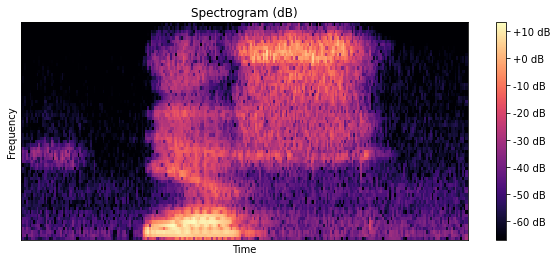

In [35]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt 
train_audio_path = './tensorflow-speech-recognition-challenge/train/audio/'
filename = 'yes/0a7c2a8d_nohash_0.wav'
x = librosa.load(f'{train_audio_path+filename}',16000)[0]
y = librosa.stft(x, n_fft=128, hop_length=64, win_length=128)

magnitude = np.abs(y)
log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure(figsize=(10,4))
librosa.display.specshow(log_spectrogram, sr=16000, hop_length=64)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")

In [42]:
x.shape

(16000,)

In [41]:
y.shape

(65, 251)

In [48]:
len(librosa.load(f'{train_audio_path+filename}',16000))

2